# <center> Telecom Churn Prediction : Case Study


### In the telecommunication industry, customers tend to change operators if not provided with attractive schemes and offers. It is very important for any telecom operator to prevent the present customers from churning to other operators. As a data scientist, your task in this case study would be to build an ML model which can predict if the customer will churn or not in a particular month based on the past data.


The main goal of the case study is to build ML models to predict churn. The predictive model that you’re going to build will the following purposes:

- It will be used to predict whether a high-value customer will churn or not, in near future (i.e. churn phase). By knowing this, the company can take action steps such as providing special plans, discounts on recharge etc.

- It will be used to identify important variables that are strong predictors of churn. These variables may also indicate why customers choose to switch to other networks.

- Even though overall accuracy will be your primary evaluation metric, you should also mention other metrics like precision, recall, etc. for the different models that can be used for evaluation purposes based on different business objectives. For example, in this problem statement, one business goal can be to build an ML model that identifies customers who'll definitely with more accuracy as compared to the ones who'll not churn. Make sure you mention which metric can be used in such scenarios.

- Recommend strategies to manage customer churn based on your observations.

### Approach
- Telecommunications industry experiences an average of 15 - 25% annual churn rate. Given the fact that it costs 5-10 times more to acquire a new customer than to retain an existing one, customer retention has become even more important than customer acquisition.
- Here we are given with 3 months of data related to customer usage. In this case study, we analyse customer-level data of a leading telecom firm, build predictive models to identify customers at high risk of churn and identify the main indicators of churn.
- In the Telecom Industry, approximately 80% of revenue comes from the top 20% customers (called high-value customers). Thus, if we can reduce churn of the high-value customers, we will be able to reduce significant revenue leakage. Hence, this case study focuses on high value customers only.
- The dataset contains customer-level information for a span of four consecutive months - June, July and August. The months are encoded as 6, 7 and 8, respectively.
- The business objective is to predict the churn using the data (features) from the first three months.
- This is a classification problem, where we need to predict whether the customers is about to churn or not. We have carried out Baseline Logistic Regression, then Logistic Regression with PCA, PCA + Random Forest, PCA + XGBoost.
- Once the Best Fit model is identified, the churn can be predicted. And important 10 features can be identified which can be used for recommendation to retain High Value Customers

## Analysis Steps
1. Reading And Understanding Data
2. Data Cleaning and Preparation
3. Exploratory Data Analysis
4. Data Pre-Processing
5. Modelling
6. Churn Prediction
7. Recommendations

## 1. Reading And Understanding Data

### Importing Required librabies

In [3]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from prettytable import PrettyTable

import re
import datetime as dt
import math

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix

from sklearn.linear_model import LogisticRegression

from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import f1_score

import warnings
warnings.filterwarnings('ignore')

pd.set_option("display.max_columns", 500)
pd.set_option("display.max_rows", 1000)

### Google Drive Mount 
In case if we are working on Google Colab, else not required

In [4]:
# Connecting With Google Drive - Mounting Drive
# Required in case if the notebook is worked upon in Google Colab

"""
from google.colab import drive
drive.mount('/content/drive')
"""

"\nfrom google.colab import drive\ndrive.mount('/content/drive')\n"

### Reading Data and Checking Size
Reading Data from train and test CSV files

In [5]:
churnDFTrain = pd.read_csv('train.csv')
churnDFTest = pd.read_csv('test.csv')

print("Train Data Shape: ", churnDFTrain.shape)
print("Test Data Shape : ", churnDFTest.shape)

Train Data Shape:  (69999, 172)
Test Data Shape :  (30000, 171)


In [6]:
# Importing TEST DF for submission file
testDF = pd.read_csv('test.csv') 

#### Observation
- Based on the shape of above Train and Test Data Frame, Test DF has a column missing.

In [7]:
# Looking at Train DataSet
churnDFTrain.head()

id  circle_id  loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou  \
0   0        109             0.0             0.0             0.0   
1   1        109             0.0             0.0             0.0   
2   2        109             0.0             0.0             0.0   
3   3        109             0.0             0.0             0.0   
4   4        109             0.0             0.0             0.0   

  last_date_of_month_6 last_date_of_month_7 last_date_of_month_8   arpu_6  \
0            6/30/2014            7/31/2014            8/31/2014   31.277   
1            6/30/2014            7/31/2014            8/31/2014    0.000   
2            6/30/2014            7/31/2014            8/31/2014   60.806   
3            6/30/2014            7/31/2014            8/31/2014  156.362   
4            6/30/2014            7/31/2014            8/31/2014  240.708   

    arpu_7   arpu_8  onnet_mou_6  onnet_mou_7  onnet_mou_8  offnet_mou_6  \
0   87.009    7.527        48.58       124.38         1.29         32.24   
1  122.787   42.953         0.00         0.00         0.00          0.00   
2  103.176    0.000         0.53        15.93         0.00         53.99   
3  205.260  111.095         7.26        16.01         0.00         68.76   
4  128.191  101.565        21.28         4.83         6.13         56.99   

   offnet_mou_7  offnet_mou_8  roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  \
0         96.68          2.33           0.00            0.0            0.0   
1         25.99         30.89           0.00            0.0            0.0   
2         82.05          0.00           0.00            0.0            0.0   
3         78.48         50.23           0.00            0.0            0.0   
4         38.11          9.63          53.64            0.0            0.0   

   roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  loc_og_t2t_mou_6  \
0           0.00            0.0           0.00              2.23   
1           0.00            0.0           0.00              0.00   
2           0.00            0.0           0.00              0.53   
3           0.00            0.0           1.63              6.99   
4          15.73            0.0           0.00             10.16   

   loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2m_mou_6  loc_og_t2m_mou_7  \
0              0.00              0.28              5.29             16.04   
1              0.00              0.00              0.00              0.00   
2             12.98              0.00             24.11              0.00   
3              3.94              0.00             37.91             44.89   
4              4.83              6.13             36.74             19.88   

   loc_og_t2m_mou_8  loc_og_t2f_mou_6  loc_og_t2f_mou_7  loc_og_t2f_mou_8  \
0              2.33              0.00              0.00              0.00   
1              0.00              0.00              0.00              0.00   
2              0.00              0.00              0.00              0.00   
3             23.63              0.00              0.00              0.00   
4              4.61             11.99              1.23              5.01   

   loc_og_t2c_mou_6  loc_og_t2c_mou_7  loc_og_t2c_mou_8  loc_og_mou_6  \
0              0.00              0.00              0.00          7.53   
1              0.00             22.01             29.79          0.00   
2              2.14              0.00              0.00         24.64   
3              0.00              0.00              8.03         44.91   
4              0.00              9.85              0.00         58.91   

   loc_og_mou_7  loc_og_mou_8  std_og_t2t_mou_6  std_og_t2t_mou_7  \
0         16.04          2.61             46.34            124.38   
1          0.00          0.00              0.00              0.00   
2         12.98          0.00              0.00              2.94   
3         48.84         23.63              0.26             12.06   
4         25.94         15.76              0.00              0.00   

   std_og_t2t_mo

In [8]:
# Looking at Test DataSet
churnDFTest.head()

id  circle_id  loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou  \
0  69999        109             0.0             0.0             0.0   
1  70000        109             0.0             0.0             0.0   
2  70001        109             0.0             0.0             0.0   
3  70002        109             0.0             0.0             0.0   
4  70003        109             0.0             0.0             0.0   

  last_date_of_month_6 last_date_of_month_7 last_date_of_month_8   arpu_6  \
0            6/30/2014            7/31/2014            8/31/2014   91.882   
1            6/30/2014            7/31/2014            8/31/2014  414.168   
2            6/30/2014            7/31/2014            8/31/2014  329.844   
3            6/30/2014            7/31/2014            8/31/2014   43.550   
4            6/30/2014            7/31/2014            8/31/2014  306.854   

    arpu_7   arpu_8  onnet_mou_6  onnet_mou_7  onnet_mou_8  offnet_mou_6  \
0   65.330   64.445        31.78        20.23        23.11         60.16   
1  515.568  360.868        75.51        41.21        19.84        474.34   
2  434.884  746.239         7.54         7.86         8.40         16.98   
3  171.390   24.400         5.31         2.16         0.00         40.04   
4  406.289  413.329       450.93       609.03       700.68         60.94   

   offnet_mou_7  offnet_mou_8  roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  \
0         32.16         34.83           0.00           0.00           0.00   
1        621.84        394.94           0.00           0.00           0.00   
2         45.81         45.04          22.81         103.38          26.08   
3        205.01         24.01           0.00           0.00           0.00   
4         23.84         74.16           0.00           0.00           0.00   

   roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  loc_og_t2t_mou_6  \
0           0.00           0.00           0.00             24.88   
1           0.00           0.00           0.00             75.51   
2          24.53          53.68          54.44              0.00   
3           0.00           0.00           0.00              5.31   
4           0.00           0.00           0.00              0.45   

   loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2m_mou_6  loc_og_t2m_mou_7  \
0             20.23             21.06             18.13             10.89   
1             41.21             19.84            473.61            598.08   
2              0.00              0.00              0.00              0.00   
3              0.00              0.00              2.94             98.61   
4              0.78             14.56              2.39              2.66   

   loc_og_t2m_mou_8  loc_og_t2f_mou_6  loc_og_t2f_mou_7  loc_og_t2f_mou_8  \
0              8.36              0.00             13.58              0.00   
1            377.26              0.73              0.00              0.00   
2              0.00              0.00              0.00              0.00   
3             20.51              0.00              0.00              2.35   
4             10.94              0.00              0.00              0.00   

   loc_og_t2c_mou_6  loc_og_t2c_mou_7  loc_og_t2c_mou_8  loc_og_mou_6  \
0               0.0              0.00              0.03         43.01   
1               0.0              0.00              0.00        549.86   
2               0.0              0.00              0.00          0.00   
3               0.0              6.18              0.00          8.26   
4               0.0              0.00              0.00          2.84   

   loc_og_mou_7  loc_og_mou_8  std_og_t2t_mou_6  std_og_t2t_mou_7  \
0         44.71         29.43              6.90              0.00   
1        639.29        397.11              0.00              0.00   
2          0.00          0.00              0.00              0.00   
3         98.61         22.86              0.00              2.16   
4          3.44         25.51            450.48            608.24   

 

In [9]:
# Finding the missing column in Test dataset
trainColumns = set(churnDFTrain.columns)
testColumns = set(churnDFTest.columns)
missingTestColumn = trainColumns - testColumns
missingTestColumn

{'churn_probability'}

#### Observation
- We can see that the Test DataSet has the "churn_probability" column missing. This is the target variable which the model will be predicting.

### Checking Data types and other details

In [10]:
# Checking the details of the training dataset
churnDFTrain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69999 entries, 0 to 69998
Columns: 172 entries, id to churn_probability
dtypes: float64(135), int64(28), object(9)
memory usage: 91.9+ MB


#### Observations
- There are 69999 rows in the data with 172 columns. Out of which 135 columns are of float datatype, 28 columns are of integer datatype and 9 columns are object (string) datatype. But the info misses out on the information on the null values or dataypes of the columns due to the size of the dataset.
- Since info does not show the complete picture due to the size of the data, we need to create a custom function to get the details.

In [11]:
# Setting the unique'id' as index in both train and test data
churnDFTrain.set_index("id", inplace = True)
churnDFTest.set_index("id", inplace = True)

### Identifying Columns with Null values

In [12]:
# Creating custom function to extract the required information from the dataset.

def infoDetails(data): 
    return pd.DataFrame({
                'Datatype' : data.dtypes.astype(str), 
                'Null_Count': data.isnull().sum().astype(int), 
                'Null_Percentage': round(data.isnull().sum()/len(data) * 100, 2), 
                'Unique_Values_Count': data.nunique().astype(int) 
                 }).sort_values(by='Null_Percentage', ascending=False)

infoDetails(churnDFTrain)

Datatype  Null_Count  Null_Percentage  \
count_rech_2g_6           float64       52431            74.90   
arpu_2g_6                 float64       52431            74.90   
night_pck_user_6          float64       52431            74.90   
date_of_last_rech_data_6   object       52431            74.90   
total_rech_data_6         float64       52431            74.90   
av_rech_amt_data_6        float64       52431            74.90   
max_rech_data_6           float64       52431            74.90   
count_rech_3g_6           float64       52431            74.90   
arpu_3g_6                 float64       52431            74.90   
fb_user_6                 float64       52431            74.90   
arpu_3g_7                 float64       52134            74.48   
night_pck_user_7          float64       52134            74.48   
date_of_last_rech_data_7   object       52134            74.48   
total_rech_data_7         float64       52134            74.48   
max_rech_data_7           float64       52134            74.48   
fb_user_7                 float64       52134            74.48   
av_rech_amt_data_7        float64       52134            74.48   
count_rech_2g_7           float64       52134            74.48   
count_rech_3g_7           float64       52134            74.48   
arpu_2g_7                 float64       52134            74.48   
arpu_2g_8                 float64       51582            73.69   
night_pck_user_8          float64       51582            73.69   
arpu_3g_8                 float64       51582            73.69   
max_rech_data_8           float64       51582            73.69   
av_rech_amt_data_8        float64       51582            73.69   
date_of_last_rech_data_8   object       51582            73.69   
fb_user_8                 float64       51582            73.69   
count_rech_3g_8           float64       51582            73.69   
total_rech_data_8         float64       51582            73.69   
count_rech_2g_8           float64       51582            73.69   
isd_og_mou_8              float64        3703             5.29   
std_og_t2c_mou_8          float64        3703             5.29   
std_ic_t2f_mou_8          float64        3703             5.29   
std_ic_t2o_mou_8          float64        3703             5.29   
std_og_mou_8              float64        3703             5.29   
std_ic_t2m_mou_8          float64        3703             5.29   
loc_ic_t2f_mou_8          float64        3703             5.29   
std_ic_t2t_mou_8          float64        3703             5.29   
spl_og_mou_8              float64        3703             5.29   
loc_ic_mou_8              float64        3703             5.29   
og_others_8               float64        3703             5.29   
std_ic_mou_8              float64        3703             5.29   
std_og_t2f_mou_8          float64        3703             5.29   
loc_og_t2c_mou_8          float64        3703             5.29   
ic_others_8               float64        3703             5.29   
std_og_t2m_mou_8          float64        3703             5.29   
onnet_mou_8               float64        3703             5.29   
offnet_mou_8              float64        3703             5.29   
roam_ic_mou_8             float64        3703             5.29   
roam_og_mou_8             float64        3703             5.29   
loc_og_t2t_mou_8          float64        3703             5.29   
loc_og_t2m_mou_8          float64        3703             5.29   
loc_og_t2f_mou_8          float64        3703             5.29   
loc_ic_t2m_mou_8          float64        3703             5.29   
loc_ic_t2t_mou_8          float64        3703             5.29   
loc_og_mou_8              float64        3703             5.29   
isd_ic_mou_8              float64        3703             5.29   
std_og_t2t_mou_8          float64        3703             5.29   
spl_ic_mou_8              float64        3703             5.29   
std_ic_t2t_mou_6          float64        2768             3.95   

#### Observations:
- There are many columns with null percentage as high as 75% approx.
- The majority of the columns have less null percentage.
- Based on the Data Dictionary, many columns have 6/7/8 in the end, which refers to KPI for June/July and August month. In Data Cleaning stpes, we can clean on month wise data, since in telecom churn case, one month does not impact the KPI of different months. It will be easier to understand the data and clean it in this approach.

In [13]:
infoDetails(churnDFTest)

Datatype  Null_Count  Null_Percentage  \
arpu_3g_6                 float64       22415            74.72   
av_rech_amt_data_6        float64       22415            74.72   
fb_user_6                 float64       22415            74.72   
night_pck_user_6          float64       22415            74.72   
count_rech_2g_6           float64       22415            74.72   
max_rech_data_6           float64       22415            74.72   
date_of_last_rech_data_6   object       22415            74.72   
total_rech_data_6         float64       22415            74.72   
count_rech_3g_6           float64       22415            74.72   
arpu_2g_6                 float64       22415            74.72   
fb_user_7                 float64       22294            74.31   
date_of_last_rech_data_7   object       22294            74.31   
av_rech_amt_data_7        float64       22294            74.31   
count_rech_3g_7           float64       22294            74.31   
max_rech_data_7           float64       22294            74.31   
arpu_3g_7                 float64       22294            74.31   
arpu_2g_7                 float64       22294            74.31   
total_rech_data_7         float64       22294            74.31   
night_pck_user_7          float64       22294            74.31   
count_rech_2g_7           float64       22294            74.31   
max_rech_data_8           float64       22078            73.59   
night_pck_user_8          float64       22078            73.59   
arpu_3g_8                 float64       22078            73.59   
fb_user_8                 float64       22078            73.59   
date_of_last_rech_data_8   object       22078            73.59   
count_rech_3g_8           float64       22078            73.59   
arpu_2g_8                 float64       22078            73.59   
count_rech_2g_8           float64       22078            73.59   
av_rech_amt_data_8        float64       22078            73.59   
total_rech_data_8         float64       22078            73.59   
spl_og_mou_8              float64        1675             5.58   
isd_og_mou_8              float64        1675             5.58   
std_og_mou_8              float64        1675             5.58   
loc_ic_t2m_mou_8          float64        1675             5.58   
og_others_8               float64        1675             5.58   
loc_ic_t2t_mou_8          float64        1675             5.58   
ic_others_8               float64        1675             5.58   
loc_ic_t2f_mou_8          float64        1675             5.58   
loc_ic_mou_8              float64        1675             5.58   
isd_ic_mou_8              float64        1675             5.58   
std_ic_t2t_mou_8          float64        1675             5.58   
std_ic_t2m_mou_8          float64        1675             5.58   
std_ic_t2f_mou_8          float64        1675             5.58   
spl_ic_mou_8              float64        1675             5.58   
std_ic_t2o_mou_8          float64        1675             5.58   
std_og_t2c_mou_8          float64        1675             5.58   
std_og_t2f_mou_8          float64        1675             5.58   
std_ic_mou_8              float64        1675             5.58   
loc_og_mou_8              float64        1675             5.58   
roam_ic_mou_8             float64        1675             5.58   
loc_og_t2t_mou_8          float64        1675             5.58   
loc_og_t2m_mou_8          float64        1675             5.58   
loc_og_t2f_mou_8          float64        1675             5.58   
loc_og_t2c_mou_8          float64        1675             5.58   
roam_og_mou_8             float64        1675             5.58   
offnet_mou_8              float64        1675             5.58   
onnet_mou_8               float64        1675             5.58   
std_og_t2t_mou_8          float64        1675             5.58   
std_og_t2m_mou_8          float64        1675             5.58   
offnet_mou_7              float64        1172             3.91   

##### Observations
- Test Dataset has similar null percentage as for Train DataSet

## 2. Data Cleaning and Preparation

### Checking Date Variables

In [14]:
#Changing datatype of date variables to datetime.
columns=churnDFTrain.columns
col_with_date=[]

for column in columns:
    x = re.findall(".*date_of", column)
    #x = columns.filter(regex='.*date.*', axis=1)
    if x:
        col_with_date.append(column)
churnDFTrain[col_with_date].dtypes

last_date_of_month_6        object
last_date_of_month_7        object
last_date_of_month_8        object
date_of_last_rech_6         object
date_of_last_rech_7         object
date_of_last_rech_8         object
date_of_last_rech_data_6    object
date_of_last_rech_data_7    object
date_of_last_rech_data_8    object
dtype: object

In [15]:
# Checking the date format
churnDFTrain[col_with_date].head()

last_date_of_month_6 last_date_of_month_7 last_date_of_month_8  \
id                                                                  
0             6/30/2014            7/31/2014            8/31/2014   
1             6/30/2014            7/31/2014            8/31/2014   
2             6/30/2014            7/31/2014            8/31/2014   
3             6/30/2014            7/31/2014            8/31/2014   
4             6/30/2014            7/31/2014            8/31/2014   

   date_of_last_rech_6 date_of_last_rech_7 date_of_last_rech_8  \
id                                                               
0            6/22/2014           7/10/2014           8/24/2014   
1            6/12/2014           7/10/2014           8/26/2014   
2            6/11/2014           7/22/2014           8/24/2014   
3            6/15/2014           7/21/2014           8/25/2014   
4            6/25/2014           7/26/2014           8/30/2014   

   date_of_last_rech_data_6 date_of_last_rech_data_7 date_of_last_rech_data_8  
id                                                                             
0                       NaN                      NaN                      NaN  
1                       NaN                 7/8/2014                      NaN  
2                       NaN                      NaN                      NaN  
3                       NaN                      NaN                      NaN  
4                 6/25/2014                7/23/2014                8/20/2014

In [16]:
# Converting datatype of dates columns to datetime type

for col in col_with_date:
    churnDFTrain[col]=pd.to_datetime(churnDFTrain[col], format="%m/%d/%Y")
    
churnDFTrain[col_with_date].head()

last_date_of_month_6 last_date_of_month_7 last_date_of_month_8  \
id                                                                  
0            2014-06-30           2014-07-31           2014-08-31   
1            2014-06-30           2014-07-31           2014-08-31   
2            2014-06-30           2014-07-31           2014-08-31   
3            2014-06-30           2014-07-31           2014-08-31   
4            2014-06-30           2014-07-31           2014-08-31   

   date_of_last_rech_6 date_of_last_rech_7 date_of_last_rech_8  \
id                                                               
0           2014-06-22          2014-07-10          2014-08-24   
1           2014-06-12          2014-07-10          2014-08-26   
2           2014-06-11          2014-07-22          2014-08-24   
3           2014-06-15          2014-07-21          2014-08-25   
4           2014-06-25          2014-07-26          2014-08-30   

   date_of_last_rech_data_6 date_of_last_rech_data_7 date_of_last_rech_data_8  
id                                                                             
0                       NaT                      NaT                      NaT  
1                       NaT               2014-07-08                      NaT  
2                       NaT                      NaT                      NaT  
3                       NaT                      NaT                      NaT  
4                2014-06-25               2014-07-23               2014-08-20

In [17]:
# Converting datatype of dates columns to datetime type - TEST DF

for col in col_with_date:
    churnDFTest[col]=pd.to_datetime(churnDFTest[col], format="%m/%d/%Y")
    
churnDFTest[col_with_date].head()


last_date_of_month_6 last_date_of_month_7 last_date_of_month_8  \
id                                                                     
69999           2014-06-30           2014-07-31           2014-08-31   
70000           2014-06-30           2014-07-31           2014-08-31   
70001           2014-06-30           2014-07-31           2014-08-31   
70002           2014-06-30           2014-07-31           2014-08-31   
70003           2014-06-30           2014-07-31           2014-08-31   

      date_of_last_rech_6 date_of_last_rech_7 date_of_last_rech_8  \
id                                                                  
69999          2014-06-21          2014-07-26          2014-08-24   
70000          2014-06-19          2014-07-16          2014-08-24   
70001          2014-06-29          2014-07-27          2014-08-28   
70002          2014-06-25          2014-07-30          2014-08-24   
70003          2014-06-29          2014-07-29          2014-08-30   

      date_of_last_rech_data_6 date_of_last_rech_data_7  \
id                                                        
69999                      NaT                      NaT   
70000                      NaT                      NaT   
70001                      NaT                      NaT   
70002                      NaT                      NaT   
70003                      NaT                      NaT   

      date_of_last_rech_data_8  
id                              
69999                      NaT  
70000                      NaT  
70001                      NaT  
70002                      NaT  
70003                      NaT

### Imputing Values

In [18]:
# Checking unique values for night_pck_user_* and fb_user_* columns
columnList = ['night_pck_user_6', 'fb_user_6', 'night_pck_user_7', 
              'fb_user_7', 'night_pck_user_8', 'fb_user_8']

for colName in columnList:
    print(colName)
    print(churnDFTrain[colName].unique())
    print("-" * 25)

night_pck_user_6
[nan  0.  1.]
-------------------------
fb_user_6
[nan  1.  0.]
-------------------------
night_pck_user_7
[nan  0.  1.]
-------------------------
fb_user_7
[nan  1.  0.]
-------------------------
night_pck_user_8
[nan  0.  1.]
-------------------------
fb_user_8
[nan  1.  0.]
-------------------------


In [19]:
# Imputing Data with -1 value for these columns

churnDFTrain[columnList] = churnDFTrain[columnList].fillna(value='-1').astype(float)
churnDFTrain[columnList].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 69999 entries, 0 to 69998
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   night_pck_user_6  69999 non-null  float64
 1   fb_user_6         69999 non-null  float64
 2   night_pck_user_7  69999 non-null  float64
 3   fb_user_7         69999 non-null  float64
 4   night_pck_user_8  69999 non-null  float64
 5   fb_user_8         69999 non-null  float64
dtypes: float64(6)
memory usage: 3.7 MB


In [20]:
# Imputing Data with -1 value for these columns - TEST DF

churnDFTest[columnList] = churnDFTest[columnList].fillna(value='-1').astype(float)
churnDFTest[columnList].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30000 entries, 69999 to 99998
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   night_pck_user_6  30000 non-null  float64
 1   fb_user_6         30000 non-null  float64
 2   night_pck_user_7  30000 non-null  float64
 3   fb_user_7         30000 non-null  float64
 4   night_pck_user_8  30000 non-null  float64
 5   fb_user_8         30000 non-null  float64
dtypes: float64(6)
memory usage: 1.6 MB


In [21]:
# Checking recharge related columns

rechargeColumnList = ['count_rech_2g_6', 'total_rech_data_6', 'av_rech_amt_data_6', 
                      'max_rech_data_6', 'count_rech_3g_6', 'total_rech_data_7', 'max_rech_data_7', 
                      'count_rech_2g_7', 'count_rech_3g_7', 'av_rech_amt_data_7','count_rech_2g_8', 
                      'av_rech_amt_data_8','max_rech_data_8', 'total_rech_data_8', 'count_rech_3g_8',
                     'arpu_3g_6', 'arpu_2g_6', 'arpu_2g_7', 'arpu_3g_7', 'arpu_3g_8', 'arpu_2g_8']

for colName in rechargeColumnList:
    print(colName)
    print(churnDFTrain[colName].unique())
    print("-" * 50)

count_rech_2g_6
[nan  7.  1.  0.  4.  3.  2. 10. 11.  6.  8.  5.  9. 12. 14. 13. 15. 20.
 21. 42. 16. 22. 25. 19. 18. 30. 28. 17. 24. 32. 34.]
--------------------------------------------------
total_rech_data_6
[nan  7.  1.  4.  3.  2. 10. 11.  6.  5.  8. 15. 12.  9. 17. 14. 13. 16.
 22. 20. 23. 46. 27. 25. 24. 32. 40. 19. 21. 28. 18. 29. 35. 26. 33. 61.
 34.]
--------------------------------------------------
av_rech_amt_data_6
[       nan 1.7500e+02 1.9800e+02 9.8000e+01 1.5400e+02 1.4500e+02
 2.3000e+01 2.0500e+02 7.5000e+01 5.0500e+02 3.0800e+02 1.2300e+02
 3.9600e+02 1.8600e+02 1.0000e+02 1.2500e+02 1.9600e+02 1.4000e+01
 2.2900e+02 2.5000e+01 1.7000e+01 5.3000e+02 2.5200e+02 2.0500e+01
 2.6400e+02 5.8000e+01 1.0080e+03 8.4000e+01 3.4700e+02 4.6000e+01
 4.5800e+02 1.1200e+03 2.0300e+02 9.2000e+01 9.1000e+01 1.1200e+02
 3.0400e+02 2.9900e+02 2.9000e+02 2.3100e+02 1.6530e+03 4.1700e+02
 4.0600e+02 2.0000e+02 5.6000e+01 7.7000e+01 2.1800e+02 5.0000e+01
 6.4000e+01 1.7300e+02 1.1500e

In [22]:
# Imputing 0.0 value in these columns
churnDFTrain[rechargeColumnList] = churnDFTrain[rechargeColumnList].fillna(value='0.0').astype(float)
churnDFTrain[rechargeColumnList].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 69999 entries, 0 to 69998
Data columns (total 21 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   count_rech_2g_6     69999 non-null  float64
 1   total_rech_data_6   69999 non-null  float64
 2   av_rech_amt_data_6  69999 non-null  float64
 3   max_rech_data_6     69999 non-null  float64
 4   count_rech_3g_6     69999 non-null  float64
 5   total_rech_data_7   69999 non-null  float64
 6   max_rech_data_7     69999 non-null  float64
 7   count_rech_2g_7     69999 non-null  float64
 8   count_rech_3g_7     69999 non-null  float64
 9   av_rech_amt_data_7  69999 non-null  float64
 10  count_rech_2g_8     69999 non-null  float64
 11  av_rech_amt_data_8  69999 non-null  float64
 12  max_rech_data_8     69999 non-null  float64
 13  total_rech_data_8   69999 non-null  float64
 14  count_rech_3g_8     69999 non-null  float64
 15  arpu_3g_6           69999 non-null  float64
 16  arpu

In [23]:
# Imputing 0.0 value in these columns - TEST DF
churnDFTest[rechargeColumnList] = churnDFTest[rechargeColumnList].fillna(value='0.0').astype(float)
churnDFTest[rechargeColumnList].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30000 entries, 69999 to 99998
Data columns (total 21 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   count_rech_2g_6     30000 non-null  float64
 1   total_rech_data_6   30000 non-null  float64
 2   av_rech_amt_data_6  30000 non-null  float64
 3   max_rech_data_6     30000 non-null  float64
 4   count_rech_3g_6     30000 non-null  float64
 5   total_rech_data_7   30000 non-null  float64
 6   max_rech_data_7     30000 non-null  float64
 7   count_rech_2g_7     30000 non-null  float64
 8   count_rech_3g_7     30000 non-null  float64
 9   av_rech_amt_data_7  30000 non-null  float64
 10  count_rech_2g_8     30000 non-null  float64
 11  av_rech_amt_data_8  30000 non-null  float64
 12  max_rech_data_8     30000 non-null  float64
 13  total_rech_data_8   30000 non-null  float64
 14  count_rech_3g_8     30000 non-null  float64
 15  arpu_3g_6           30000 non-null  float64
 16  

### Cleaning Columns month wise

#### Month - June (06)

In [24]:
# Month 6 - June
sixth_month_columns = []
for column in churnDFTrain.columns:
    x = re.search("6$", column)
    if x:
        sixth_month_columns.append(column)

metadata = infoDetails(churnDFTrain)
condition = metadata.index.isin(sixth_month_columns)
sixth_month_metadata = metadata[condition]
sixth_month_metadata

Datatype  Null_Count  Null_Percentage  \
date_of_last_rech_data_6  datetime64[ns]       52431            74.90   
spl_og_mou_6                     float64        2768             3.95   
isd_og_mou_6                     float64        2768             3.95   
og_others_6                      float64        2768             3.95   
std_ic_t2o_mou_6                 float64        2768             3.95   
std_ic_t2t_mou_6                 float64        2768             3.95   
loc_ic_t2t_mou_6                 float64        2768             3.95   
loc_ic_t2f_mou_6                 float64        2768             3.95   
loc_ic_mou_6                     float64        2768             3.95   
std_ic_t2m_mou_6                 float64        2768             3.95   
std_ic_t2f_mou_6                 float64        2768             3.95   
std_ic_mou_6                     float64        2768             3.95   
spl_ic_mou_6                     float64        2768             3.95   
isd_ic_mou_6                     float64        2768             3.95   
ic_others_6                      float64        2768             3.95   
std_og_mou_6                     float64        2768             3.95   
loc_ic_t2m_mou_6                 float64        2768             3.95   
roam_og_mou_6                    float64        2768             3.95   
std_og_t2m_mou_6                 float64        2768             3.95   
roam_ic_mou_6                    float64        2768             3.95   
loc_og_t2m_mou_6                 float64        2768             3.95   
offnet_mou_6                     float64        2768             3.95   
std_og_t2t_mou_6                 float64        2768             3.95   
loc_og_t2c_mou_6                 float64        2768             3.95   
std_og_t2c_mou_6                 float64        2768             3.95   
onnet_mou_6                      float64        2768             3.95   
loc_og_t2t_mou_6                 float64        2768             3.95   
std_og_t2f_mou_6                 float64        2768             3.95   
loc_og_t2f_mou_6                 float64        2768             3.95   
loc_og_mou_6                     float64        2768             3.95   
date_of_last_rech_6       datetime64[ns]        1101             1.57   
vol_2g_mb_6                      float64           0             0.00   
night_pck_user_6                 float64           0             0.00   
arpu_3g_6                        float64           0             0.00   
arpu_2g_6                        float64           0             0.00   
vol_3g_mb_6                      float64           0             0.00   
monthly_2g_6                       int64           0             0.00   
fb_user_6                        float64           0             0.00   
sachet_3g_6                        int64           0             0.00   
monthly_3g_6                       int64           0             0.00   
sachet_2g_6                        int64           0             0.00   
av_rech_amt_data_6               float64           0             0.00   
total_rech_amt_6                   int64           0             0.00   
total_rech_num_6                   int64           0             0.00   
total_ic_mou_6                   float64           0             0.00   
total_og_mou_6                   float64           0             0.00   
arpu_6                           float64           0             0.00   
last_date_of_month_6      datetime64[ns]           0             0.00   
max_rech_amt_6                     int64           0             0.00   
count_rech_3g_6                  float64           0             0.00   
count_rech_2g_6                  float64           0             0.00   
max_rech_data_6                  float64           0             0.00   
total_rech_data_6                float64           0             0.00   
last_day_rch_amt_6                 int64           0             0.00   

                

#### Observations
- Note that all the columns with *_mou have exactly 3.95% rows with missing values.
- This is an indicator of a meaningful missing values.
- Further note that *_mou columns indicate minutes of usage, which are applicable only to customers using calling plans. It is probable that, the 3.95% customers not using calling plans.
- This could confirmed by looking at 'total_og_mou_6' and 'total_ic_mou_6' related columns where _mou columns have missing values. If these columns are zero for a customer , then all _mou columns should be zero too.

In [25]:
#  columns with meaningful missing in 6th month 
sixth_month_meaningful_missing_condition = sixth_month_metadata['Null_Percentage'] == 3.95
sixth_month_meaningful_missing_cols = sixth_month_metadata[sixth_month_meaningful_missing_condition].index.values
sixth_month_meaningful_missing_cols

array(['spl_og_mou_6', 'isd_og_mou_6', 'og_others_6', 'std_ic_t2o_mou_6',
       'std_ic_t2t_mou_6', 'loc_ic_t2t_mou_6', 'loc_ic_t2f_mou_6',
       'loc_ic_mou_6', 'std_ic_t2m_mou_6', 'std_ic_t2f_mou_6',
       'std_ic_mou_6', 'spl_ic_mou_6', 'isd_ic_mou_6', 'ic_others_6',
       'std_og_mou_6', 'loc_ic_t2m_mou_6', 'roam_og_mou_6',
       'std_og_t2m_mou_6', 'roam_ic_mou_6', 'loc_og_t2m_mou_6',
       'offnet_mou_6', 'std_og_t2t_mou_6', 'loc_og_t2c_mou_6',
       'std_og_t2c_mou_6', 'onnet_mou_6', 'loc_og_t2t_mou_6',
       'std_og_t2f_mou_6', 'loc_og_t2f_mou_6', 'loc_og_mou_6'],
      dtype=object)

In [26]:
# Check for missing values in 6th month variables
churnDFTrain[sixth_month_meaningful_missing_cols] = churnDFTrain[sixth_month_meaningful_missing_cols].fillna(value='0.0').astype(float)

info = infoDetails(churnDFTrain)
info[info.index.isin(sixth_month_columns)]

Datatype  Null_Count  Null_Percentage  \
date_of_last_rech_data_6  datetime64[ns]       52431            74.90   
date_of_last_rech_6       datetime64[ns]        1101             1.57   
total_rech_data_6                float64           0             0.00   
av_rech_amt_data_6               float64           0             0.00   
vol_2g_mb_6                      float64           0             0.00   
count_rech_3g_6                  float64           0             0.00   
count_rech_2g_6                  float64           0             0.00   
max_rech_data_6                  float64           0             0.00   
fb_user_6                        float64           0             0.00   
monthly_2g_6                       int64           0             0.00   
sachet_2g_6                        int64           0             0.00   
night_pck_user_6                 float64           0             0.00   
arpu_2g_6                        float64           0             0.00   
monthly_3g_6                       int64           0             0.00   
arpu_3g_6                        float64           0             0.00   
sachet_3g_6                        int64           0             0.00   
vol_3g_mb_6                      float64           0             0.00   
std_ic_t2o_mou_6                 float64           0             0.00   
loc_og_t2c_mou_6                 float64           0             0.00   
total_og_mou_6                   float64           0             0.00   
og_others_6                      float64           0             0.00   
spl_og_mou_6                     float64           0             0.00   
isd_og_mou_6                     float64           0             0.00   
std_og_mou_6                     float64           0             0.00   
std_og_t2c_mou_6                 float64           0             0.00   
std_og_t2f_mou_6                 float64           0             0.00   
std_og_t2m_mou_6                 float64           0             0.00   
std_og_t2t_mou_6                 float64           0             0.00   
loc_og_mou_6                     float64           0             0.00   
loc_og_t2f_mou_6                 float64           0             0.00   
loc_og_t2m_mou_6                 float64           0             0.00   
loc_og_t2t_mou_6                 float64           0             0.00   
roam_og_mou_6                    float64           0             0.00   
roam_ic_mou_6                    float64           0             0.00   
offnet_mou_6                     float64           0             0.00   
onnet_mou_6                      float64           0             0.00   
arpu_6                           float64           0             0.00   
last_date_of_month_6      datetime64[ns]           0             0.00   
loc_ic_t2t_mou_6                 float64           0             0.00   
ic_others_6                      float64           0             0.00   
last_day_rch_amt_6                 int64           0             0.00   
max_rech_amt_6                     int64           0             0.00   
total_rech_amt_6                   int64           0             0.00   
total_rech_num_6                   int64           0             0.00   
isd_ic_mou_6                     float64           0             0.00   
loc_ic_t2m_mou_6                 float64           0             0.00   
spl_ic_mou_6                     float64           0             0.00   
total_ic_mou_6                   float64           0             0.00   
std_ic_mou_6                     float64           0             0.00   
std_ic_t2f_mou_6                 float64           0             0.00   
std_ic_t2m_mou_6                 float64           0             0.00   
std_ic_t2t_mou_6                 float64           0             0.00   
loc_ic_mou_6                     float64           0             0.00   
loc_ic_t2f_mou_6                 float64           0             0.00   

                

In [27]:
# Check for missing values in 6th month variables - TEST DF
churnDFTest[sixth_month_meaningful_missing_cols] = churnDFTest[sixth_month_meaningful_missing_cols].fillna(value='0.0').astype(float)

infoTest = infoDetails(churnDFTest)
infoTest[infoTest.index.isin(sixth_month_columns)]

Datatype  Null_Count  Null_Percentage  \
date_of_last_rech_data_6  datetime64[ns]       22415            74.72   
date_of_last_rech_6       datetime64[ns]         506             1.69   
av_rech_amt_data_6               float64           0             0.00   
count_rech_3g_6                  float64           0             0.00   
count_rech_2g_6                  float64           0             0.00   
max_rech_data_6                  float64           0             0.00   
total_rech_data_6                float64           0             0.00   
vol_2g_mb_6                      float64           0             0.00   
sachet_2g_6                        int64           0             0.00   
night_pck_user_6                 float64           0             0.00   
arpu_2g_6                        float64           0             0.00   
monthly_3g_6                       int64           0             0.00   
arpu_3g_6                        float64           0             0.00   
sachet_3g_6                        int64           0             0.00   
vol_3g_mb_6                      float64           0             0.00   
monthly_2g_6                       int64           0             0.00   
fb_user_6                        float64           0             0.00   
std_ic_t2o_mou_6                 float64           0             0.00   
loc_og_t2c_mou_6                 float64           0             0.00   
total_og_mou_6                   float64           0             0.00   
og_others_6                      float64           0             0.00   
spl_og_mou_6                     float64           0             0.00   
isd_og_mou_6                     float64           0             0.00   
std_og_mou_6                     float64           0             0.00   
std_og_t2c_mou_6                 float64           0             0.00   
std_og_t2f_mou_6                 float64           0             0.00   
std_og_t2m_mou_6                 float64           0             0.00   
std_og_t2t_mou_6                 float64           0             0.00   
loc_og_mou_6                     float64           0             0.00   
loc_og_t2f_mou_6                 float64           0             0.00   
loc_og_t2m_mou_6                 float64           0             0.00   
loc_og_t2t_mou_6                 float64           0             0.00   
roam_og_mou_6                    float64           0             0.00   
roam_ic_mou_6                    float64           0             0.00   
offnet_mou_6                     float64           0             0.00   
onnet_mou_6                      float64           0             0.00   
arpu_6                           float64           0             0.00   
last_date_of_month_6      datetime64[ns]           0             0.00   
loc_ic_t2t_mou_6                 float64           0             0.00   
ic_others_6                      float64           0             0.00   
last_day_rch_amt_6                 int64           0             0.00   
max_rech_amt_6                     int64           0             0.00   
total_rech_amt_6                   int64           0             0.00   
total_rech_num_6                   int64           0             0.00   
isd_ic_mou_6                     float64           0             0.00   
loc_ic_t2m_mou_6                 float64           0             0.00   
spl_ic_mou_6                     float64           0             0.00   
total_ic_mou_6                   float64           0             0.00   
std_ic_mou_6                     float64           0             0.00   
std_ic_t2f_mou_6                 float64           0             0.00   
std_ic_t2m_mou_6                 float64           0             0.00   
std_ic_t2t_mou_6                 float64           0             0.00   
loc_ic_mou_6                     float64           0             0.00   
loc_ic_t2f_mou_6                 float64           0             0.00   

                

#### Observations
- Except for date_of_last_rech_6 and date_of_last_rech_data_6, all other columns have been handled for null values. We can ignore these columns for now. These 2 columns will be handled later.

#### Month - July (07)

In [28]:
# Month 7 - July
seventh_month_columns = []
for column in churnDFTrain.columns:
    x = re.search("7$", column)
    if x:
        seventh_month_columns.append(column)

metadata = infoDetails(churnDFTrain)
condition = metadata.index.isin(seventh_month_columns)
seventh_month_metadata = metadata[condition]
seventh_month_metadata

Datatype  Null_Count  Null_Percentage  \
date_of_last_rech_data_7  datetime64[ns]       52134            74.48   
ic_others_7                      float64        2687             3.84   
isd_og_mou_7                     float64        2687             3.84   
isd_ic_mou_7                     float64        2687             3.84   
spl_og_mou_7                     float64        2687             3.84   
spl_ic_mou_7                     float64        2687             3.84   
loc_ic_t2t_mou_7                 float64        2687             3.84   
std_ic_mou_7                     float64        2687             3.84   
std_ic_t2t_mou_7                 float64        2687             3.84   
std_ic_t2o_mou_7                 float64        2687             3.84   
loc_ic_t2m_mou_7                 float64        2687             3.84   
loc_ic_t2f_mou_7                 float64        2687             3.84   
std_ic_t2f_mou_7                 float64        2687             3.84   
loc_ic_mou_7                     float64        2687             3.84   
std_ic_t2m_mou_7                 float64        2687             3.84   
std_og_mou_7                     float64        2687             3.84   
og_others_7                      float64        2687             3.84   
std_og_t2c_mou_7                 float64        2687             3.84   
loc_og_mou_7                     float64        2687             3.84   
onnet_mou_7                      float64        2687             3.84   
offnet_mou_7                     float64        2687             3.84   
roam_ic_mou_7                    float64        2687             3.84   
roam_og_mou_7                    float64        2687             3.84   
loc_og_t2t_mou_7                 float64        2687             3.84   
loc_og_t2m_mou_7                 float64        2687             3.84   
loc_og_t2c_mou_7                 float64        2687             3.84   
loc_og_t2f_mou_7                 float64        2687             3.84   
std_og_t2t_mou_7                 float64        2687             3.84   
std_og_t2m_mou_7                 float64        2687             3.84   
std_og_t2f_mou_7                 float64        2687             3.84   
date_of_last_rech_7       datetime64[ns]        1234             1.76   
last_date_of_month_7      datetime64[ns]         399             0.57   
total_rech_data_7                float64           0             0.00   
av_rech_amt_data_7               float64           0             0.00   
count_rech_3g_7                  float64           0             0.00   
count_rech_2g_7                  float64           0             0.00   
max_rech_data_7                  float64           0             0.00   
vol_2g_mb_7                      float64           0             0.00   
sachet_2g_7                        int64           0             0.00   
night_pck_user_7                 float64           0             0.00   
arpu_2g_7                        float64           0             0.00   
monthly_3g_7                       int64           0             0.00   
arpu_3g_7                        float64           0             0.00   
sachet_3g_7                        int64           0             0.00   
vol_3g_mb_7                      float64           0             0.00   
monthly_2g_7                       int64           0             0.00   
fb_user_7                        float64           0             0.00   
arpu_7                           float64           0             0.00   
total_og_mou_7                   float64           0             0.00   
last_day_rch_amt_7                 int64           0             0.00   
max_rech_amt_7                     int64           0             0.00   
total_rech_amt_7                   int64           0             0.00   
total_rech_num_7                   int64           0             0.00   
total_ic_mou_7                   float64           0             0.00   

                

#### Observations
- Note that all the columns with *_mou have exactly 3.84% rows with missing values.
- This is an indicator of a meaningful missing values.
- Further note that *_mou columns indicate minutes of usage, which are applicable only to customers using calling plans. It is probable that, the 3.84% customers not using calling plans.
- This could confirmed by looking at 'total_og_mou_7' and 'total_ic_mou_7' related columns where _mou columns have missing values. If these columns are zero for a customer, then all _mou columns should be zero too.

In [29]:
#  columns with meaningful missing in 7th month 
seventh_month_condition = seventh_month_metadata['Null_Percentage'] == 3.84
seventh_month_columns = seventh_month_metadata[seventh_month_condition].index.values
seventh_month_columns

array(['ic_others_7', 'isd_og_mou_7', 'isd_ic_mou_7', 'spl_og_mou_7',
       'spl_ic_mou_7', 'loc_ic_t2t_mou_7', 'std_ic_mou_7',
       'std_ic_t2t_mou_7', 'std_ic_t2o_mou_7', 'loc_ic_t2m_mou_7',
       'loc_ic_t2f_mou_7', 'std_ic_t2f_mou_7', 'loc_ic_mou_7',
       'std_ic_t2m_mou_7', 'std_og_mou_7', 'og_others_7',
       'std_og_t2c_mou_7', 'loc_og_mou_7', 'onnet_mou_7', 'offnet_mou_7',
       'roam_ic_mou_7', 'roam_og_mou_7', 'loc_og_t2t_mou_7',
       'loc_og_t2m_mou_7', 'loc_og_t2c_mou_7', 'loc_og_t2f_mou_7',
       'std_og_t2t_mou_7', 'std_og_t2m_mou_7', 'std_og_t2f_mou_7'],
      dtype=object)

In [30]:
# Check for missing values in 7th month variables
churnDFTrain[seventh_month_columns] = churnDFTrain[seventh_month_columns].fillna(value='0.0').astype(float)

info = infoDetails(churnDFTrain)
info[info.index.isin(seventh_month_columns)]

Datatype  Null_Count  Null_Percentage  Unique_Values_Count
ic_others_7       float64           0              0.0                 1658
std_og_t2t_mou_7  float64           0              0.0                14745
loc_og_t2f_mou_7  float64           0              0.0                 3365
loc_og_t2c_mou_7  float64           0              0.0                 2103
loc_og_mou_7      float64           0              0.0                22012
std_og_t2m_mou_7  float64           0              0.0                16234
std_og_t2f_mou_7  float64           0              0.0                 1991
std_og_t2c_mou_7  float64           0              0.0                    1
loc_og_t2m_mou_7  float64           0              0.0                17641
loc_og_t2t_mou_7  float64           0              0.0                11359
roam_og_mou_7     float64           0              0.0                 5305
roam_ic_mou_7     float64           0              0.0                 4240
offnet_mou_7      float64           0              0.0                26139
onnet_mou_7       float64           0              0.0                20076
std_og_mou_7      float64           0              0.0                22088
isd_og_mou_7      float64           0              0.0                 1084
std_ic_t2t_mou_7  float64           0              0.0                 5479
isd_ic_mou_7      float64           0              0.0                 4640
spl_ic_mou_7      float64           0              0.0                  103
std_ic_mou_7      float64           0              0.0                10112
std_ic_t2o_mou_7  float64           0              0.0                    1
std_ic_t2f_mou_7  float64           0              0.0                 2695
std_ic_t2m_mou_7  float64           0              0.0                 8033
loc_ic_mou_7      float64           0              0.0                24258
loc_ic_t2f_mou_7  float64           0              0.0                 6287
loc_ic_t2m_mou_7  float64           0              0.0                18945
loc_ic_t2t_mou_7  float64           0              0.0                11595
og_others_7       float64           0              0.0                  148
spl_og_mou_7      float64           0              0.0                 3827

In [31]:
# Check for missing values in 7th month variables - TEST DF
churnDFTest[seventh_month_columns] = churnDFTest[seventh_month_columns].fillna(value='0.0').astype(float)

infoTest = infoDetails(churnDFTest)
infoTest[infoTest.index.isin(seventh_month_columns)]

Datatype  Null_Count  Null_Percentage  Unique_Values_Count
ic_others_7       float64           0              0.0                 1105
std_og_t2t_mou_7  float64           0              0.0                 8097
loc_og_t2f_mou_7  float64           0              0.0                 2359
loc_og_t2c_mou_7  float64           0              0.0                 1540
loc_og_mou_7      float64           0              0.0                14154
std_og_t2m_mou_7  float64           0              0.0                 9225
std_og_t2f_mou_7  float64           0              0.0                 1294
std_og_t2c_mou_7  float64           0              0.0                    1
loc_og_t2m_mou_7  float64           0              0.0                11761
loc_og_t2t_mou_7  float64           0              0.0                 7639
roam_og_mou_7     float64           0              0.0                 3014
roam_ic_mou_7     float64           0              0.0                 2489
offnet_mou_7      float64           0              0.0                16151
onnet_mou_7       float64           0              0.0                12176
std_og_mou_7      float64           0              0.0                11877
isd_og_mou_7      float64           0              0.0                  597
std_ic_t2t_mou_7  float64           0              0.0                 3675
isd_ic_mou_7      float64           0              0.0                 2756
spl_ic_mou_7      float64           0              0.0                   94
std_ic_mou_7      float64           0              0.0                 6703
std_ic_t2o_mou_7  float64           0              0.0                    1
std_ic_t2f_mou_7  float64           0              0.0                 1729
std_ic_t2m_mou_7  float64           0              0.0                 5361
loc_ic_mou_7      float64           0              0.0                15686
loc_ic_t2f_mou_7  float64           0              0.0                 4218
loc_ic_t2m_mou_7  float64           0              0.0                12819
loc_ic_t2t_mou_7  float64           0              0.0                 7904
og_others_7       float64           0              0.0                   80
spl_og_mou_7      float64           0              0.0                 2779

#### Observations:
- All the columns have been handled for null values

#### Month - August (08)

In [32]:
# Month 8 - August
eighth_month_columns = []
for column in churnDFTrain.columns:
    x = re.search("8$", column)
    if x:
        eighth_month_columns.append(column)

metadata = infoDetails(churnDFTrain)
condition = metadata.index.isin(eighth_month_columns)
eighth_month_metadata = metadata[condition]
eighth_month_metadata

Datatype  Null_Count  Null_Percentage  \
date_of_last_rech_data_8  datetime64[ns]       51582            73.69   
std_og_mou_8                     float64        3703             5.29   
loc_og_t2m_mou_8                 float64        3703             5.29   
std_ic_t2f_mou_8                 float64        3703             5.29   
std_ic_t2m_mou_8                 float64        3703             5.29   
loc_og_t2c_mou_8                 float64        3703             5.29   
loc_og_mou_8                     float64        3703             5.29   
std_ic_t2t_mou_8                 float64        3703             5.29   
std_og_t2t_mou_8                 float64        3703             5.29   
loc_ic_mou_8                     float64        3703             5.29   
std_ic_t2o_mou_8                 float64        3703             5.29   
std_og_t2m_mou_8                 float64        3703             5.29   
std_og_t2f_mou_8                 float64        3703             5.29   
loc_ic_t2f_mou_8                 float64        3703             5.29   
std_og_t2c_mou_8                 float64        3703             5.29   
loc_ic_t2m_mou_8                 float64        3703             5.29   
ic_others_8                      float64        3703             5.29   
isd_og_mou_8                     float64        3703             5.29   
loc_ic_t2t_mou_8                 float64        3703             5.29   
spl_og_mou_8                     float64        3703             5.29   
loc_og_t2t_mou_8                 float64        3703             5.29   
loc_og_t2f_mou_8                 float64        3703             5.29   
spl_ic_mou_8                     float64        3703             5.29   
std_ic_mou_8                     float64        3703             5.29   
isd_ic_mou_8                     float64        3703             5.29   
onnet_mou_8                      float64        3703             5.29   
offnet_mou_8                     float64        3703             5.29   
roam_ic_mou_8                    float64        3703             5.29   
og_others_8                      float64        3703             5.29   
roam_og_mou_8                    float64        3703             5.29   
date_of_last_rech_8       datetime64[ns]        2461             3.52   
last_date_of_month_8      datetime64[ns]         733             1.05   
count_rech_2g_8                  float64           0             0.00   
max_rech_data_8                  float64           0             0.00   
total_rech_data_8                float64           0             0.00   
total_rech_amt_8                   int64           0             0.00   
max_rech_amt_8                     int64           0             0.00   
last_day_rch_amt_8                 int64           0             0.00   
total_rech_num_8                   int64           0             0.00   
count_rech_3g_8                  float64           0             0.00   
monthly_2g_8                       int64           0             0.00   
sachet_2g_8                        int64           0             0.00   
monthly_3g_8                       int64           0             0.00   
sachet_3g_8                        int64           0             0.00   
fb_user_8                        float64           0             0.00   
night_pck_user_8                 float64           0             0.00   
av_rech_amt_data_8               float64           0             0.00   
vol_2g_mb_8                      float64           0             0.00   
vol_3g_mb_8                      float64           0             0.00   
arpu_3g_8                        float64           0             0.00   
arpu_2g_8                        float64           0             0.00   
arpu_8                           float64           0             0.00   
total_ic_mou_8                   float64           0             0.00   
total_og_mou_8                   float64           0             0.00   

                

#### Observations
- Note that all the columns with *_mou have exactly 5.29% rows with missing values.
- This is an indicator of a meaningful missing values.
- Further note that *_mou columns indicate minutes of usage, which are applicable only to customers using calling plans. It is probable that, the 5.29% customers not using calling plans.
- This could confirmed by looking at 'total_og_mou_8' and 'total_ic_mou_8' related columns where _mou columns have missing values. If these columns are zero for a customer, then all _mou columns should be zero too.

In [33]:
#  columns with meaningful missing in 7th month 
eighth_month_condition = eighth_month_metadata['Null_Percentage'] == 5.29
eighth_month_columns = eighth_month_metadata[eighth_month_condition].index.values
eighth_month_columns

array(['std_og_mou_8', 'loc_og_t2m_mou_8', 'std_ic_t2f_mou_8',
       'std_ic_t2m_mou_8', 'loc_og_t2c_mou_8', 'loc_og_mou_8',
       'std_ic_t2t_mou_8', 'std_og_t2t_mou_8', 'loc_ic_mou_8',
       'std_ic_t2o_mou_8', 'std_og_t2m_mou_8', 'std_og_t2f_mou_8',
       'loc_ic_t2f_mou_8', 'std_og_t2c_mou_8', 'loc_ic_t2m_mou_8',
       'ic_others_8', 'isd_og_mou_8', 'loc_ic_t2t_mou_8', 'spl_og_mou_8',
       'loc_og_t2t_mou_8', 'loc_og_t2f_mou_8', 'spl_ic_mou_8',
       'std_ic_mou_8', 'isd_ic_mou_8', 'onnet_mou_8', 'offnet_mou_8',
       'roam_ic_mou_8', 'og_others_8', 'roam_og_mou_8'], dtype=object)

In [34]:
# Check for missing values in 8th month variables
churnDFTrain[eighth_month_columns] = churnDFTrain[eighth_month_columns].fillna(value='0.0').astype(float)

info = infoDetails(churnDFTrain)
info[info.index.isin(eighth_month_columns)]

Datatype  Null_Count  Null_Percentage  Unique_Values_Count
std_ic_mou_8      float64           0              0.0                 9939
spl_ic_mou_8      float64           0              0.0                   95
isd_ic_mou_8      float64           0              0.0                 4694
ic_others_8       float64           0              0.0                 1565
std_ic_t2o_mou_8  float64           0              0.0                    1
loc_og_t2m_mou_8  float64           0              0.0                17616
loc_og_t2f_mou_8  float64           0              0.0                 3311
loc_og_t2c_mou_8  float64           0              0.0                 2204
loc_og_mou_8      float64           0              0.0                21950
std_og_t2t_mou_8  float64           0              0.0                14483
std_og_t2m_mou_8  float64           0              0.0                15968
loc_og_t2t_mou_8  float64           0              0.0                11296
onnet_mou_8       float64           0              0.0                19725
offnet_mou_8      float64           0              0.0                25995
roam_ic_mou_8     float64           0              0.0                 4252
roam_og_mou_8     float64           0              0.0                 5215
std_og_t2f_mou_8  float64           0              0.0                 1945
loc_ic_t2m_mou_8  float64           0              0.0                19022
loc_ic_t2f_mou_8  float64           0              0.0                 6092
loc_ic_mou_8      float64           0              0.0                24182
std_ic_t2t_mou_8  float64           0              0.0                 5367
std_ic_t2m_mou_8  float64           0              0.0                 7906
std_ic_t2f_mou_8  float64           0              0.0                 2583
loc_ic_t2t_mou_8  float64           0              0.0                11446
std_og_t2c_mou_8  float64           0              0.0                    1
std_og_mou_8      float64           0              0.0                21745
isd_og_mou_8      float64           0              0.0                 1008
spl_og_mou_8      float64           0              0.0                 3848
og_others_8       float64           0              0.0                  179

In [35]:
# Check for missing values in 8th month variables - TEST DF
churnDFTest[eighth_month_columns] = churnDFTest[eighth_month_columns].fillna(value='0.0').astype(float)

infoTest = infoDetails(churnDFTest)
infoTest[infoTest.index.isin(eighth_month_columns)]

Datatype  Null_Count  Null_Percentage  Unique_Values_Count
std_ic_mou_8      float64           0              0.0                 6588
spl_ic_mou_8      float64           0              0.0                   87
isd_ic_mou_8      float64           0              0.0                 2666
ic_others_8       float64           0              0.0                 1034
std_ic_t2o_mou_8  float64           0              0.0                    1
loc_og_t2m_mou_8  float64           0              0.0                11600
loc_og_t2f_mou_8  float64           0              0.0                 2302
loc_og_t2c_mou_8  float64           0              0.0                 1557
loc_og_mou_8      float64           0              0.0                13999
std_og_t2t_mou_8  float64           0              0.0                 7906
std_og_t2m_mou_8  float64           0              0.0                 9063
loc_og_t2t_mou_8  float64           0              0.0                 7512
onnet_mou_8       float64           0              0.0                12054
offnet_mou_8      float64           0              0.0                16005
roam_ic_mou_8     float64           0              0.0                 2523
roam_og_mou_8     float64           0              0.0                 2933
std_og_t2f_mou_8  float64           0              0.0                 1257
loc_ic_t2m_mou_8  float64           0              0.0                12751
loc_ic_t2f_mou_8  float64           0              0.0                 4054
loc_ic_mou_8      float64           0              0.0                15486
std_ic_t2t_mou_8  float64           0              0.0                 3585
std_ic_t2m_mou_8  float64           0              0.0                 5317
std_ic_t2f_mou_8  float64           0              0.0                 1712
loc_ic_t2t_mou_8  float64           0              0.0                 7794
std_og_t2c_mou_8  float64           0              0.0                    1
std_og_mou_8      float64           0              0.0                11672
isd_og_mou_8      float64           0              0.0                  560
spl_og_mou_8      float64           0              0.0                 2761
og_others_8       float64           0              0.0                   83

#### Observations
- All the columns have been handled for null values

### Cleaning data (After month wise clean up)

In [36]:
# Checking details of dataset
infoDetails(churnDFTrain)

Datatype  Null_Count  Null_Percentage  \
date_of_last_rech_data_6  datetime64[ns]       52431            74.90   
date_of_last_rech_data_7  datetime64[ns]       52134            74.48   
date_of_last_rech_data_8  datetime64[ns]       51582            73.69   
date_of_last_rech_8       datetime64[ns]        2461             3.52   
date_of_last_rech_7       datetime64[ns]        1234             1.76   
date_of_last_rech_6       datetime64[ns]        1101             1.57   
last_date_of_month_8      datetime64[ns]         733             1.05   
std_og_t2o_mou                   float64         702             1.00   
loc_ic_t2o_mou                   float64         702             1.00   
loc_og_t2o_mou                   float64         702             1.00   
last_date_of_month_7      datetime64[ns]         399             0.57   
circle_id                          int64           0             0.00   
max_rech_amt_8                     int64           0             0.00   
last_day_rch_amt_6                 int64           0             0.00   
last_day_rch_amt_7                 int64           0             0.00   
last_day_rch_amt_8                 int64           0             0.00   
total_rech_data_7                float64           0             0.00   
total_rech_data_6                float64           0             0.00   
max_rech_amt_6                     int64           0             0.00   
total_rech_data_8                float64           0             0.00   
max_rech_data_6                  float64           0             0.00   
max_rech_data_7                  float64           0             0.00   
max_rech_data_8                  float64           0             0.00   
count_rech_2g_6                  float64           0             0.00   
max_rech_amt_7                     int64           0             0.00   
total_rech_amt_6                   int64           0             0.00   
total_rech_amt_8                   int64           0             0.00   
total_rech_amt_7                   int64           0             0.00   
std_ic_mou_8                     float64           0             0.00   
total_ic_mou_6                   float64           0             0.00   
total_ic_mou_7                   float64           0             0.00   
total_ic_mou_8                   float64           0             0.00   
spl_ic_mou_6                     float64           0             0.00   
spl_ic_mou_7                     float64           0             0.00   
spl_ic_mou_8                     float64           0             0.00   
isd_ic_mou_6                     float64           0             0.00   
isd_ic_mou_7                     float64           0             0.00   
isd_ic_mou_8                     float64           0             0.00   
ic_others_6                      float64           0             0.00   
ic_others_7                      float64           0             0.00   
ic_others_8                      float64           0             0.00   
total_rech_num_6                   int64           0             0.00   
total_rech_num_7                   int64           0             0.00   
total_rech_num_8                   int64           0             0.00   
count_rech_2g_8                  float64           0             0.00   
count_rech_2g_7                  float64           0             0.00   
count_rech_3g_7                  float64           0             0.00   
count_rech_3g_6                  float64           0             0.00   
monthly_2g_6                       int64           0             0.00   
monthly_2g_8                       int64           0             0.00   
sachet_2g_6                        int64           0             0.00   
sachet_2g_7                        int64           0             0.00   
sachet_2g_8                        int64           0             0.00   
monthly_3g_6                       int64           0             0.00   
monthly_3g_7     

### Date Columns Clean-up

In [37]:
# Checking null values in Date Columns for Train Data
churnDFTrain[col_with_date].isnull().sum()

last_date_of_month_6            0
last_date_of_month_7          399
last_date_of_month_8          733
date_of_last_rech_6          1101
date_of_last_rech_7          1234
date_of_last_rech_8          2461
date_of_last_rech_data_6    52431
date_of_last_rech_data_7    52134
date_of_last_rech_data_8    51582
dtype: int64

In [38]:
# Checking null values in Date Columns for Test Data
churnDFTest[col_with_date].isnull().sum()

last_date_of_month_6            0
last_date_of_month_7          202
last_date_of_month_8          367
date_of_last_rech_6           506
date_of_last_rech_7           533
date_of_last_rech_8          1161
date_of_last_rech_data_6    22415
date_of_last_rech_data_7    22294
date_of_last_rech_data_8    22078
dtype: int64

In [39]:
# Checking values in date related columns

print('Missing Value Percentage in last_date_of_month columns :\n', 100*churnDFTrain.filter(regex='last_date_of_month_.*', axis=1).isnull().sum() / churnDFTrain.shape[0], '\n')
print('The unique values in last_date_of_month_6 : ' , churnDFTrain['last_date_of_month_6'].unique())
print('The unique values in last_date_of_month_7 : ' , churnDFTrain['last_date_of_month_7'].unique())
print('The unique values in last_date_of_month_8 : ' , churnDFTrain['last_date_of_month_8'].unique())

Missing Value Percentage in last_date_of_month columns :
 last_date_of_month_6    0.000000
last_date_of_month_7    0.570008
last_date_of_month_8    1.047158
dtype: float64 

The unique values in last_date_of_month_6 :  ['2014-06-30T00:00:00.000000000']
The unique values in last_date_of_month_7 :  ['2014-07-31T00:00:00.000000000'                           'NaT']
The unique values in last_date_of_month_8 :  ['2014-08-31T00:00:00.000000000'                           'NaT']


#### Observations
- Last date of month is the last calender date of a particular month, it is independent of the churn data. We can ignore them.

In [40]:
# Checking no. of Unique values
print(churnDFTrain[churnDFTrain['date_of_last_rech_6'].isnull()][['date_of_last_rech_6','total_rech_amt_6','total_rech_num_6']].nunique())
print(churnDFTrain[churnDFTrain['date_of_last_rech_7'].isnull()][['date_of_last_rech_7','total_rech_amt_7','total_rech_num_7']].nunique())
print(churnDFTrain[churnDFTrain['date_of_last_rech_8'].isnull()][['date_of_last_rech_8','total_rech_amt_8','total_rech_num_8']].nunique())


date_of_last_rech_6    0
total_rech_amt_6       1
total_rech_num_6       1
dtype: int64
date_of_last_rech_7    0
total_rech_amt_7       1
total_rech_num_7       1
dtype: int64
date_of_last_rech_8    0
total_rech_amt_8       1
total_rech_num_8       1
dtype: int64


In [41]:
# Checking few rows for date columns
print("\n",churnDFTrain[churnDFTrain['date_of_last_rech_6'].isnull()][['total_rech_amt_6','total_rech_num_6']].head())
print("\n",churnDFTrain[churnDFTrain['date_of_last_rech_7'].isnull()][['total_rech_amt_7','total_rech_num_7']].head())
print("\n",churnDFTrain[churnDFTrain['date_of_last_rech_8'].isnull()][['total_rech_amt_8','total_rech_num_8']].head())



      total_rech_amt_6  total_rech_num_6
id                                     
28                  0                 0
95                  0                 0
293                 0                 0
351                 0                 0
498                 0                 0

      total_rech_amt_7  total_rech_num_7
id                                     
31                  0                 0
76                  0                 0
136                 0                 0
188                 0                 0
241                 0                 0

      total_rech_amt_8  total_rech_num_8
id                                     
31                  0                 0
115                 0                 0
127                 0                 0
138                 0                 0
145                 0                 0


#### Observations
- The columns 'date_of_last_rech' for June, July and August does not have any value becuase there are no recharges done by the user during those months. We can ignore these.

In [42]:
# Dropping date columns 
# since they are not usage related columns and can't be used for modelling 

churnDFTrain.drop(columns=col_with_date, inplace=True)

In [43]:
# Dropping date columns - TEST DF
# since they are not usage related columns and can't be used for modelling 

churnDFTest.drop(columns=col_with_date, inplace=True)

### Cleaning Columns with 1 unique value

In [44]:
# Dropping columns with 1 unique values
infoDF = infoDetails(churnDFTrain)
singleValueColumns = infoDF[infoDF['Unique_Values_Count']==1].index.values

singleValueColumns

array(['loc_og_t2o_mou', 'std_og_t2o_mou', 'loc_ic_t2o_mou',
       'std_ic_t2o_mou_8', 'circle_id', 'std_ic_t2o_mou_7',
       'std_ic_t2o_mou_6', 'std_og_t2c_mou_6', 'std_og_t2c_mou_7',
       'std_og_t2c_mou_8'], dtype=object)

In [45]:
#Dropping singular value columns.
churnDFTrain.drop(columns=singleValueColumns,inplace=True)

#Dropping singular value columns - TEST DF
churnDFTest.drop(columns=singleValueColumns,inplace=True)

In [46]:
# Converting all the above columns having <=29 unique values into categorical data type.
churnDFTrain['churn_probability']= churnDFTrain['churn_probability'].astype('category')


In [47]:
infoDetails(churnDFTrain)

Datatype  Null_Count  Null_Percentage  Unique_Values_Count
arpu_6               float64           0              0.0                61615
total_rech_data_8    float64           0              0.0                   45
max_rech_amt_7         int64           0              0.0                  178
max_rech_amt_8         int64           0              0.0                  202
last_day_rch_amt_6     int64           0              0.0                  179
last_day_rch_amt_7     int64           0              0.0                  166
last_day_rch_amt_8     int64           0              0.0                  191
total_rech_data_6    float64           0              0.0                   37
total_rech_data_7    float64           0              0.0                   42
max_rech_data_6      float64           0              0.0                   48
arpu_7               float64           0              0.0                61425
max_rech_data_7      float64           0              0.0                   46
max_rech_data_8      float64           0              0.0                   50
count_rech_2g_6      float64           0              0.0                   30
count_rech_2g_7      float64           0              0.0                   33
count_rech_2g_8      float64           0              0.0                   33
count_rech_3g_6      float64           0              0.0                   23
count_rech_3g_7      float64           0              0.0                   27
max_rech_amt_6         int64           0              0.0                  190
total_rech_amt_8       int64           0              0.0                 2149
total_rech_amt_7       int64           0              0.0                 2147
total_rech_amt_6       int64           0              0.0                 2108
total_ic_mou_6       float64           0              0.0                27432
total_ic_mou_7       float64           0              0.0                27418
total_ic_mou_8       float64           0              0.0                27318
spl_ic_mou_6         float64           0              0.0                   78
spl_ic_mou_7         float64           0              0.0                  103
spl_ic_mou_8         float64           0              0.0                   95
isd_ic_mou_6         float64           0              0.0                 4421
isd_ic_mou_7         float64           0              0.0                 4640
isd_ic_mou_8         float64           0              0.0                 4694
ic_others_6          float64           0              0.0                 1523
ic_others_7          float64           0              0.0                 1658
ic_others_8          float64           0              0.0                 1565
total_rech_num_6       int64           0              0.0                   94
total_rech_num_7       int64           0              0.0                   96
total_rech_num_8       int64           0              0.0                   92
count_rech_3g_8      float64           0              0.0                   29
av_rech_amt_data_6   float64           0              0.0                  793
av_rech_amt_data_7   float64           0              0.0                  838
monthly_2g_8           int64           0              0.0                    6
sachet_2g_7            int64           0              0.0                   33
sachet_2g_8            int64           0              0.0                   32
monthly_3g_6           int64           0              0.0                   10
monthly_3g_7           int64           0              0.0                   13
monthly_3g_8           int64           0              0.0                   12
sachet_3g_6            int64           0              0.0                   23
sachet_3g_7            int64           0              0.0                   26
sachet_3g_8            int64           0              0.0                   28
fb_user_6            float64           0              0.0             

### Derived Columns

In [48]:
# Total Revenue in June and July month
churnDFTrain['Total_Revenue_6_7']=churnDFTrain['total_rech_amt_6']+churnDFTrain['total_rech_amt_7']
churnDFTrain['Total_Revenue_6_7'].describe()


count    69999.000000
mean       650.516150
std        752.345306
min          0.000000
25%        230.000000
50%        458.000000
75%        839.500000
max      75525.000000
Name: Total_Revenue_6_7, dtype: float64

In [49]:
# Total Revenue in June and July month - TEST DF
churnDFTest['Total_Revenue_6_7']=churnDFTest['total_rech_amt_6']+churnDFTest['total_rech_amt_7']

In [50]:
# Percentiles

percentiles=PrettyTable()
percentiles.field_names=["Percentile","Value","Number of Customers","% of Customers"]

for i in range(10,-1,-1):
    p=np.percentile(churnDFTrain['Total_Revenue_6_7'],(i*10))
    nc=churnDFTrain[churnDFTrain['Total_Revenue_6_7']>p].shape[0]
    per=(nc/churnDFTrain.shape[0])*100
    percentiles.add_row([i,p,nc,"{:.2f}".format(per)])
print(percentiles)

+------------+---------+---------------------+----------------+
| Percentile |  Value  | Number of Customers | % of Customers |
+------------+---------+---------------------+----------------+
|     10     | 75525.0 |          0          |      0.00      |
|     9      |  1395.0 |         6995        |      9.99      |
|     8      |  969.0  |        13988        |     19.98      |
|     7      |  740.0  |        20951        |     29.93      |
|     6      |  577.0  |        27985        |     39.98      |
|     5      |  458.0  |        34979        |     49.97      |
|     4      |  356.0  |        41920        |     59.89      |
|     3      |  269.0  |        48961        |     69.95      |
|     2      |  198.0  |        55989        |     79.99      |
|     1      |  120.0  |        62378        |     89.11      |
|     0      |   0.0   |        67720        |     96.74      |
+------------+---------+---------------------+----------------+


In [51]:
# Average Revenue Per user for June and July month combined
churnDFTrain['arpu_6_7']=churnDFTrain['arpu_6']+churnDFTrain['arpu_7']
churnDFTrain['arpu_6_7'].describe()

count    69999.000000
mean       561.320277
std        633.626529
min       -903.427000
25%        205.791500
50%        397.717000
75%        717.893500
max      62876.922000
Name: arpu_6_7, dtype: float64

In [52]:
# Average Revenue Per user for June and July month combined - TEST DF
churnDFTest['arpu_6_7']=churnDFTest['arpu_6']+churnDFTest['arpu_7']

In [53]:
# Percentiles
percentiles=PrettyTable()
percentiles.field_names=["Percentile","Value","Number of Customers","% of Customers"]

for i in range(10,-1,-1):
    p=np.percentile(churnDFTrain['arpu_6_7'],(i*10))
    nc=churnDFTrain[churnDFTrain['arpu_6_7']>p].shape[0]
    per=(nc/churnDFTrain.shape[0])*100
    percentiles.add_row([i,p,nc,"{:.2f}".format(per)])
print(percentiles)

+------------+--------------------+---------------------+----------------+
| Percentile |       Value        | Number of Customers | % of Customers |
+------------+--------------------+---------------------+----------------+
|     10     | 62876.922000000006 |          0          |      0.00      |
|     9      | 1189.5656000000001 |         7000        |     10.00      |
|     8      | 828.7098000000001  |        14000        |     20.00      |
|     7      |      634.982       |        21000        |     30.00      |
|     6      |      500.163       |        27999        |     40.00      |
|     5      |      397.717       |        34999        |     50.00      |
|     4      |      311.4676      |        41999        |     60.00      |
|     3      | 238.74759999999998 |        48999        |     70.00      |
|     2      |      173.9316      |        55999        |     80.00      |
|     1      |      116.3058      |        62999        |     90.00      |
|     0      | -903.42699

In [54]:
# Few more derived columns for Train Data
churnDFTrain['loc_og_t2m_1'] = churnDFTrain['loc_og_t2m_mou_7'] - churnDFTrain['loc_og_t2m_mou_8']
churnDFTrain['loc_og_1'] = churnDFTrain['loc_og_mou_7'] - churnDFTrain['loc_og_mou_8']
churnDFTrain['std_og_1'] = churnDFTrain['std_og_mou_7'] - churnDFTrain['std_og_mou_8']

# TEST DF
churnDFTest['loc_og_t2m_1'] = churnDFTest['loc_og_t2m_mou_7'] - churnDFTest['loc_og_t2m_mou_8']
churnDFTest['loc_og_1'] = churnDFTest['loc_og_mou_7'] - churnDFTest['loc_og_mou_8']
churnDFTest['std_og_1'] = churnDFTest['std_og_mou_7'] - churnDFTest['std_og_mou_8']

In [55]:
# Difference in Outgoing MOU
churnDFTrain['og_7_8_d'] = churnDFTrain['total_og_mou_8'] - churnDFTrain['total_og_mou_7']


# Difference in Outgoing MOU - TEST DF
churnDFTest['og_7_8_d'] = churnDFTest['total_og_mou_8'] - churnDFTest['total_og_mou_7']

In [56]:
# Difference in Incoming MOU
churnDFTrain['ic_7_8_d'] = churnDFTrain['total_ic_mou_8'] - churnDFTrain['total_ic_mou_7']


# Difference in Incoming MOU - TEST DF
churnDFTest['ic_7_8_d'] = churnDFTest['total_ic_mou_8'] - churnDFTest['total_ic_mou_7']

In [57]:
# Average Outgoing MOU
churnDFTrain['og_avg'] = (churnDFTrain['total_og_mou_6'] + churnDFTrain['total_og_mou_7'] + 
                          churnDFTrain['total_og_mou_8']) / 3


# Average Outgoing MOU - TEST DF

churnDFTest['og_avg'] = (churnDFTest['total_og_mou_6'] + churnDFTest['total_og_mou_7'] + 
                          churnDFTest['total_og_mou_8']) / 3

In [58]:
# Average ARPU
churnDFTrain['arpu_avg'] = (churnDFTrain['arpu_6'] + churnDFTrain['arpu_7'] + churnDFTrain['arpu_8']) / 3

# Average ARPU - TEST DF
churnDFTest['arpu_avg'] = (churnDFTest['arpu_6'] + churnDFTest['arpu_7'] + churnDFTest['arpu_8']) / 3

In [59]:
# Average On-net MOU
churnDFTrain['onnet_avg'] = (churnDFTrain['onnet_mou_6'] + churnDFTrain['onnet_mou_7'] + 
                             churnDFTrain['onnet_mou_8']) / 3

# Average On-net MOU - TEST DF
churnDFTest['onnet_avg'] = (churnDFTest['onnet_mou_6'] + churnDFTest['onnet_mou_7'] + 
                             churnDFTest['onnet_mou_8']) / 3

In [60]:
# Average Off-net MOU
churnDFTrain['offnet_avg'] = (churnDFTrain['offnet_mou_6'] + churnDFTrain['offnet_mou_7'] +
                              churnDFTrain['offnet_mou_8']) / 3

# Average Off-net MOU - TEST DF
churnDFTest['offnet_avg'] = (churnDFTest['offnet_mou_6'] + churnDFTest['offnet_mou_7'] +
                              churnDFTest['offnet_mou_8']) / 3

In [61]:
# Average VBC
churnDFTrain['vbc_avg'] = (churnDFTrain['aug_vbc_3g'] + churnDFTrain['jul_vbc_3g'] + churnDFTrain['jun_vbc_3g']) / 3

# Average VBC - TEST DF
churnDFTest['vbc_avg'] = (churnDFTest['aug_vbc_3g'] + churnDFTest['jul_vbc_3g'] + churnDFTest['jun_vbc_3g']) / 3

In [62]:
# Difference in Total Revenue
churnDFTrain['Total_Revenue_7_8'] = churnDFTrain['total_rech_amt_7'] + churnDFTrain['total_rech_amt_8']
churnDFTrain['Revenue_Change'] = churnDFTrain['Total_Revenue_7_8'] - churnDFTrain['Total_Revenue_6_7']


# Difference in Total Revenue - TEST DF
churnDFTest['Total_Revenue_7_8'] = churnDFTest['total_rech_amt_7'] + churnDFTest['total_rech_amt_8']
churnDFTest['Revenue_Change'] = churnDFTest['Total_Revenue_7_8'] - churnDFTest['Total_Revenue_6_7']

### Filtering High Values Customers

In [63]:
# Filtering The Data by Decile Analysis (above 50% is treated as High Value Customers)
# HighValueCustomerData or HVCData

HVCData = churnDFTrain[((churnDFTrain['Total_Revenue_6_7']>458.0) | (churnDFTrain['arpu_6_7']> 397.7))]
HVCData.reset_index(drop=True, inplace=True)
HVCData.shape

(36623, 166)

## 3. Exploratory Data Analysis

### Univariate Analysis

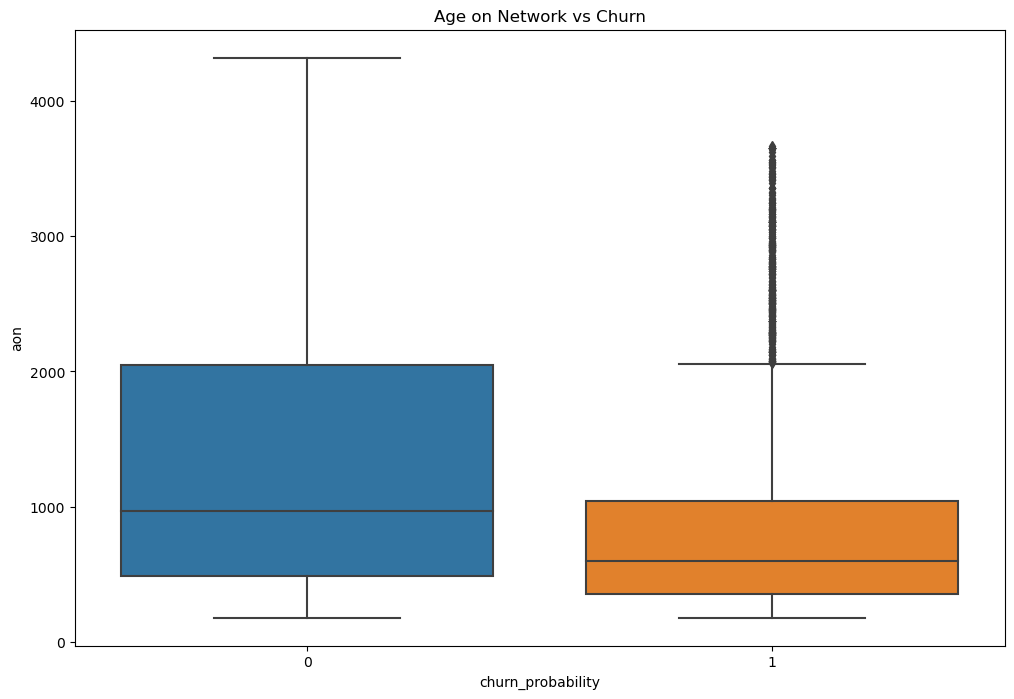

In [64]:
# Age on Network vs Churn Plot
plt.figure(figsize=(12,8))
sns.boxplot(y='aon', x='churn_probability', data=HVCData)
plt.title('Age on Network vs Churn')
plt.show()

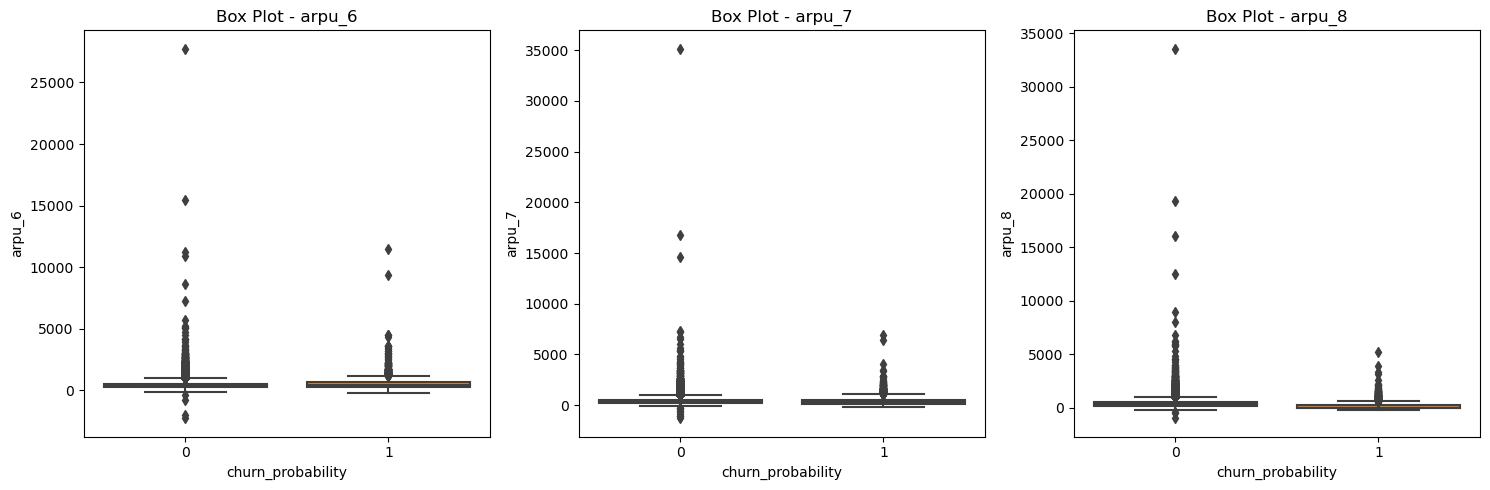

In [65]:
# Average Revenue per user plot
columns = ['arpu_6','arpu_7','arpu_8']

a = 1
b = 3
c = 1

fig = plt.figure(figsize=(15,10))
fig.set_size_inches(15, 5)
for i in columns:
    
    plt.subplot(a, b, c)
    plt.title('Box Plot - {}'.format(i))
    plt.xlabel(i)
    sns.boxplot(y=i, x='churn_probability', data = HVCData)
    c= c+1
    
plt.tight_layout()
plt.show();

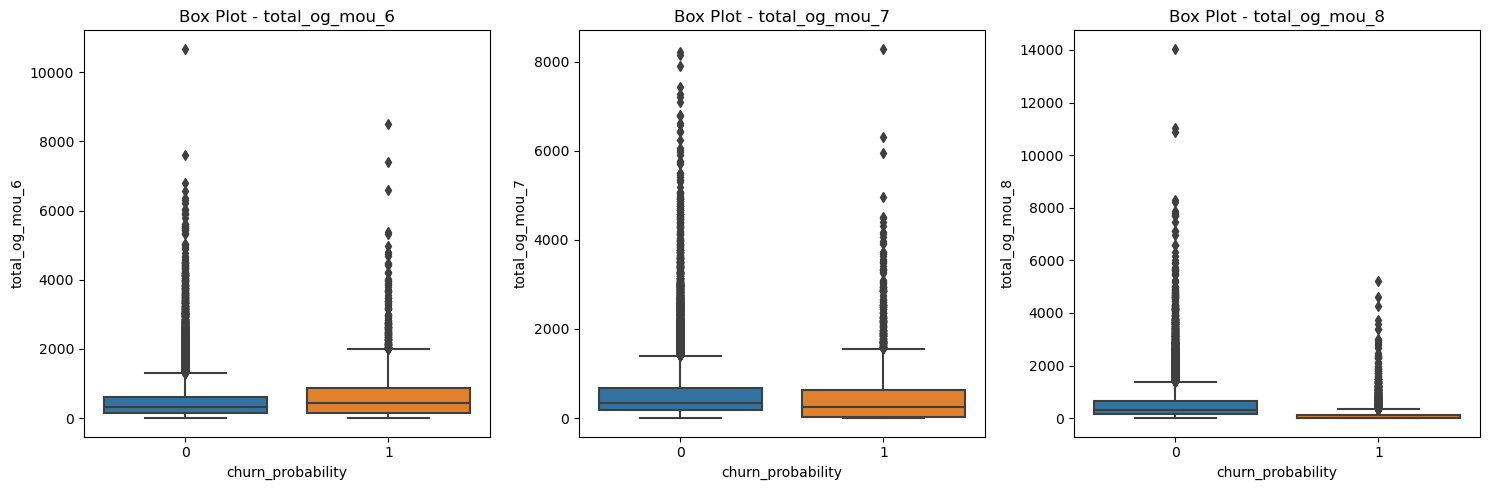

In [66]:
# Total Outgoing Minutes of usage plot
columns = ['total_og_mou_6', 'total_og_mou_7', 'total_og_mou_8']

a = 1
b = 3
c = 1

fig = plt.figure(figsize=(15,10))
fig.set_size_inches(15, 5)
for i in columns:
    
    plt.subplot(a, b, c)
    plt.title('Box Plot - {}'.format(i))
    plt.xlabel(i)
    sns.boxplot(y=i, x='churn_probability', data = HVCData)
    c= c+1
    
plt.tight_layout()
plt.show();

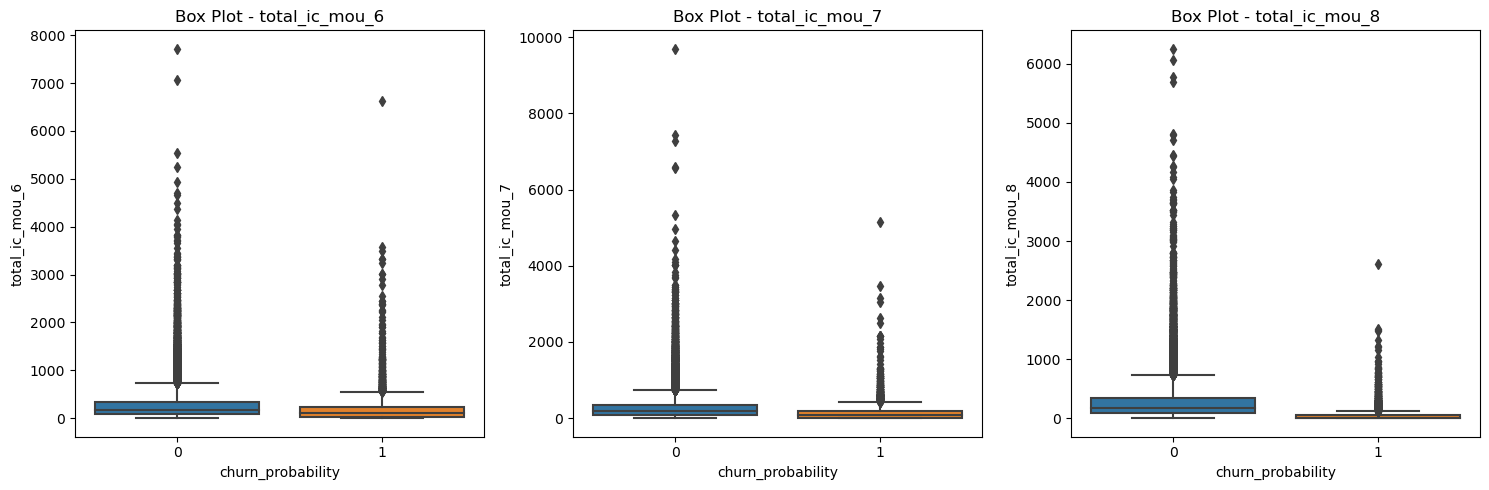

In [67]:
# Total incoming minutes of usage plot
columns=['total_ic_mou_6','total_ic_mou_7','total_ic_mou_8']

a = 1
b = 3
c = 1

fig = plt.figure(figsize=(15,10))
fig.set_size_inches(15, 5)
for i in columns:
    
    plt.subplot(a, b, c)
    plt.title('Box Plot - {}'.format(i))
    plt.xlabel(i)
    sns.boxplot(y=i, x='churn_probability', data = HVCData)
    c= c+1
    
plt.tight_layout()
plt.show();

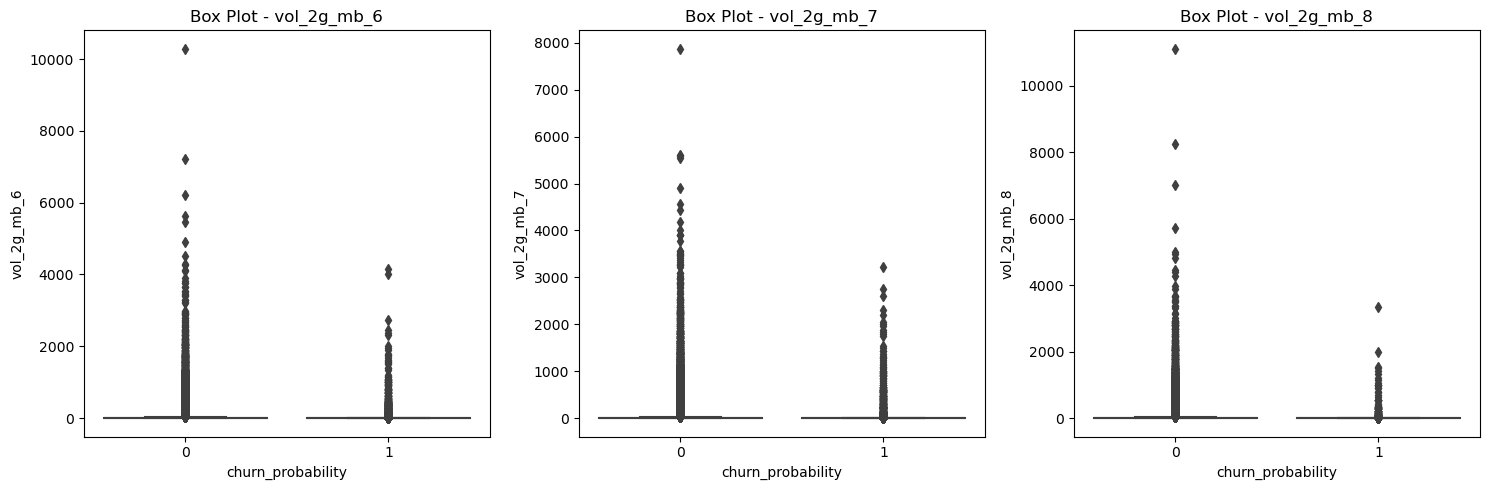

In [68]:
# 2g data uasge plot
columns = ['vol_2g_mb_6', 'vol_2g_mb_7', 'vol_2g_mb_8']

a = 1
b = 3
c= 1

fig = plt.figure(figsize=(15,10))
fig.set_size_inches(15, 5)
for i in columns:
    
    plt.subplot(a, b, c)
    plt.title('Box Plot - {}'.format(i))
    plt.xlabel(i)
    sns.boxplot(y=i, x='churn_probability', data = HVCData)
    c= c+1
    
plt.tight_layout()
plt.show();

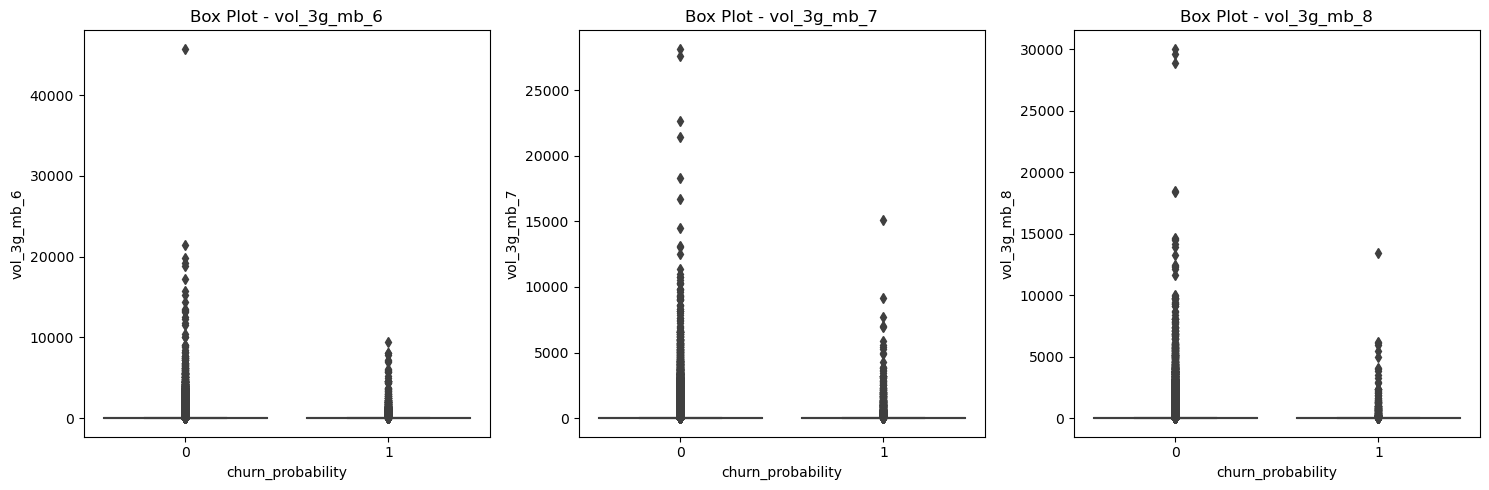

In [69]:
# 3G data usage plot
columns = ['vol_3g_mb_6', 'vol_3g_mb_7', 'vol_3g_mb_8']

a = 1
b = 3
c= 1

fig = plt.figure(figsize=(15,10))
fig.set_size_inches(15, 5)
for i in columns:
    
    plt.subplot(a, b, c)
    plt.title('Box Plot - {}'.format(i))
    plt.xlabel(i)
    sns.boxplot(y=i, x='churn_probability', data = HVCData)
    c= c+1
    
plt.tight_layout()
plt.show();

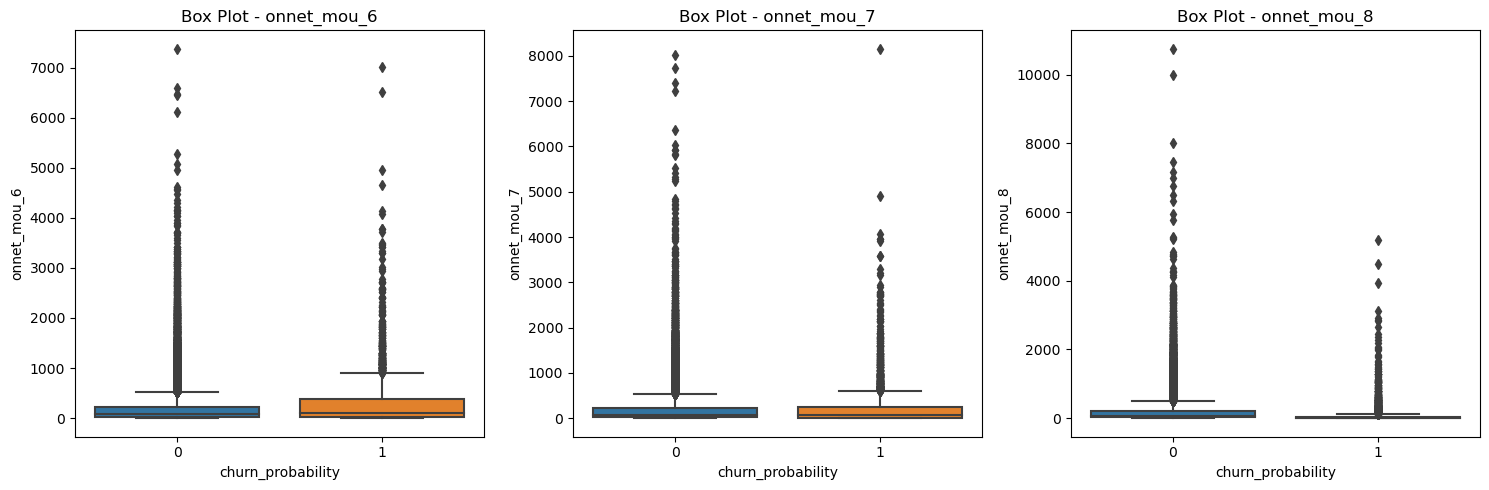

In [70]:
# On-NET usage in minutes - Plot
columns = ['onnet_mou_6','onnet_mou_7','onnet_mou_8']

a = 1
b = 3
c= 1

fig = plt.figure(figsize=(15,10))
fig.set_size_inches(15, 5)
for i in columns:
    
    plt.subplot(a, b, c)
    plt.title('Box Plot - {}'.format(i))
    plt.xlabel(i)
    sns.boxplot(y=i, x='churn_probability', data = HVCData)
    c= c+1
    
plt.tight_layout()
plt.show();

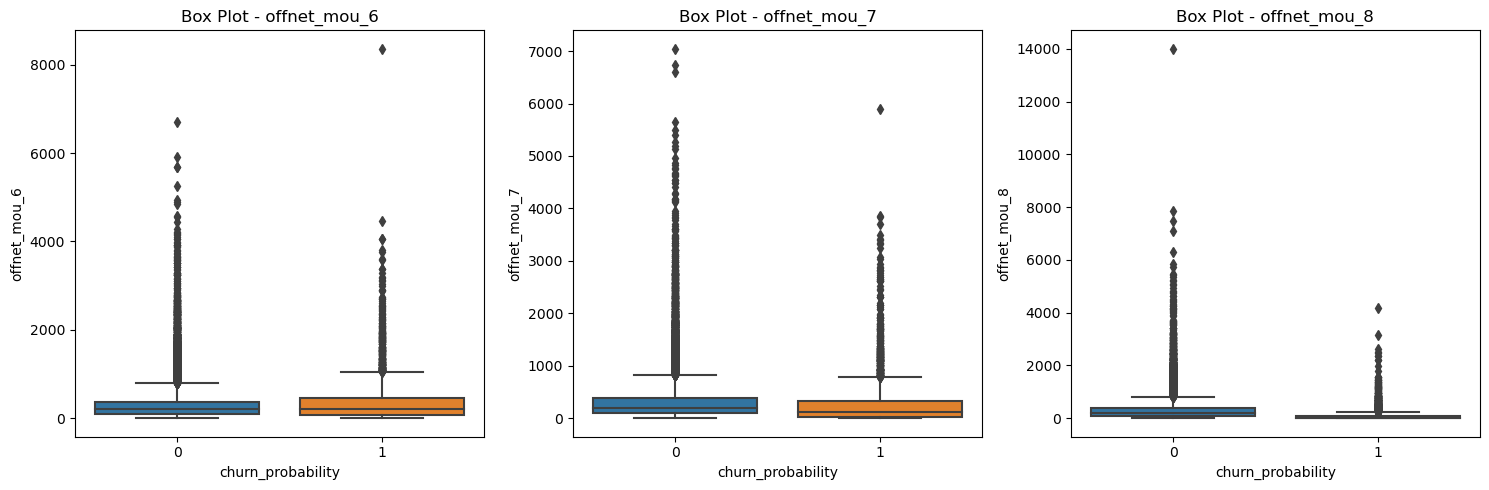

In [71]:
# Off-NET minutes of usage - Plot
columns = ['offnet_mou_6','offnet_mou_7','offnet_mou_8']

a = 1
b = 3
c= 1

fig = plt.figure(figsize=(15,10))
fig.set_size_inches(15, 5)
for i in columns:
    
    plt.subplot(a, b, c)
    plt.title('Box Plot - {}'.format(i))
    plt.xlabel(i)
    sns.boxplot(y=i, x='churn_probability', data = HVCData)
    c= c+1
    
plt.tight_layout()
plt.show();

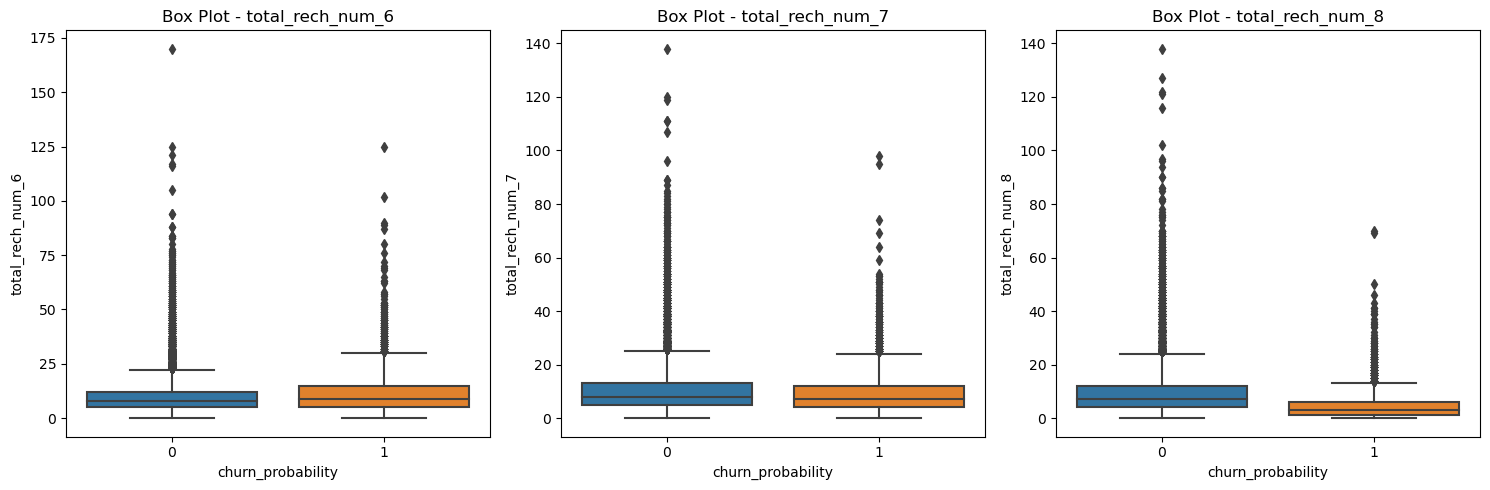

In [72]:
# Total no. of recharge in month - Plot
columns = ['total_rech_num_6','total_rech_num_7','total_rech_num_8']

a = 1
b = 3
c= 1

fig = plt.figure(figsize=(15,10))
fig.set_size_inches(15, 5)
for i in columns:
    
    plt.subplot(a, b, c)
    plt.title('Box Plot - {}'.format(i))
    plt.xlabel(i)
    sns.boxplot(y=i, x='churn_probability', data = HVCData)
    c= c+1
    
plt.tight_layout()
plt.show();

### Bivariate Analysis

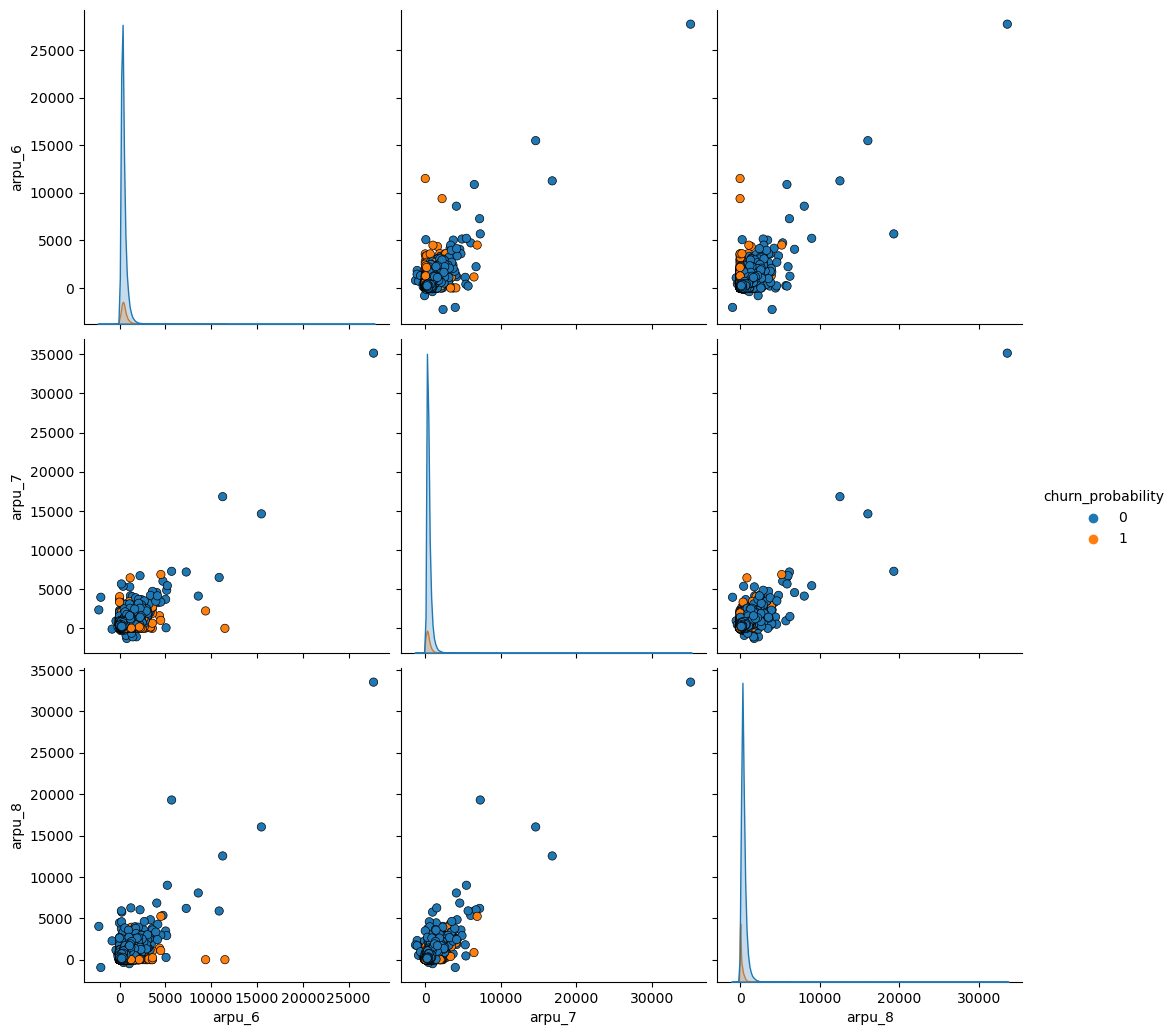

In [73]:
# Feature - arpu (Average Revenue Per User)

sns.pairplot(HVCData,vars=['arpu_6','arpu_7','arpu_8'],hue='churn_probability',plot_kws = {'edgecolor': 'k'}, height=3.5)
plt.show()

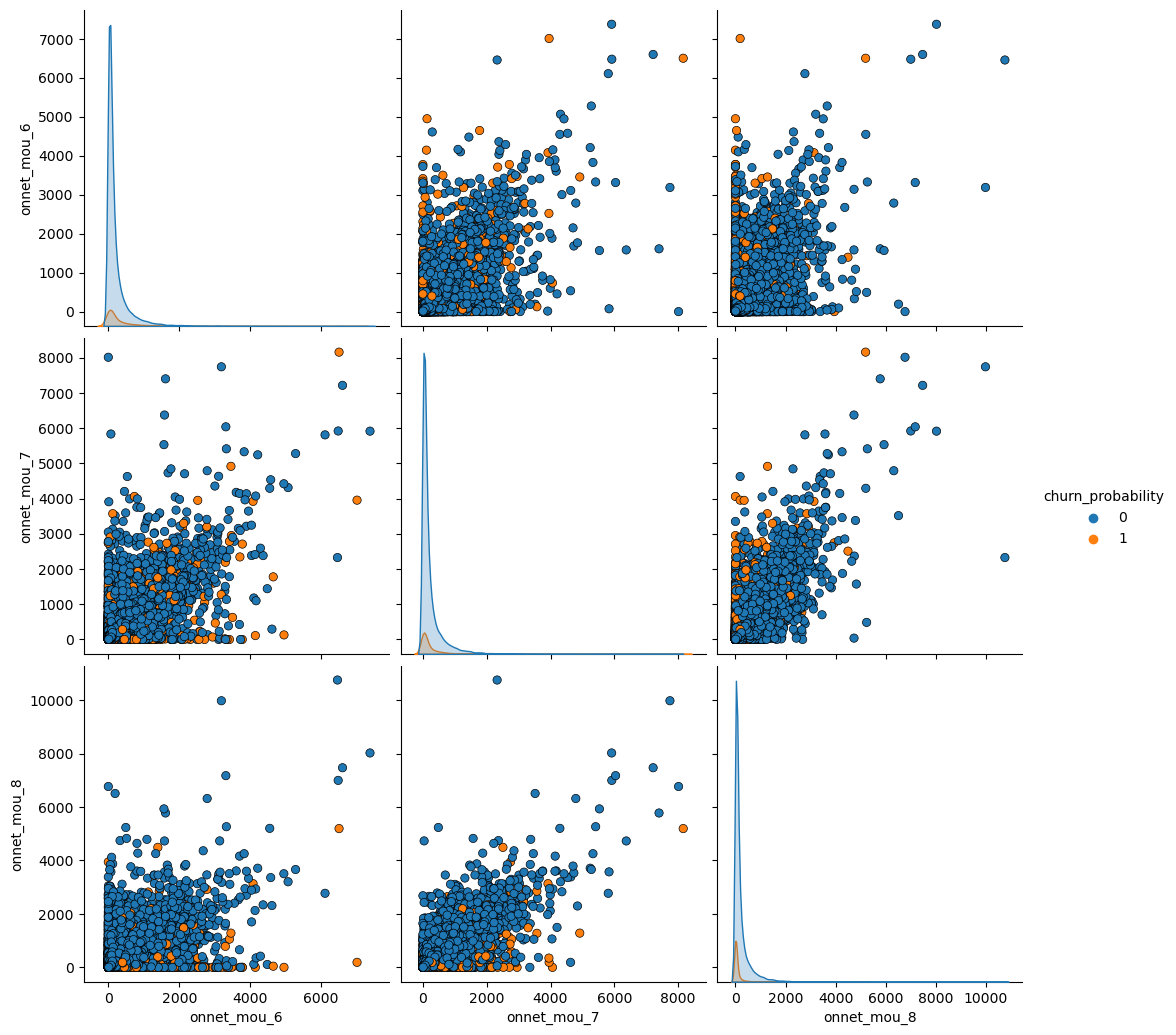

In [74]:
# feature: On-Net mou
sns.pairplot(HVCData,vars=['onnet_mou_6','onnet_mou_7','onnet_mou_8'],hue='churn_probability',plot_kws = {'edgecolor': 'k'}, height=3.5)
plt.show()

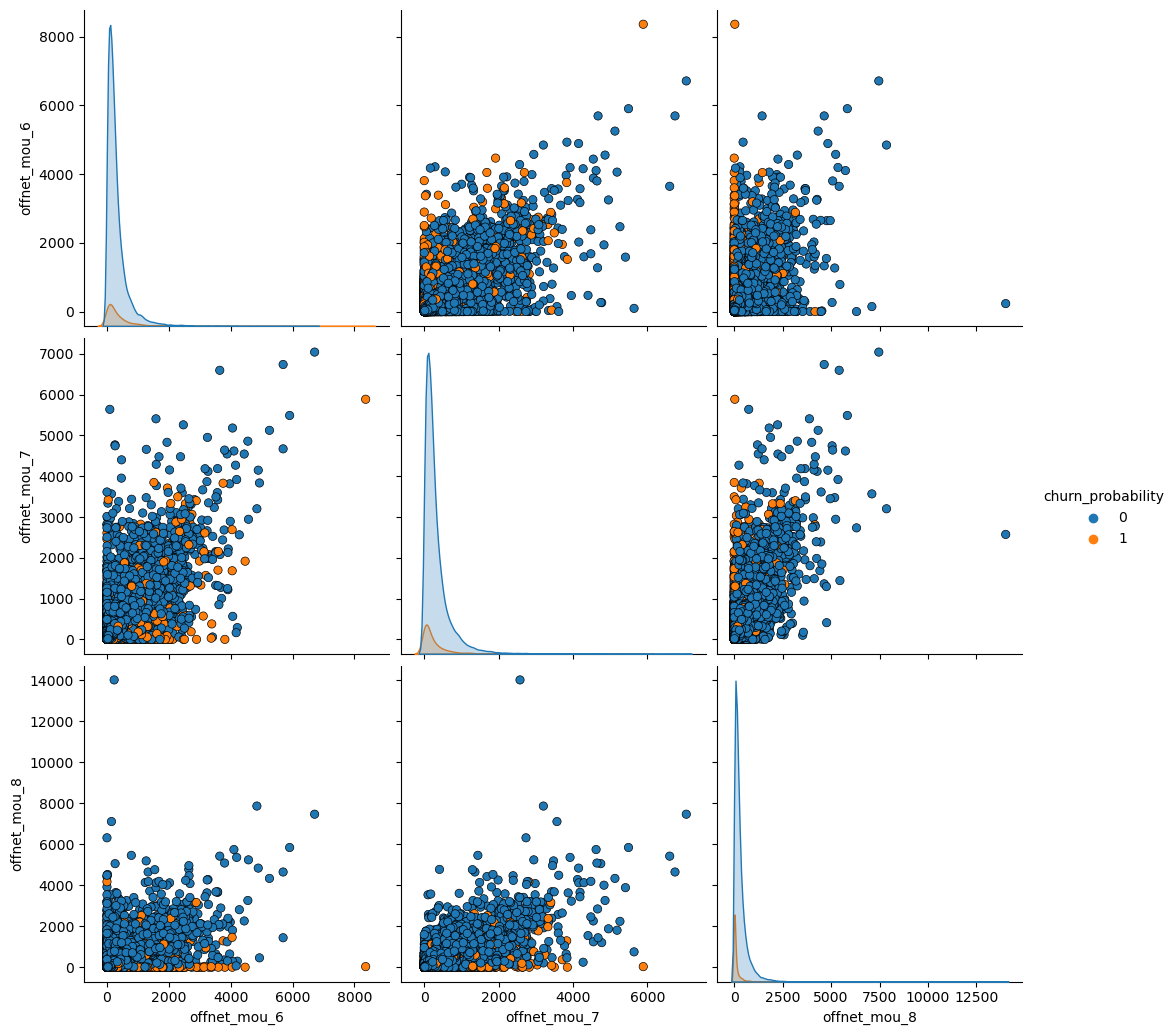

In [75]:
# feature: Off-Net mou
sns.pairplot(HVCData,vars=['offnet_mou_6','offnet_mou_7','offnet_mou_8'],hue='churn_probability',plot_kws = {'edgecolor': 'k'}, height=3.5)
plt.show()

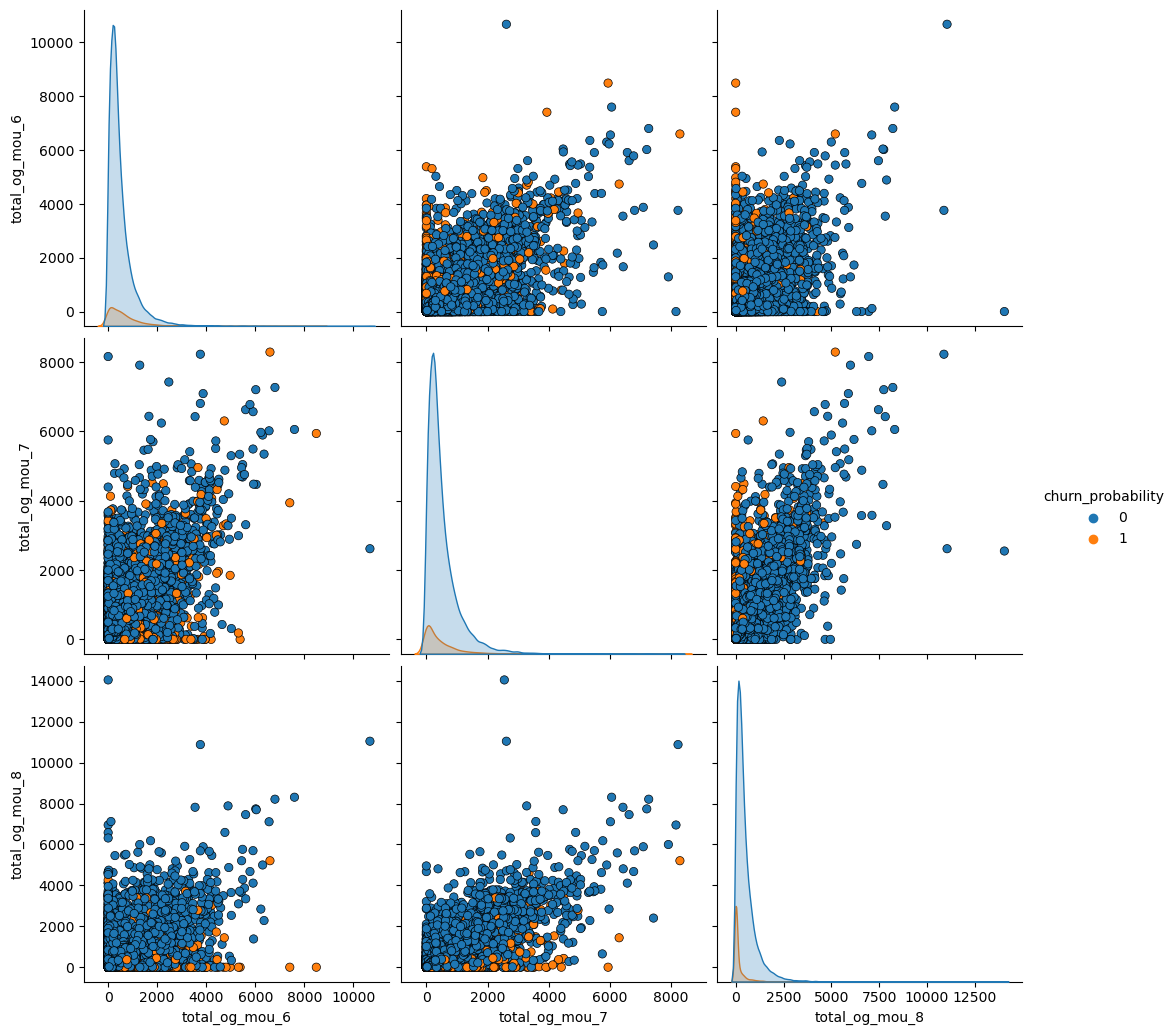

In [76]:
# feature: Total Outgoing minutes of Usage (total_og_mou_*)
sns.pairplot(HVCData,vars=['total_og_mou_6','total_og_mou_7','total_og_mou_8'],hue='churn_probability',plot_kws = {'edgecolor': 'k'}, height=3.5)
plt.show()

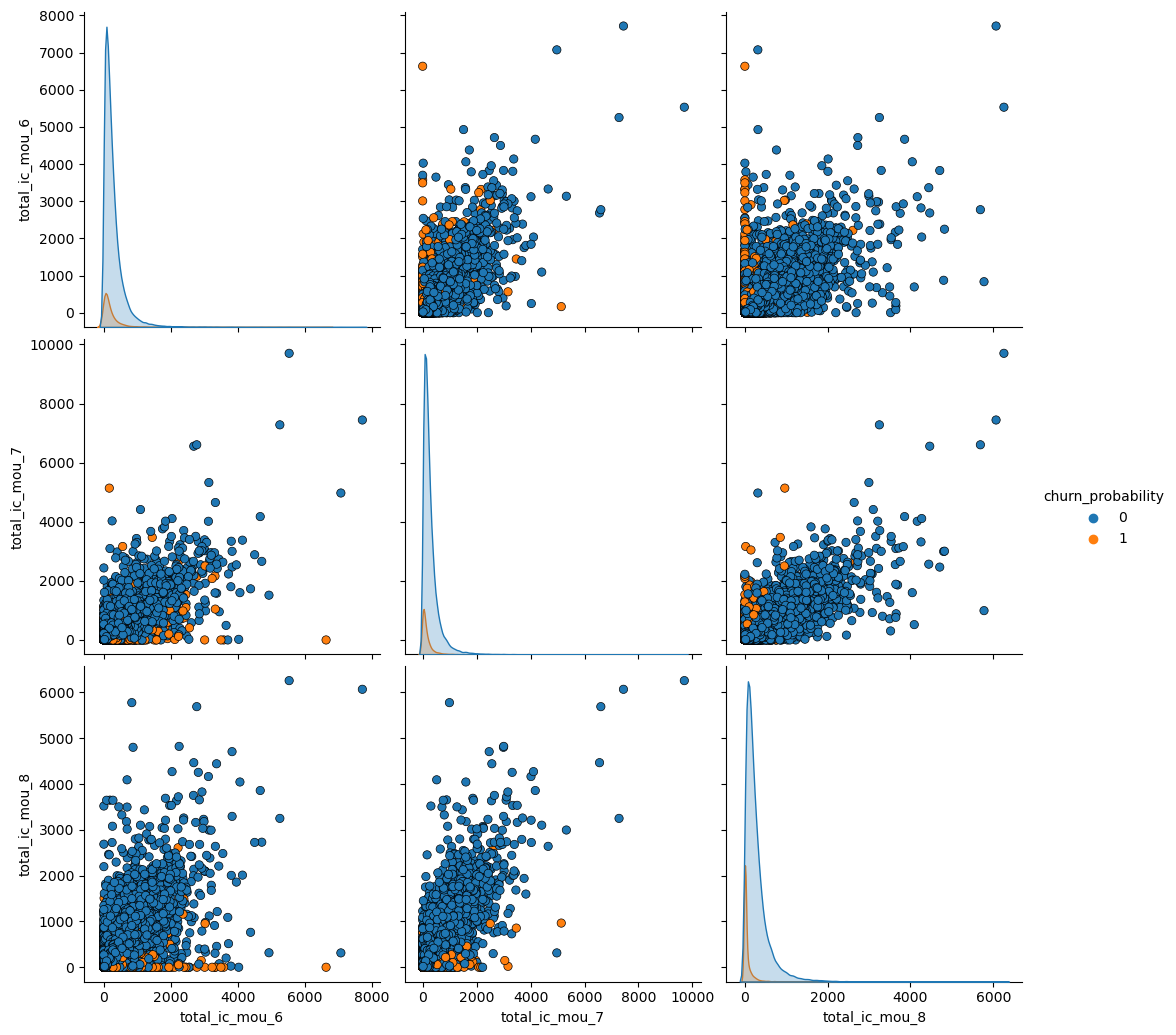

In [77]:
# feature: Total incoming minutes of Usage (total_ic_mou_*)
sns.pairplot(HVCData,vars=['total_ic_mou_6','total_ic_mou_7','total_ic_mou_8'],hue='churn_probability',plot_kws = {'edgecolor': 'k'}, height=3.5)
plt.show()

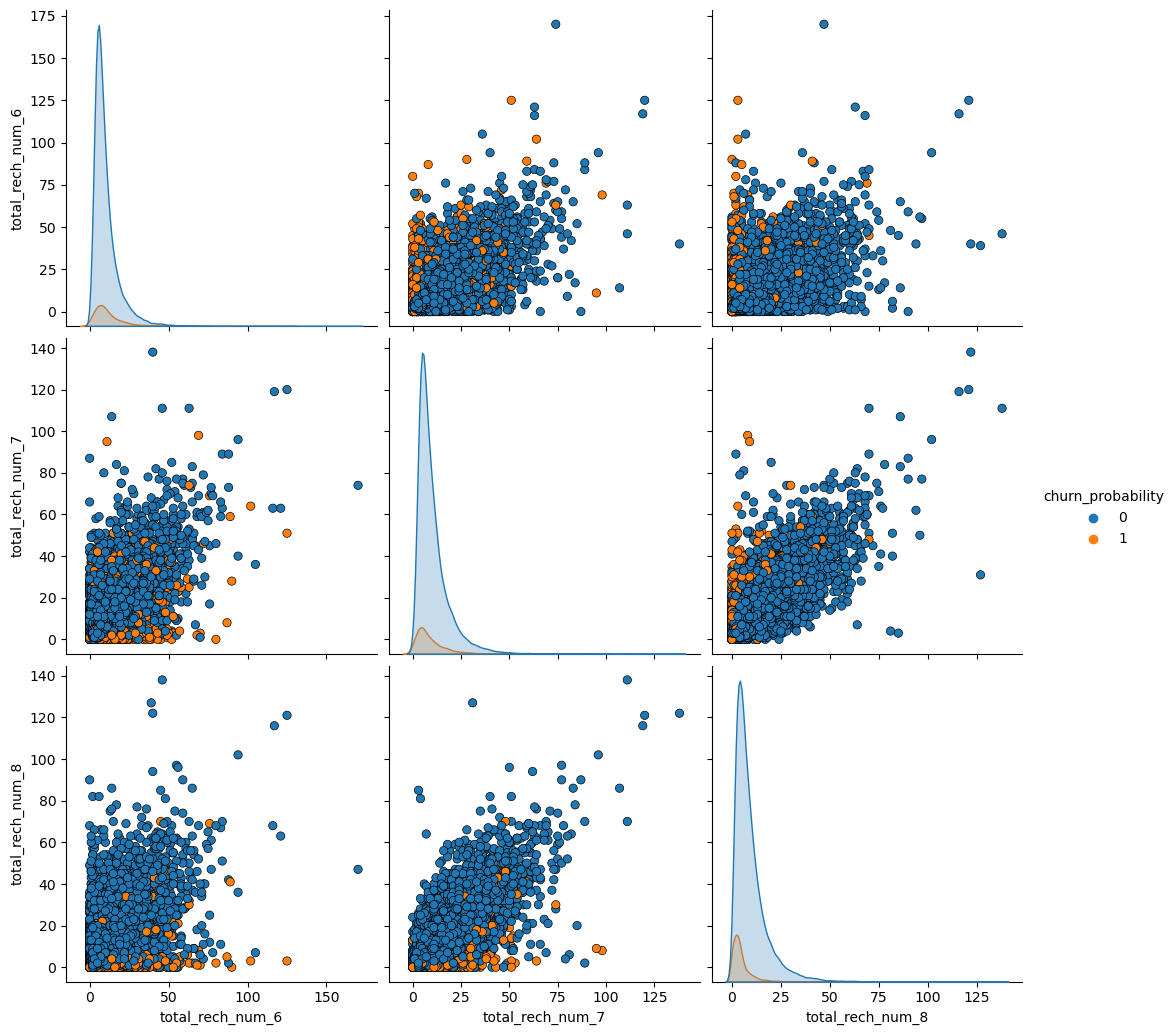

In [78]:
# feature: Total number of recharges in a month (total_rech_num_*)
sns.pairplot(HVCData,vars=['total_rech_num_6','total_rech_num_7','total_rech_num_8'],hue='churn_probability',plot_kws = {'edgecolor': 'k'}, height=3.5)
plt.show()

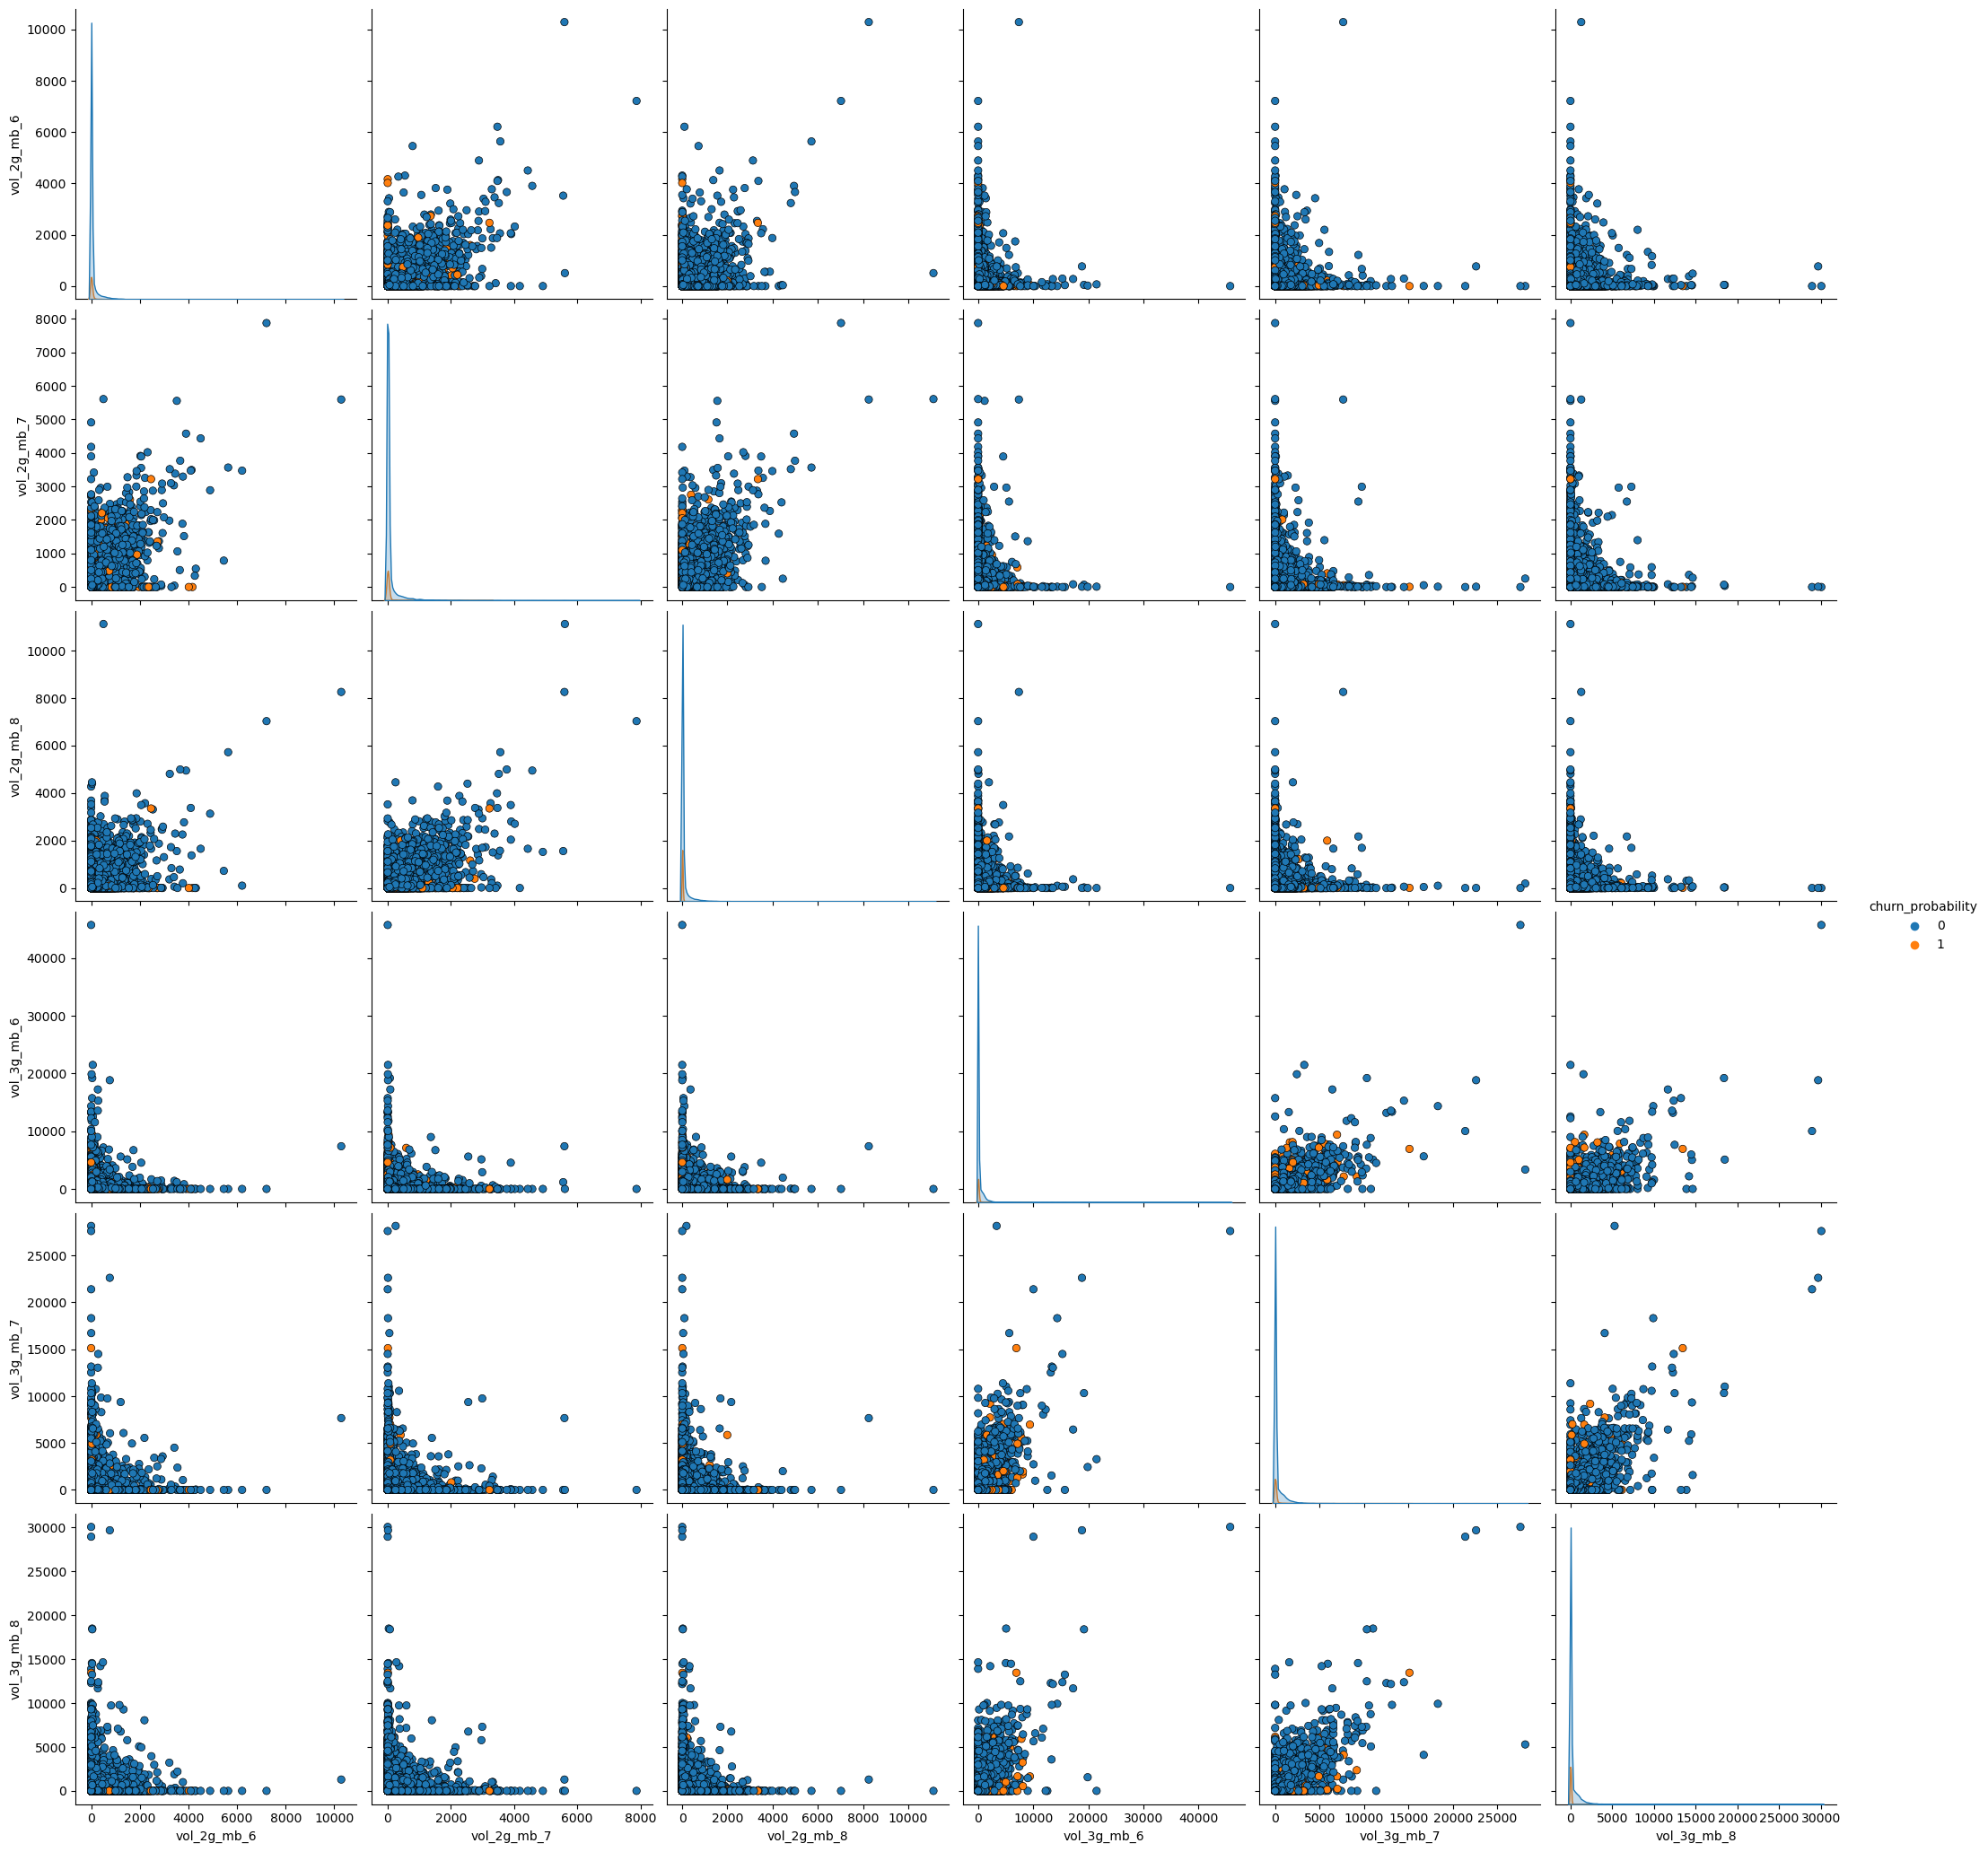

In [79]:
# feature: 2G and 3G Volumes 

sns.pairplot(HVCData,vars=['vol_2g_mb_6','vol_2g_mb_7','vol_2g_mb_8','vol_3g_mb_6','vol_3g_mb_7','vol_3g_mb_8'],
             hue='churn_probability',plot_kws = {'edgecolor': 'k'}, height=3.5)
plt.show()

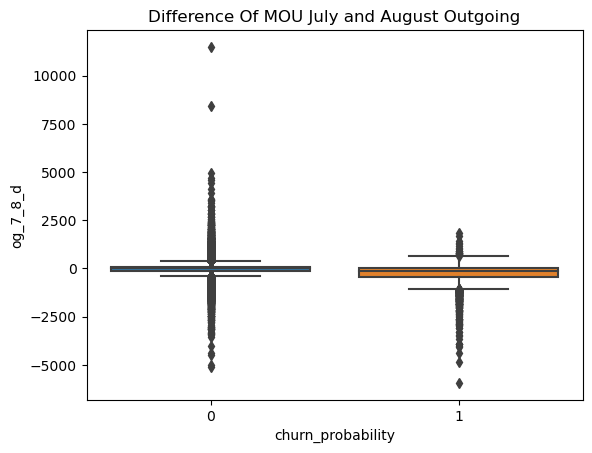

In [80]:
# Difference in Outgoing MOU

sns.boxplot(data=HVCData, x='churn_probability', y='og_7_8_d')
plt.title('Difference Of MOU July and August Outgoing')
plt.show()

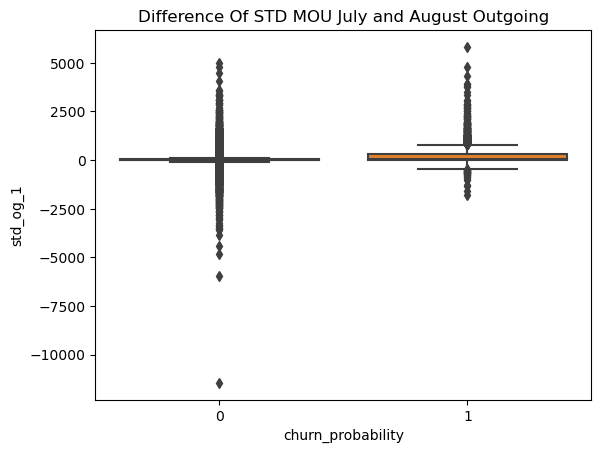

In [81]:
# Difference Of STD MOU July and August Outgoing

sns.boxplot(data=HVCData, x='churn_probability',y='std_og_1')
plt.title('Difference Of STD MOU July and August Outgoing')
plt.show()

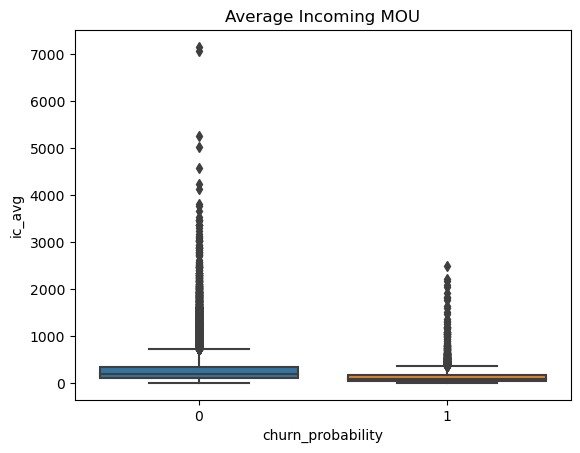

In [82]:
# Average Incoming MOU

HVCData['ic_avg']=(HVCData['total_ic_mou_6']+ HVCData['total_ic_mou_7']+HVCData['total_ic_mou_8'])/3
sns.boxplot(data=HVCData,x='churn_probability',y='ic_avg')
plt.title('Average Incoming MOU')
plt.show()

In [83]:
# Average Incoming MOU - TEST DF
churnDFTest['ic_avg']=(churnDFTest['total_ic_mou_6']+ churnDFTest['total_ic_mou_7']+churnDFTest['total_ic_mou_8'])/3

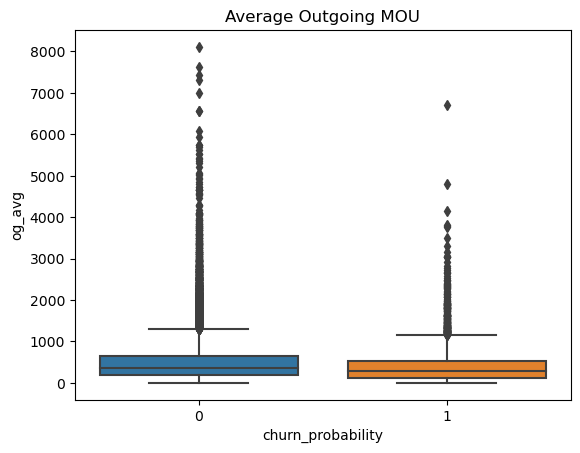

In [84]:
# Average Outgoing MOU

sns.boxplot(data=HVCData,x='churn_probability',y='og_avg')
plt.title('Average Outgoing MOU')
plt.show()

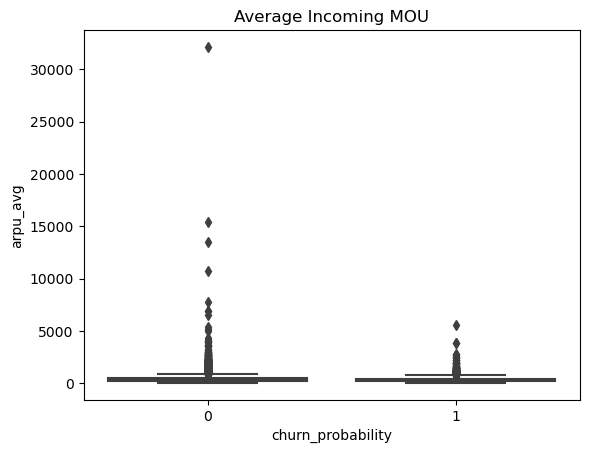

In [85]:
# Average ARPU

sns.boxplot(data=HVCData,x='churn_probability',y='arpu_avg')
plt.title('Average Incoming MOU')
plt.show()

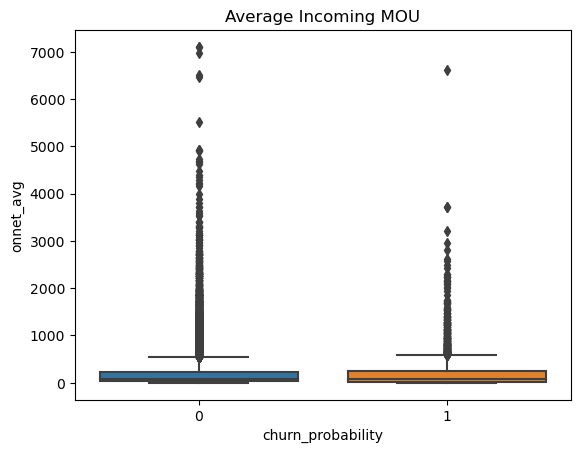

In [86]:
# Average On-net MOU

sns.boxplot(data=HVCData,x='churn_probability',y='onnet_avg')
plt.title('Average Incoming MOU')
plt.show()

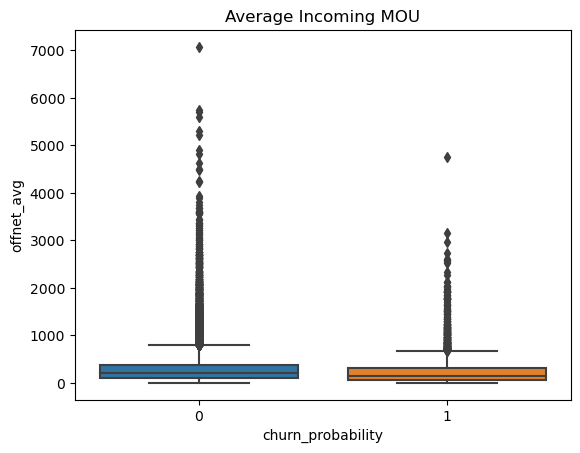

In [87]:
# Average Off-net MOU

sns.boxplot(data=HVCData,x='churn_probability',y='offnet_avg')
plt.title('Average Incoming MOU')
plt.show()

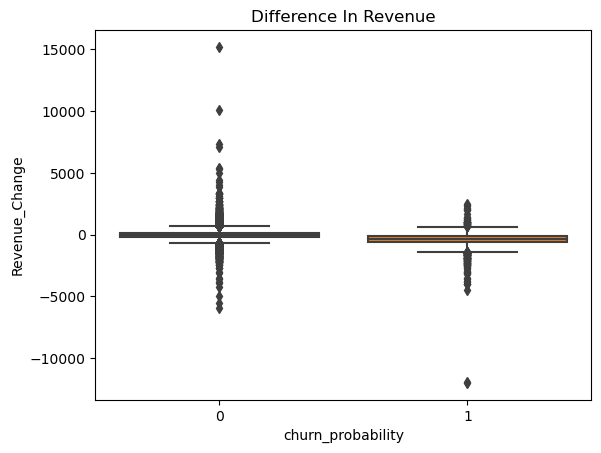

In [88]:
# Difference in total Revenue

sns.boxplot(data=HVCData,x='churn_probability',y='Revenue_Change')
plt.title('Difference In Revenue')
plt.show()

### Outlier correction step.

In [89]:
# Function to treat outliers
def cap_outliers(array, k=3):
    upper_limit = array.mean() + k*array.std()
    lower_limit = array.mean() - k*array.std()
    array[array < lower_limit] = lower_limit
    array[array > upper_limit] = upper_limit
    return array

In [90]:
# Filtering numerical columns
numCols = HVCData.select_dtypes(include=np.number).columns.tolist()
numCols

['arpu_6',
 'arpu_7',
 'arpu_8',
 'onnet_mou_6',
 'onnet_mou_7',
 'onnet_mou_8',
 'offnet_mou_6',
 'offnet_mou_7',
 'offnet_mou_8',
 'roam_ic_mou_6',
 'roam_ic_mou_7',
 'roam_ic_mou_8',
 'roam_og_mou_6',
 'roam_og_mou_7',
 'roam_og_mou_8',
 'loc_og_t2t_mou_6',
 'loc_og_t2t_mou_7',
 'loc_og_t2t_mou_8',
 'loc_og_t2m_mou_6',
 'loc_og_t2m_mou_7',
 'loc_og_t2m_mou_8',
 'loc_og_t2f_mou_6',
 'loc_og_t2f_mou_7',
 'loc_og_t2f_mou_8',
 'loc_og_t2c_mou_6',
 'loc_og_t2c_mou_7',
 'loc_og_t2c_mou_8',
 'loc_og_mou_6',
 'loc_og_mou_7',
 'loc_og_mou_8',
 'std_og_t2t_mou_6',
 'std_og_t2t_mou_7',
 'std_og_t2t_mou_8',
 'std_og_t2m_mou_6',
 'std_og_t2m_mou_7',
 'std_og_t2m_mou_8',
 'std_og_t2f_mou_6',
 'std_og_t2f_mou_7',
 'std_og_t2f_mou_8',
 'std_og_mou_6',
 'std_og_mou_7',
 'std_og_mou_8',
 'isd_og_mou_6',
 'isd_og_mou_7',
 'isd_og_mou_8',
 'spl_og_mou_6',
 'spl_og_mou_7',
 'spl_og_mou_8',
 'og_others_6',
 'og_others_7',
 'og_others_8',
 'total_og_mou_6',
 'total_og_mou_7',
 'total_og_mou_8',
 'loc_ic_t

In [91]:
# cap outliers in the numeric columns

HVCData[numCols] = HVCData[numCols].apply(cap_outliers, axis=0)

HVCData.describe()

arpu_6        arpu_7        arpu_8   onnet_mou_6   onnet_mou_7  \
count  36623.000000  36623.000000  36623.000000  36623.000000  36623.000000   
mean     437.248132    433.540685    401.015692    199.433542    202.216673   
std      296.714944    299.803925    319.923272    294.827734    304.598824   
min     -726.699978   -778.742599   -872.687980      0.000000      0.000000   
25%      243.759500    240.278500    194.672500     23.645000     22.390000   
50%      357.223000    352.932000    327.903000     80.680000     77.810000   
75%      544.470500    541.299500    526.725000    230.610000    230.800000   
max     1618.692904   1663.059185   1692.137726   1361.117138   1411.508100   

        onnet_mou_8  offnet_mou_6  offnet_mou_7  offnet_mou_8  roam_ic_mou_6  \
count  36623.000000  36623.000000  36623.000000  36623.000000   36623.000000   
mean     180.455946    295.940943    295.579287    268.116761      10.390916   
std      288.270169    315.609793    319.670135    310.686906      35.307774   
min        0.000000      0.000000      0.000000      0.000000       0.000000   
25%       14.835000     87.140000     84.080000     59.380000       0.000000   
50%       63.340000    195.960000    191.210000    163.890000       0.000000   
75%      199.820000    379.950000    379.425000    351.780000       0.000000   
max     1359.038370   1482.370783   1504.992802   1466.165571     212.013114   

       roam_ic_mou_7  roam_ic_mou_8  roam_og_mou_6  roam_og_mou_7  \
count   36623.000000   36623.000000   36623.000000   36623.000000   
mean        7.518745       7.026940      17.217881      11.588456   
std        30.506431      28.437483      54.897170      41.025375   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.000000       0.000000       0.000000   
50%         0.000000       0.000000       0.000000       0.000000   
75%         0.000000       0.000000       0.000000       0.000000   
max       222.308117     203.804326     312.861271     247.429150   

       roam_og_mou_8  loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  \
count   36623.000000      36623.000000      36623.000000      36623.000000   
mean       10.891678         62.218039         61.692826         57.703952   
std        40.391838        109.690180        109.688011        105.000775   
min         0.000000          0.000000          0.000000          0.000000   
25%         0.000000          5.040000          5.330000          3.190000   
50%         0.000000         22.880000         22.780000         19.610000   
75%         0.000000         67.885000         67.060000         62.000000   
max       265.286871        659.738276        676.447859        648.233403   

       loc_og_t2m_mou_6  loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2f_mou_6  \
count      36623.000000      36623.000000      36623.000000      36623.000000   
mean         131.799072        130.260090        122.578692          4.715714   
std          160.638358        155.402806        153.603507         10.622875   
min            0.000000          0.000000          0.000000          0.000000   
25%           20.530000         22.140000         15.135000          0.000000   
50%           74.240000         74.740000         65.490000          0.000000   
75%          180.235000        178.320000        169.160000          3.805000   
max          751.591067        715.561099        700.389177         56.894370   

       loc_og_t2f_mou_7  loc_og_t2f_mou_8  loc_og_t2c_mou_6  loc_og_t2c_mou_7  \
count      36623.000000      36623.000000      36623.000000      36623.000000   
mean           4.777452          4.375096          1.113851          1.343172   
std           10.782863         10.114072          3.404984          4.106739   
min            0.000000          0.000000          0.000000          0.000000   
25%            0.000000          0.000000          0.000000          0.000000   
50%            0.000000          0.0000

In [92]:
# cap outliers in the numeric columns - TEST DF

churnDFTest[numCols] = churnDFTest[numCols].apply(cap_outliers, axis=0)
churnDFTest.describe()

arpu_6        arpu_7        arpu_8   onnet_mou_6   onnet_mou_7  \
count  30000.000000  30000.000000  30000.000000  30000.000000  30000.000000   
mean     274.017584    270.751815    270.911327    112.932777    114.448547   
std      259.016719    263.886801    268.348549    203.585683    211.040811   
min     -185.043000   -690.261088   -146.859000      0.000000      0.000000   
25%       92.907500     87.504750     84.180500      5.410000      4.790000   
50%      198.227500    191.775000    191.690500     31.400000     29.410000   
75%      371.969250    365.250750    367.804750    111.517500    108.845000   
max     1226.324983   1248.971130   1259.156253    983.769551   1022.139467   

        onnet_mou_8  offnet_mou_6  offnet_mou_7  offnet_mou_8  roam_ic_mou_6  \
count  30000.000000  30000.000000  30000.000000  30000.000000   30000.000000   
mean     112.106348    175.581097    176.087909    173.025070       7.863340   
std      208.023870    233.803098    242.249921    240.126919      34.733205   
min        0.000000      0.000000      0.000000      0.000000       0.000000   
25%        4.047500     28.605000     26.580000     24.025000       0.000000   
50%       28.480000     89.280000     84.925000     83.485000       0.000000   
75%      108.040000    220.150000    216.930000    213.745000       0.000000   
max     1010.644778   1127.082815   1176.889486   1169.471932     304.056049   

       roam_ic_mou_7  roam_ic_mou_8  roam_og_mou_6  roam_og_mou_7  \
count   30000.000000   30000.000000   30000.000000   30000.000000   
mean        5.487758       5.692856       9.586090       6.613724   
std        28.870007      28.663489      33.798532      26.393027   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.000000       0.000000       0.000000   
50%         0.000000       0.000000       0.000000       0.000000   
75%         0.000000       0.000000       0.000000       0.000000   
max       311.102108     283.406076     208.408099     181.000742   

       roam_og_mou_8  loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  \
count   30000.000000      30000.000000      30000.000000      30000.000000   
mean        6.857918         39.164468         38.802932         37.725583   
std        28.625713         78.261916         79.178095         75.326682   
min         0.000000          0.000000          0.000000          0.000000   
25%         0.000000          0.930000          0.950000          0.730000   
50%         0.000000         10.710000         10.460000          9.950000   
75%         0.000000         39.260000         38.160000         37.732500   
max       199.277552        489.440538        506.881562        467.911343   

       loc_og_t2m_mou_6  loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2f_mou_6  \
count      30000.000000      30000.000000      30000.000000      30000.000000   
mean          83.663684         82.880277         81.646094          3.099090   
std          119.271857        119.204581        118.841257          8.081213   
min            0.000000          0.000000          0.000000          0.000000   
25%            7.280000          7.390000          6.010000          0.000000   
50%           37.730000         37.810000         35.790000          0.000000   
75%          106.000000        103.440000        102.150000          1.882500   
max          576.714293        579.361606        571.887131         51.188504   

       loc_og_t2f_mou_7  loc_og_t2f_mou_8  loc_og_t2c_mou_6  loc_og_t2c_mou_7  \
count      30000.000000      30000.000000      30000.000000      30000.000000   
mean           3.157353          2.966261          0.853738          1.077011   
std            8.157538          7.566467          2.683571          3.407405   
min            0.000000          0.000000          0.000000          0.000000   
25%            0.000000          0.000000          0.000000          0.000000   
50%            0.000000          0.0000

### Plots after outlier treatment

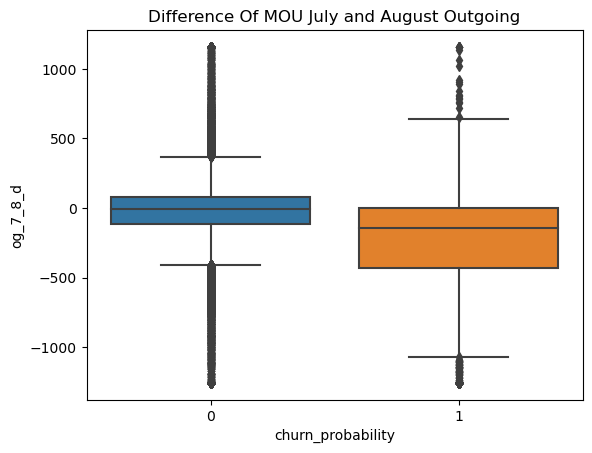

In [93]:
# Difference in Outgoing MOU

sns.boxplot(data=HVCData, x='churn_probability', y='og_7_8_d')
plt.title('Difference Of MOU July and August Outgoing')
plt.show()

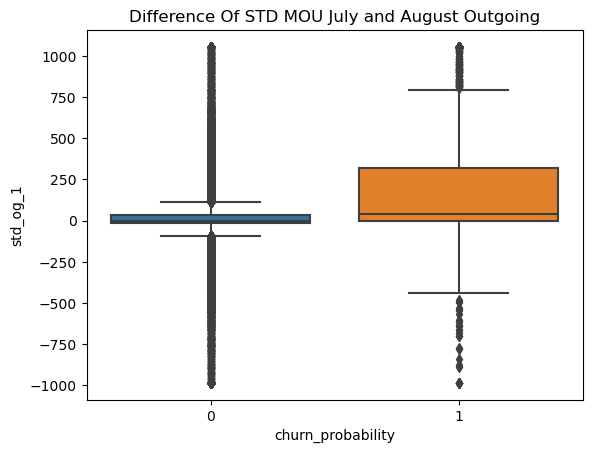

In [94]:
# Difference Of STD MOU July and August Outgoing

sns.boxplot(data=HVCData, x='churn_probability',y='std_og_1')
plt.title('Difference Of STD MOU July and August Outgoing')
plt.show()

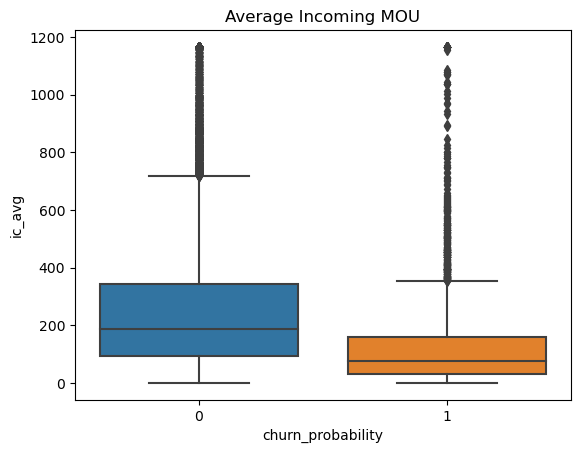

In [95]:
# Average Incoming MOU

sns.boxplot(data=HVCData,x='churn_probability',y='ic_avg')
plt.title('Average Incoming MOU')
plt.show()

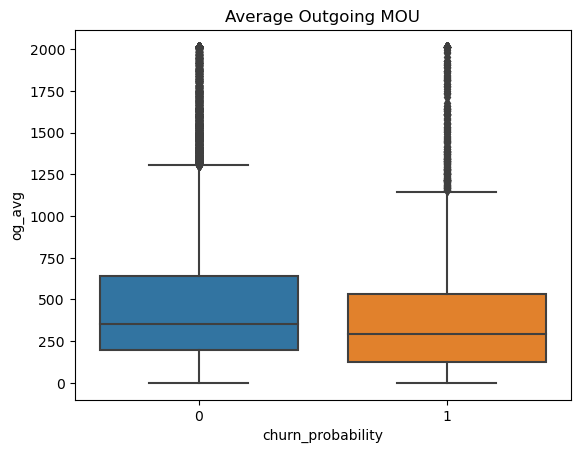

In [96]:
# Average Outgoing MOU

sns.boxplot(data=HVCData,x='churn_probability',y='og_avg')
plt.title('Average Outgoing MOU')
plt.show()

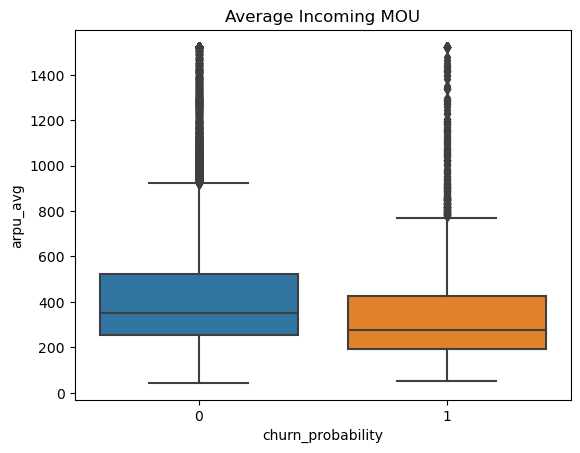

In [97]:
# Average ARPU

sns.boxplot(data=HVCData,x='churn_probability',y='arpu_avg')
plt.title('Average Incoming MOU')
plt.show()

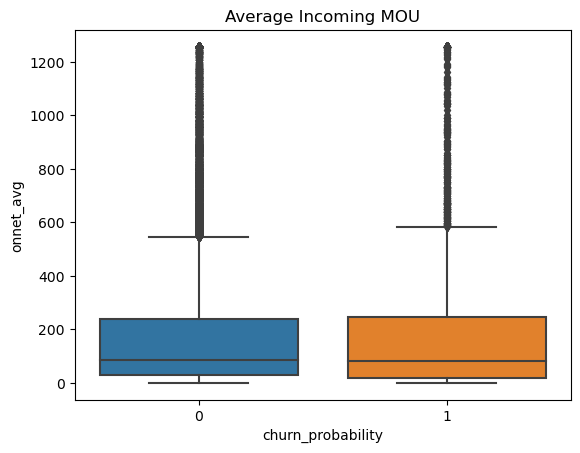

In [98]:
# Average On-net MOU

sns.boxplot(data=HVCData,x='churn_probability',y='onnet_avg')
plt.title('Average Incoming MOU')
plt.show()

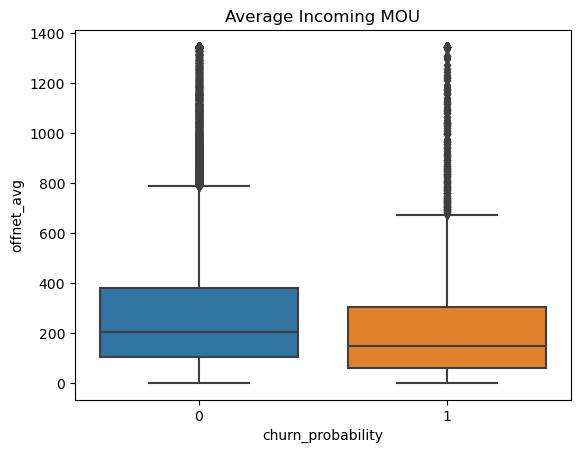

In [99]:
# Average Off-net MOU

sns.boxplot(data=HVCData,x='churn_probability',y='offnet_avg')
plt.title('Average Incoming MOU')
plt.show()

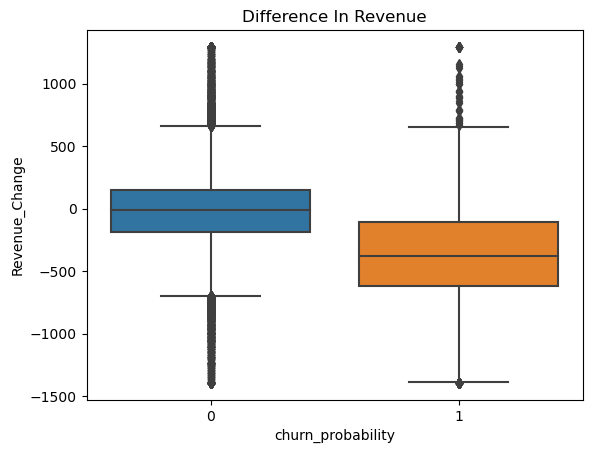

In [100]:
# Difference in total Revenue

sns.boxplot(data=HVCData,x='churn_probability',y='Revenue_Change')
plt.title('Difference In Revenue')
plt.show()

## 4. Data Pre-Processing

### Final DataFrame for train data

In [101]:
# Final DataFrame

churnDF = HVCData

In [102]:
churnDF.head()

arpu_6   arpu_7   arpu_8  onnet_mou_6  onnet_mou_7  onnet_mou_8  \
0  445.826   18.310   24.690        16.54         0.00         0.00   
1  292.724  228.753  418.233       135.54        63.61       177.36   
2  439.919  397.946  392.024       244.46       108.31        42.98   
3  340.266  205.397  191.780       123.76       116.34        75.93   
4  580.549  377.294  338.286        10.43        24.99       194.43   

   offnet_mou_6  offnet_mou_7  offnet_mou_8  roam_ic_mou_6  roam_ic_mou_7  \
0        104.81          8.16          2.36          18.56            0.0   
1         46.39         65.48         92.81           0.00            0.0   
2        571.98        727.91        644.43           0.00            0.0   
3         98.51         94.11        150.61           0.00            0.0   
4        317.11        341.79        197.09           0.00            0.0   

   roam_ic_mou_8  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  \
0            0.0           20.3            0.0            0.0   
1            0.0            0.0            0.0            0.0   
2            0.0            0.0            0.0            0.0   
3            0.0            0.0            0.0            0.0   
4            0.0            0.0            0.0            0.0   

   loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2m_mou_6  \
0             16.54              0.00              0.00             47.36   
1             86.39             27.59             82.33             43.28   
2              0.00              7.86              3.98             44.01   
3             88.43             78.51             72.08             49.48   
4             10.43             24.99            194.43            313.76   

   loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2f_mou_6  loc_og_t2f_mou_7  \
0              1.44              0.00             25.98              0.00   
1             29.49             83.54              0.58              0.36   
2             13.93             51.24              0.00              0.00   
3             41.76             43.19              1.76              0.00   
4            330.88            185.88              3.26             10.91   

   loc_og_t2f_mou_8  loc_og_t2c_mou_6  loc_og_t2c_mou_7  loc_og_t2c_mou_8  \
0              0.00              0.00               0.0               0.0   
1              0.00              2.53               0.0               0.0   
2              0.00              0.00               0.0               0.0   
3              3.06              8.16               0.0               0.0   
4              4.94              0.00               0.0               0.0   

   loc_og_mou_6  loc_og_mou_7  loc_og_mou_8  std_og_t2t_mou_6  \
0         89.89          1.44          0.00              0.00   
1        130.26         57.46        165.88             49.14   
2         44.01         21.79         55.23            244.46   
3        139.68        120.28        118.34             35.33   
4        327.46        366.79        385.26              0.00   

   std_og_t2t_mou_7  std_og_t2t_mou_8  std_og_t2m_mou_6  std_og_t2m_mou_7  \
0              0.00              0.00             11.16              6.71   
1             36.01             95.03              0.00             35.61   
2            100.44             38.99            527.96            713.98   
3             37.83              3.85             38.63             52.34   
4              0.00              0.00              0.00              0.00   

   std_og_t2m_mou_8  std_og_t2f_mou_6  std_og_t2f_mou_7  std_og_t2f_mou_8  \
0              2.36               0.0               0.0              0.00   
1              9.26               0.0               0.0              0.00   
2            593.18               0.0               0.0              0.00   
3            104.34               0.0               0.0              0.00   
4              0.00               0.0               0.0              6.26   

   std_og_mou_6  

In [103]:
churnDF.shape

(36623, 167)

### Checking Class imbalance

In [104]:
churnDF['churn_probability'].value_counts()

0    33317
1     3306
Name: churn_probability, dtype: int64

#### Observations
- The data is highly imbalanced. We have only 3306 data for churn while non -churn data is approx 10X more. The training data needs to be treated for class imbalance

### Splitting the data - Train - Test Split
- Train data will be divided into training and test(Validation) data
- X_train is the training data on which the model will be trained
- X_test is the validation data on which the model will be tested for various metrics
- y_train is the dependent variable on which model will be trained.
- y_test is the dependent variable on which model predicted values will be validated.

In [105]:
# Defining dependent and independent features
X = churnDF.drop(['churn_probability'],axis=1)
y = churnDF['churn_probability']

In [106]:
# Splitting the Data in 70:30

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=42)
print("X_train.shape : ",X_train.shape)
print("Y_train.shape : ",y_train.shape)
print("X_test.shape : ",X_test.shape)
print("Y_test.shape : ",y_test.shape)


X_train.shape :  (25636, 166)
Y_train.shape :  (25636,)
X_test.shape :  (10987, 166)
Y_test.shape :  (10987,)


In [107]:
# X_train_features for extracting features
X_train_features = X_train
X_train_features.columns

Index(['arpu_6', 'arpu_7', 'arpu_8', 'onnet_mou_6', 'onnet_mou_7',
       'onnet_mou_8', 'offnet_mou_6', 'offnet_mou_7', 'offnet_mou_8',
       'roam_ic_mou_6',
       ...
       'og_7_8_d', 'ic_7_8_d', 'og_avg', 'arpu_avg', 'onnet_avg', 'offnet_avg',
       'vbc_avg', 'Total_Revenue_7_8', 'Revenue_Change', 'ic_avg'],
      dtype='object', length=166)

### Standardizing the data

In [108]:
# Standardization of Numerical Data
Standardizer = StandardScaler()
X_train = Standardizer.fit_transform(X_train.values)
X_test = Standardizer.transform(X_test.values)

In [109]:
# Standardization of Numerical Data - TEST DF
X_churnDFTest = Standardizer.transform(churnDFTest.values)

In [110]:
X_churnDFTest.shape

(30000, 166)

In [111]:
X_train.shape 

(25636, 166)

In [112]:
X_test.shape

(10987, 166)

### Handling Class imbalance
- Class imbalance can adversaly affect the various performance metrics since one of the class is highly dominant in the data which does not allow other class to be fully learnt by the model
- Since there is high class imbalance, we need to handle this.
- SMOTE or Class_weight can be used for handling Class imbalance in the data
- In this case, we will use the class_weight to handle the imbalance in class.

### Defining Functions for Performance Metrics

In [113]:
# Function for Baseline Performance Metrics

def model_metrics(matrix) :
    TN = matrix[0][0]
    TP = matrix[1][1]
    FP = matrix[0][1]
    FN = matrix[1][0]
    accuracy = round((TP + TN)/float(TP+TN+FP+FN),3)
    print('Accuracy :' ,accuracy )
    sensitivity = round(TP/float(FN + TP),3)
    print('Sensitivity / True Positive Rate / Recall :', sensitivity)
    specificity = round(TN/float(TN + FP),3)
    print('Specificity / True Negative Rate : ', specificity)
    precision = round(TP/float(TP + FP),3)
    print('Precision / Positive Predictive Value :', precision)
    print('F1-score :', round(2*precision*sensitivity/(precision + sensitivity),3))

In [114]:
# Function for Confusion Matrix
def plot_confusion_matrix(test_y, predict_y):
    C = confusion_matrix(test_y, predict_y)
    
    # Print metrices
    model_metrics(C)
    
    A =(((C.T)/(C.sum(axis=1))).T)
    B =(C/C.sum(axis=0))
    plt.figure(figsize=(20,4))    
    labels = [1,2]
    # representing A in heatmap format
    cmap=sns.light_palette("navy")
    
    plt.subplot(1, 3, 1)
    sns.heatmap(C, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title("Confusion matrix")
    
    plt.subplot(1, 3, 2)
    sns.heatmap(B, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title("Precision matrix")
    
    plt.subplot(1, 3, 3)
    # representing B in heatmap format
    sns.heatmap(A, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title("Recall matrix")
    
    plt.show()


In [115]:
# Function for performance metrics and analysis

def analyze(Y_Train,Y_train_pred,Y_test,Y_test_pred):
    
    # Finding FPR,TPR,Threshold
   
    Train_fpr,Train_tpr,Train_Thresholds=roc_curve(Y_Train,Y_train_pred)
    Test_fpr,Test_tpr,Test_Thresholds=roc_curve(Y_test,Y_test_pred)
   
    # Plotting ROC Curve

    print("**********************************************************************************************************************")

    plt.figure(figsize=(8,4))
    plt.plot(Train_fpr,Train_tpr,label='Train AUC: {0:.3f}'.format(roc_auc_score(Y_Train,Y_train_pred)),color='darkgreen',lw=1.5)
    plt.plot(Test_fpr,Test_tpr,label='Test AUC: {0:.3f}'.format(roc_auc_score(Y_test,Y_test_pred)),color='maroon',lw=1.5)
    plt.legend(fontsize=12) 
    plt.xlabel('FPR') 
    plt.ylabel('TPR') 
    plt.title("ROC Curve")
    plt.grid() 
    plt.show()

    print("*********************************************************************************************************************\n")
    #Score
    
    print("Train AUC : ",roc_auc_score(Y_Train,Y_train_pred))
    print("Test AUC : ",roc_auc_score(Y_test,Y_test_pred))
    print("F1 Score : ",f1_score(Y_test, Y_test_pred,average='micro'))
    

    print("\n**********************************************************************************************************************")
    plot_confusion_matrix(Y_test, Y_test_pred)

## 5. Modelling

### Model 1: Logistic Regression

**********************************************************************************************************************


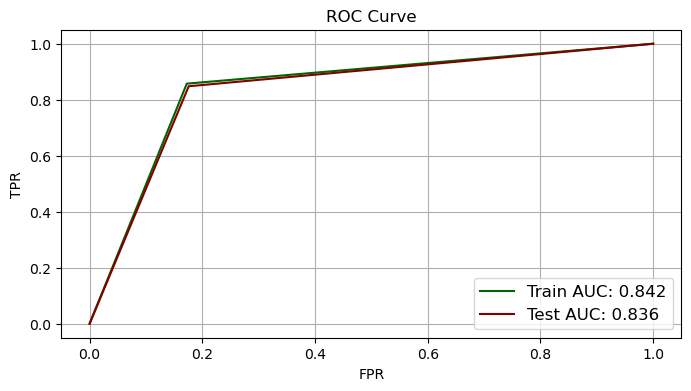

*********************************************************************************************************************

Train AUC :  0.8424699697653245
Test AUC :  0.8360988256824767
F1 Score :  0.8263402202603076

**********************************************************************************************************************
Accuracy : 0.826
Sensitivity / True Positive Rate / Recall : 0.848
Specificity / True Negative Rate :  0.824
Precision / Positive Predictive Value : 0.332
F1-score : 0.477


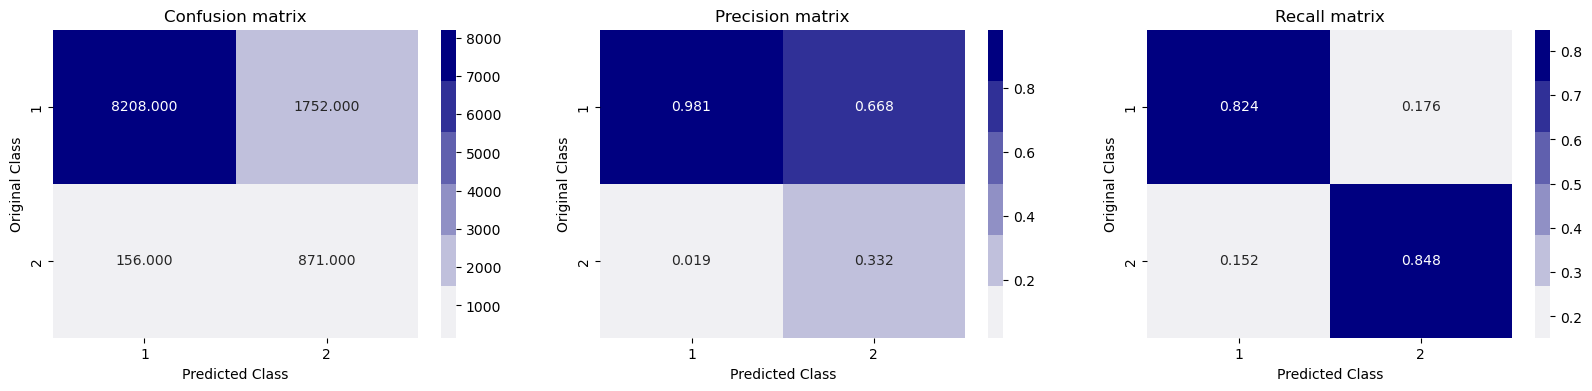

In [116]:
# Logistic Regression
logReg = LogisticRegression(class_weight='balanced')
baseline_model = logReg.fit(X_train, y_train)

y_train_pred = baseline_model.predict(X_train)
y_test_pred  = baseline_model.predict(X_test)

analyze(y_train,y_train_pred,y_test,y_test_pred)

#### Observations
- The logistic regression model has an accuracy of 82.6 %
- Though accuracy is good but other metrics are bad such as Precision is just 0.332
- We need to tune the hyperparameters

### Logistic regression + Hyperparameter Tuning

In [117]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score

parameter={'C' :[10 ** x for x in range(-5, 4)]}

logReg2=LogisticRegression(class_weight='balanced')
LRG=GridSearchCV(logReg2,parameter,cv=4,scoring='roc_auc',return_train_score=True)
LRG.fit(X_train, y_train)

results=pd.DataFrame.from_dict(LRG.cv_results_)
Best_C=LRG.best_params_['C']
Best_Score=LRG.best_score_

In [118]:
result=results.sort_values(['param_C'])
gscv_train_auc=results['mean_train_score']
gscv_CV_auc=results['mean_test_score']

In [119]:
from tqdm import tqdm_notebook as tqdm
C=[10 ** x for x in range(-5, 4)]
log_C=[]
for x in tqdm(C):
    log_C.append(np.log(x))

  0%|          | 0/9 [00:00<?, ?it/s]

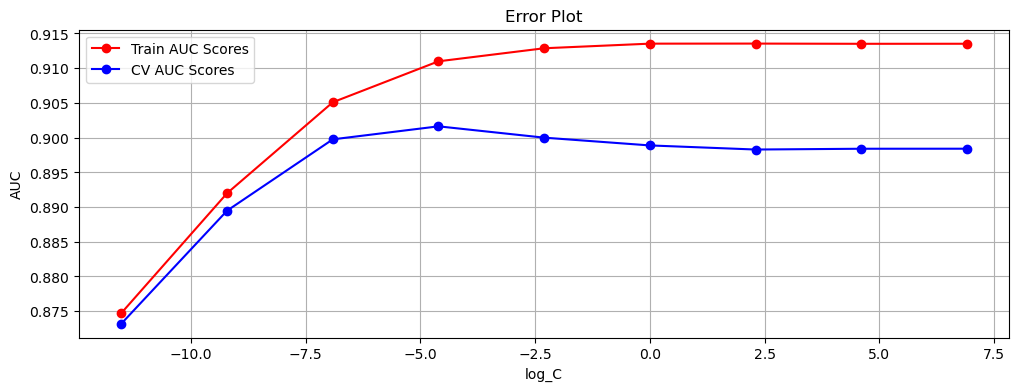

In [120]:
plt.figure(figsize=(12,4))
plt.plot(log_C,gscv_train_auc,label='Train AUC Scores',linestyle='-',marker='o',color='r')
plt.plot(log_C,gscv_CV_auc,label='CV AUC Scores',linestyle='-',marker='o',color='b')
plt.legend()
plt.xlabel('log_C')
plt.ylabel('AUC')
plt.title('Error Plot')
plt.grid()
plt.show()

In [121]:
print("Best C : ",Best_C)
print("Best Score : ",Best_Score)

Best C :  0.01
Best Score :  0.9016188070104136


### Logistic Regression on Hyperparameters

**********************************************************************************************************************


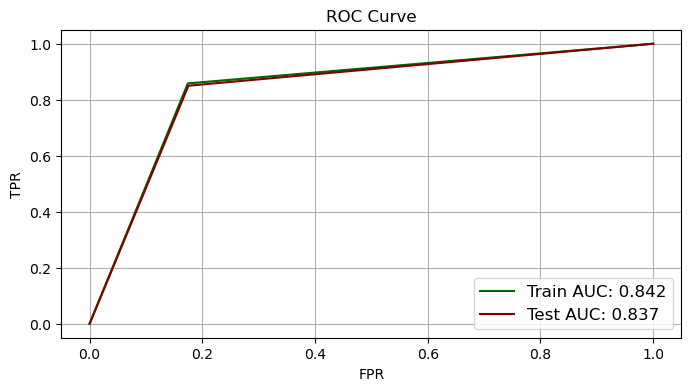

*********************************************************************************************************************

Train AUC :  0.8419668569225113
Test AUC :  0.8373235395330103
F1 Score :  0.8269773368526441

**********************************************************************************************************************
Accuracy : 0.827
Sensitivity / True Positive Rate / Recall : 0.85
Specificity / True Negative Rate :  0.825
Precision / Positive Predictive Value : 0.333
F1-score : 0.479


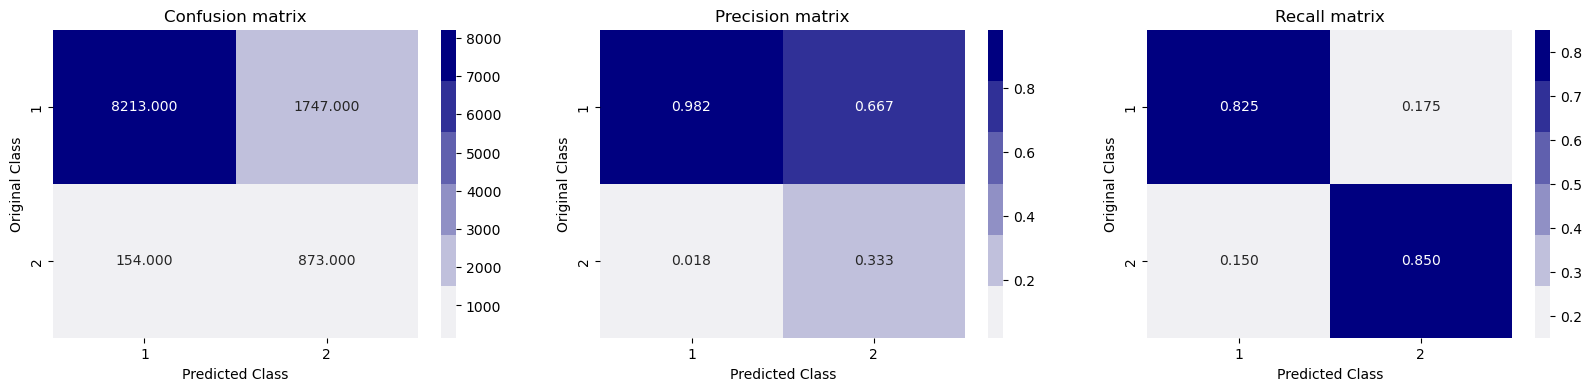

In [122]:
## Logistic Regrssion on Hyperparameters
from sklearn.metrics import roc_curve
Best_LR=LogisticRegression(C=Best_C,n_jobs=-1,class_weight='balanced')
Best_LR.fit(X_train,y_train)

y_train_pred=Best_LR.predict(X_train)
y_test_pred=Best_LR.predict(X_test)

analyze(y_train,y_train_pred,y_test,y_test_pred)

#### Observations
- Accuracy is 82.7%, which is good enough, but can be improved further using other techniques.
- Recall = 0.85, which is good.
- Precision = 0.333, which is poor and needs to be improved further. With increase in precision, recall will decrease. We need to balance both of them.
- F1 Score = 0.479, whihc also needs to be improved further

### Dimentionality Reduction - Principal Component Analysis (PCA)

In [123]:
from sklearn.decomposition import PCA

PCA_I = PCA(random_state=42)
PCA_I.fit(X_train)


PCA(random_state=42)

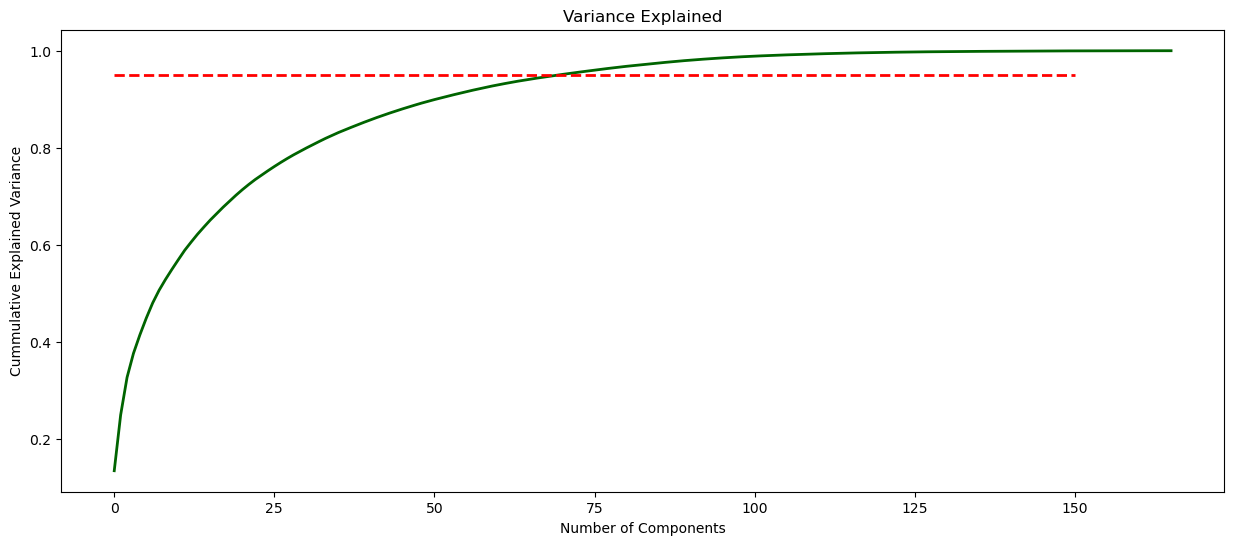

In [124]:
# Plot of Variance Explained - Scree Plot

fig = plt.figure(figsize = (15,6))
plt.plot(np.cumsum(PCA_I.explained_variance_ratio_),color='darkgreen',linewidth=2)
plt.hlines(y=0.95, xmin=0, xmax=len(np.linspace(0, 150, 150)), colors='r', linestyles='--', linewidth=2)
plt.xlabel('Number of Components')
plt.ylabel('Cummulative Explained Variance')
plt.title('Variance Explained')
plt.show()

In [125]:
# Finding the number of Principal components which explains 95% variance
np.sum(np.cumsum(np.round(PCA_I.explained_variance_ratio_, decimals=4)*100)<=95)

70

#### Observation:

- 95% Variance Explained by 70 Features.

#### Applying PCA with n_components = 70

In [126]:
PCA_In = PCA(n_components = 70)
X_train_pca =PCA_In.fit_transform(X_train)
X_test_pca =PCA_In.transform(X_test)

# TEST DF
X_churnDFTest_pca = PCA_In.transform(X_churnDFTest)

### HeatMap - Correlation after applying PCA

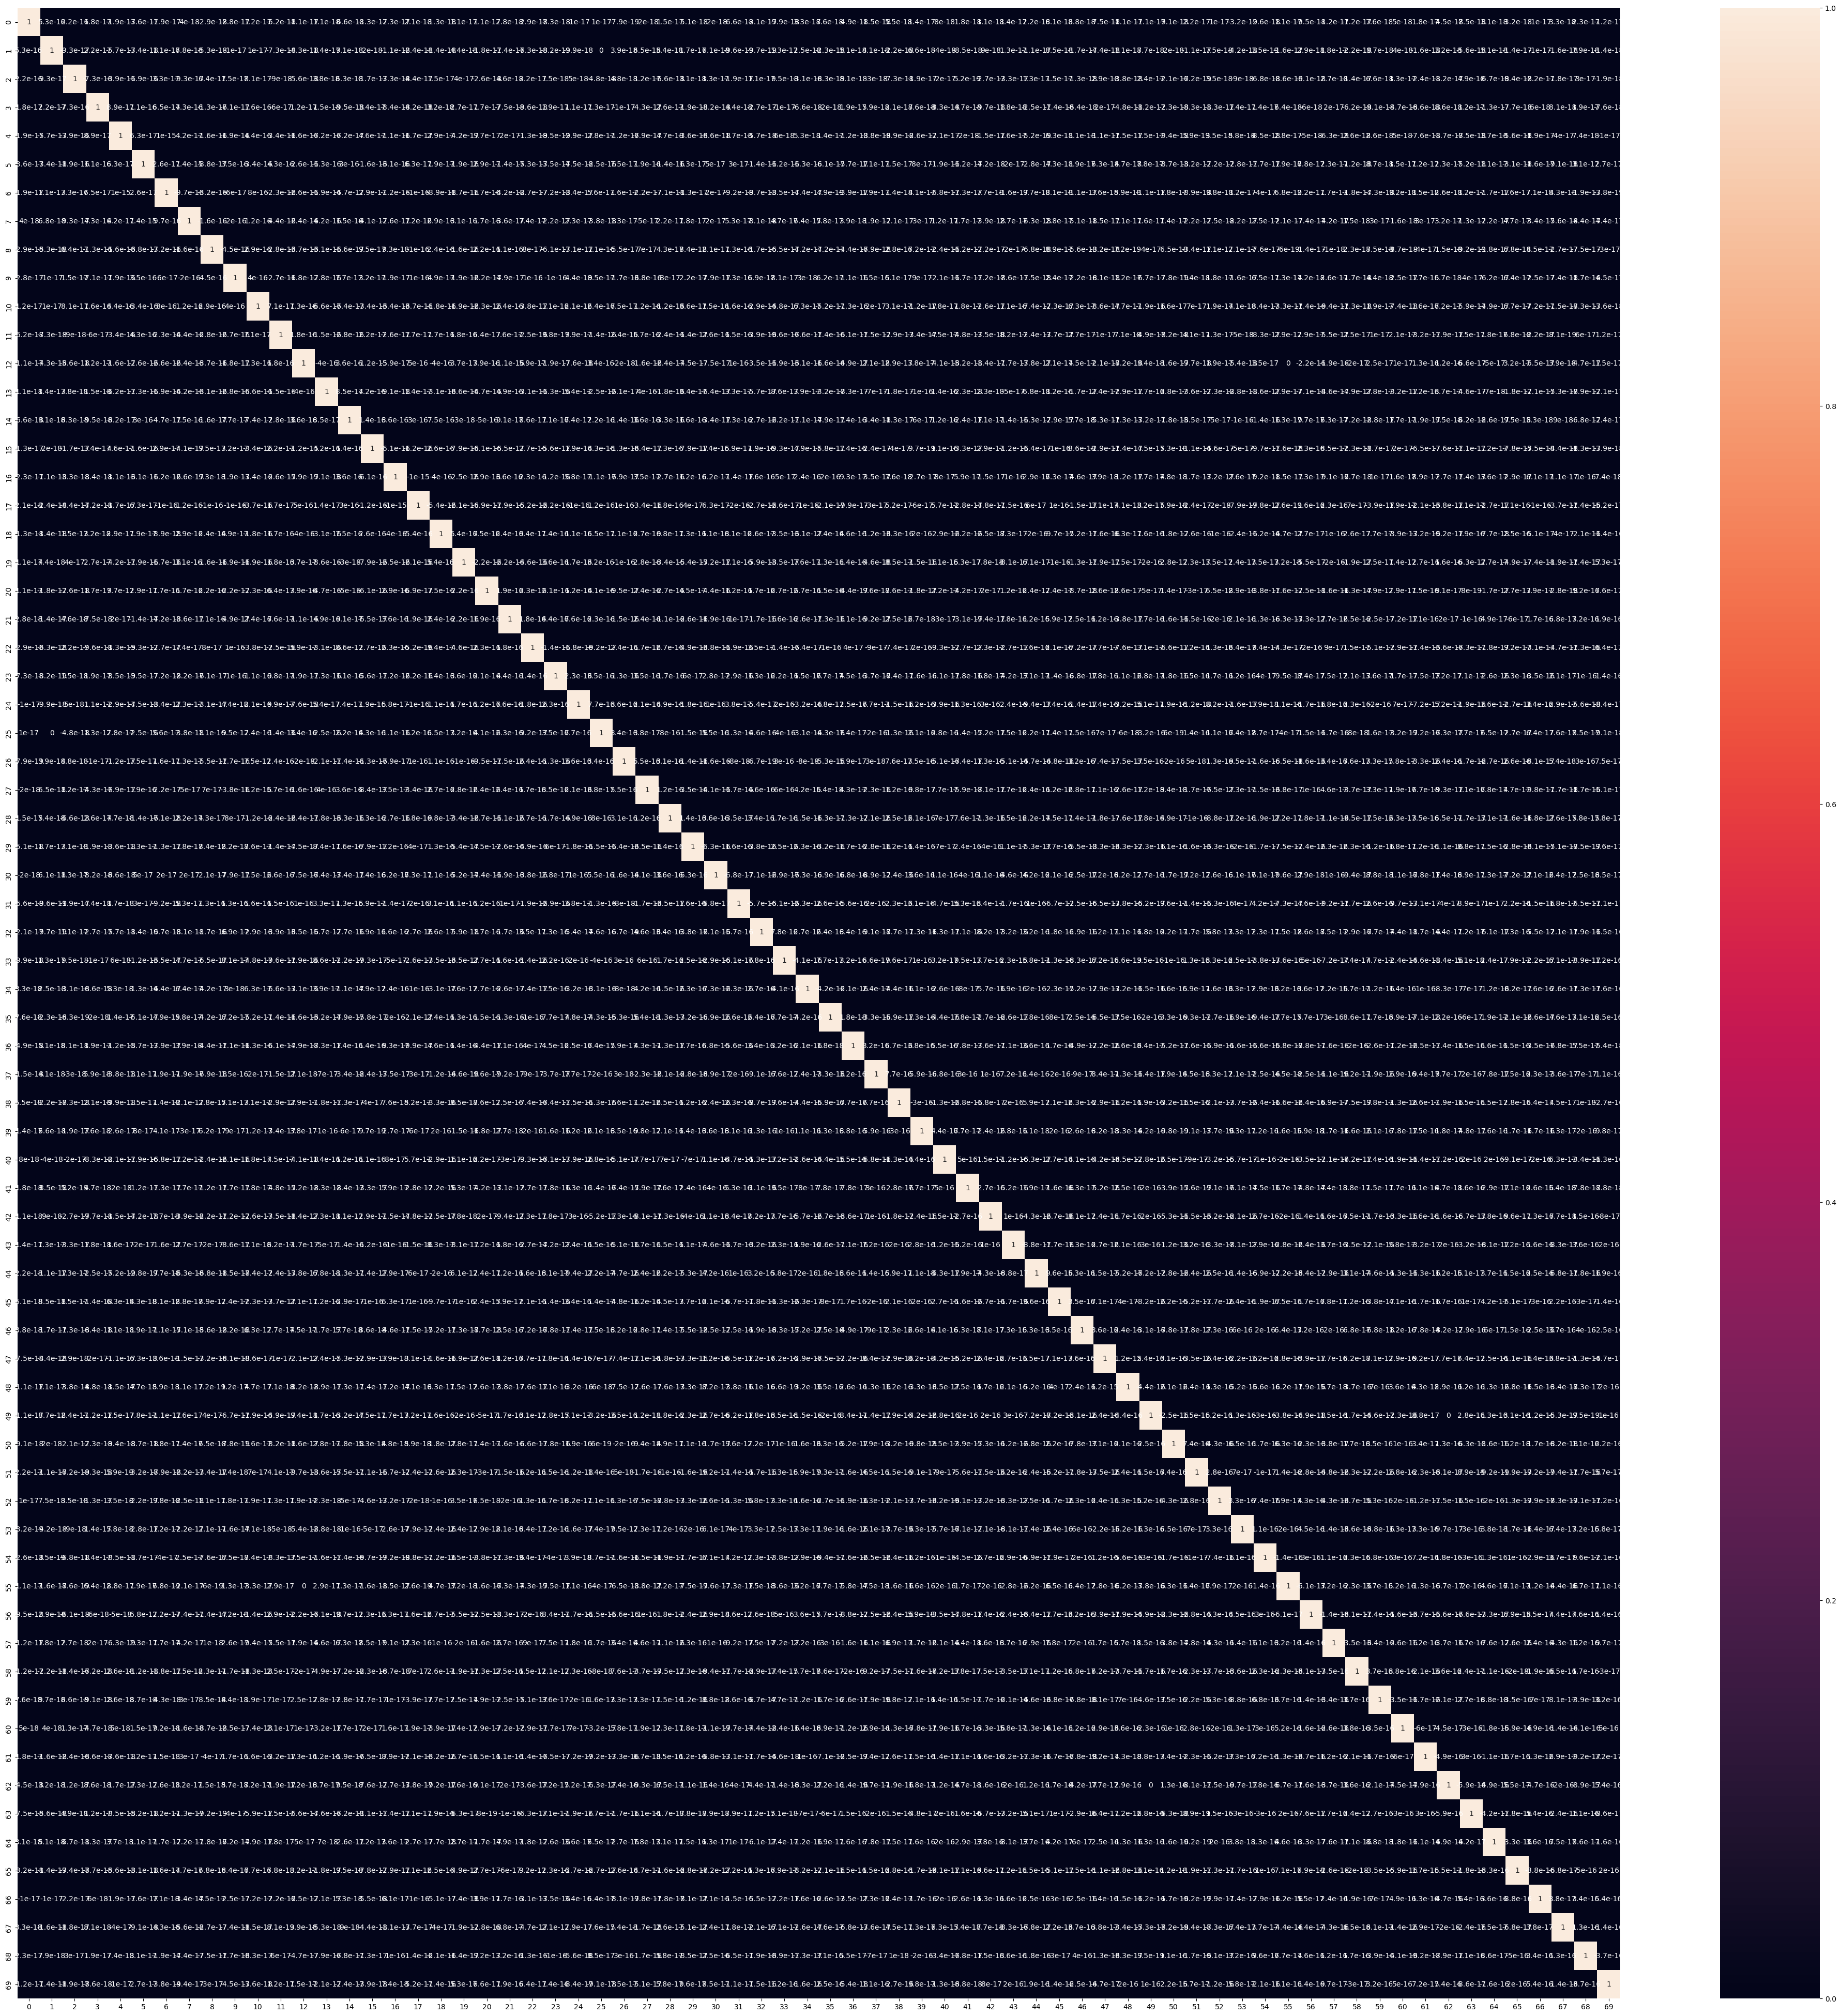

In [127]:
plt.figure(figsize=(50,50))
sns.heatmap(np.corrcoef(X_train_pca.transpose()),annot = True)
plt.show()

### Model 2: Logistic Regression + PCA

**********************************************************************************************************************


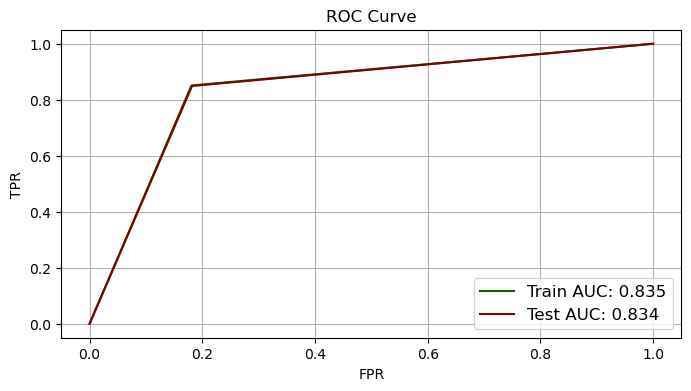

*********************************************************************************************************************

Train AUC :  0.8350475289562285
Test AUC :  0.8336238332101531
F1 Score :  0.8210612542095204

**********************************************************************************************************************
Accuracy : 0.821
Sensitivity / True Positive Rate / Recall : 0.849
Specificity / True Negative Rate :  0.818
Precision / Positive Predictive Value : 0.325
F1-score : 0.47


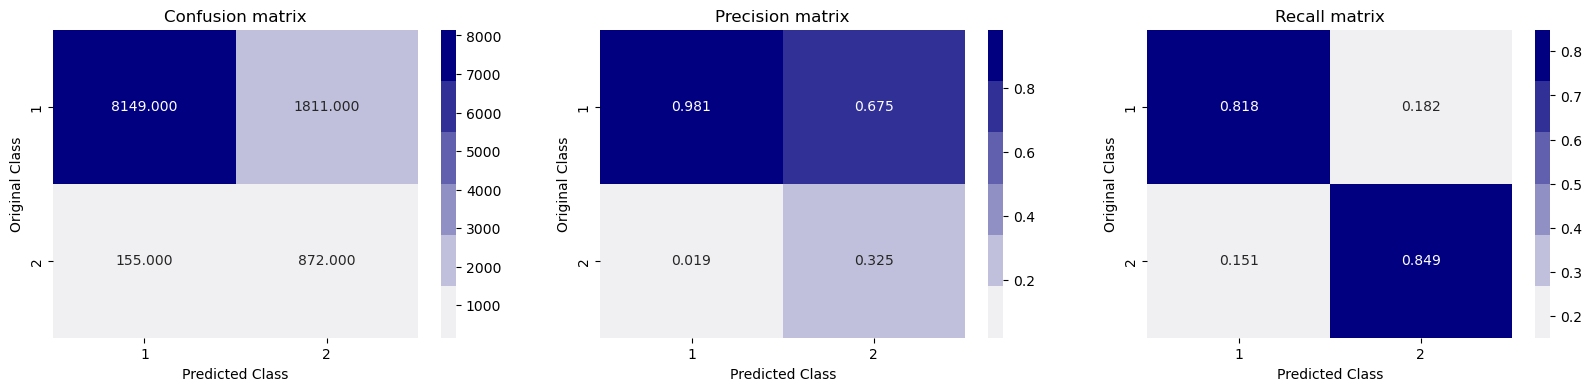

In [128]:
from sklearn.linear_model import LogisticRegression

LRS = LogisticRegression(class_weight='balanced')
LRSF = LRS.fit(X_train_pca,y_train)

y_train_pred=LRSF.predict(X_train_pca)
y_test_pred=LRSF.predict(X_test_pca)

analyze(y_train,y_train_pred,y_test,y_test_pred)

#### Observtaions
- The model hyperparameters needs to be tuned to get optimal results

### Logistic Regression + PCA - Hypertuning Parameters

In [129]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score

parameter={'C' :[10 ** x for x in range(-5, 4)]}

LR=LogisticRegression(class_weight='balanced')
LRG=GridSearchCV(LR,parameter,cv=4,scoring='roc_auc',return_train_score=True)
LRG.fit(X_train_pca, y_train)

results=pd.DataFrame.from_dict(LRG.cv_results_)
Best_C=LRG.best_params_['C']
Best_Score=LRG.best_score_

In [130]:
result=results.sort_values(['param_C'])
gscv_train_auc=results['mean_train_score']
gscv_CV_auc=results['mean_test_score']

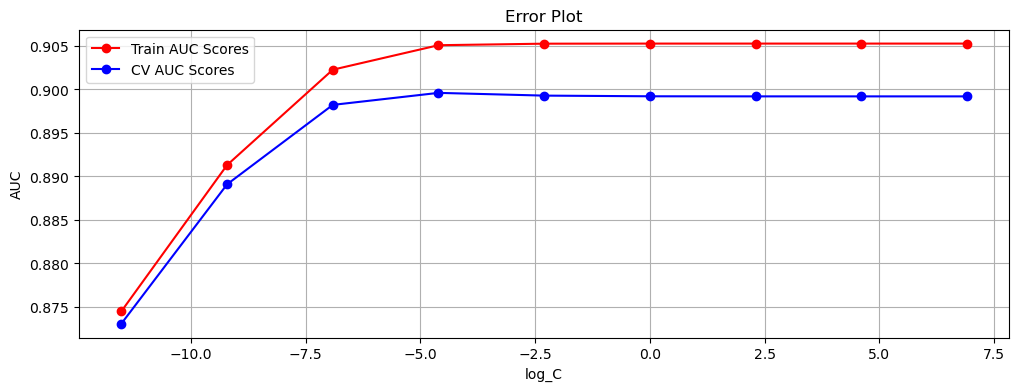

In [131]:
plt.figure(figsize=(12,4))
plt.plot(log_C,gscv_train_auc,label='Train AUC Scores',linestyle='-',marker='o',color='r')
plt.plot(log_C,gscv_CV_auc,label='CV AUC Scores',linestyle='-',marker='o',color='b')
plt.legend()
plt.xlabel('log_C')
plt.ylabel('AUC')
plt.title('Error Plot')
plt.grid()
plt.show()

In [132]:
print("Best C : ",Best_C)
print("Best Score : ",Best_Score)

Best C :  0.01
Best Score :  0.8995862211530765


### Logistic Regression on Hyperparameters

**********************************************************************************************************************


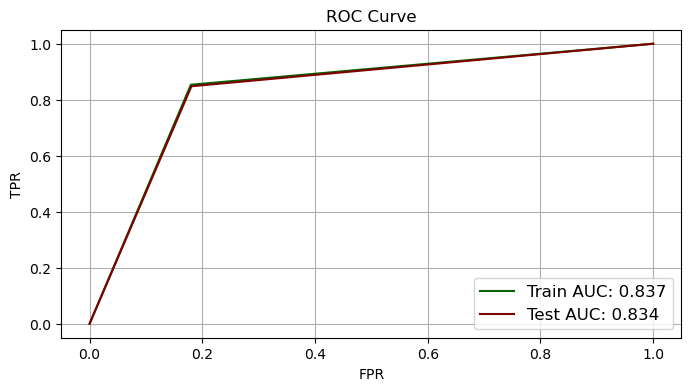

*********************************************************************************************************************

Train AUC :  0.836899067252723
Test AUC :  0.8336891871282599
F1 Score :  0.821971420770001

**********************************************************************************************************************
Accuracy : 0.822
Sensitivity / True Positive Rate / Recall : 0.848
Specificity / True Negative Rate :  0.819
Precision / Positive Predictive Value : 0.326
F1-score : 0.471


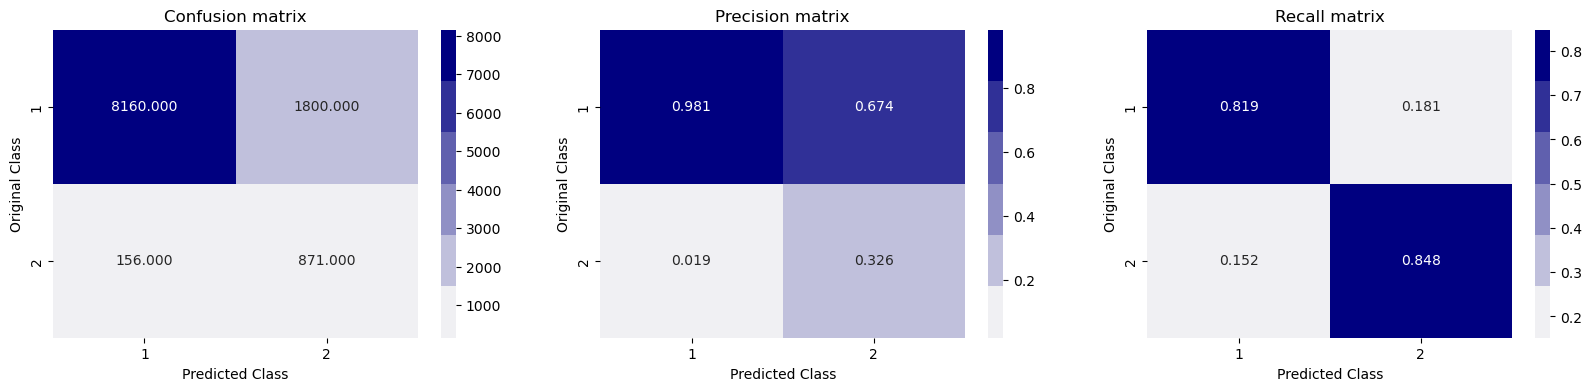

In [133]:
from sklearn.metrics import roc_curve
Best_LR=LogisticRegression(C=Best_C,n_jobs=-1, class_weight = 'balanced')
Best_LR.fit(X_train_pca,y_train)

y_train_pred=Best_LR.predict(X_train_pca) 
y_test_pred=Best_LR.predict(X_test_pca)

analyze(y_train,y_train_pred,y_test,y_test_pred)

#### Observations
- Accuracy is 82.1%, which is good enough, but can be improved further using other techniques.
- Recall = 0.845, which is good.
- Precision = 0.325, which is poor and needs to be improved further. With increase in precision, recall will decrease. We need to balance both of them.
- F1 Score = 0.469, whihc also needs to be improved further
- Logistic Regression with PCA does not improve in comparision to Logistic Regression. We need to move to other algorithms for better results.

### Model 3: Random Forest + PCA

**********************************************************************************************************************


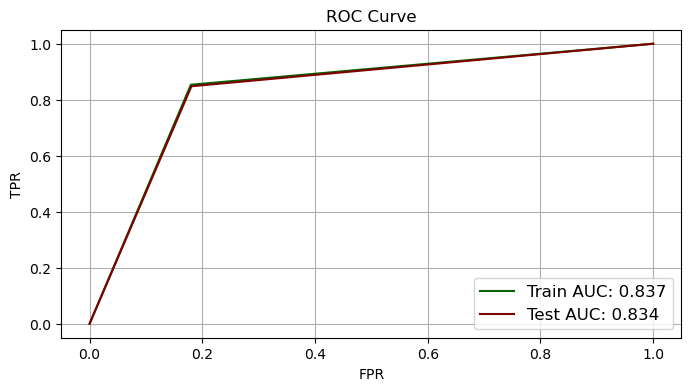

*********************************************************************************************************************

Train AUC :  0.836899067252723
Test AUC :  0.8336891871282599
F1 Score :  0.821971420770001

**********************************************************************************************************************
Accuracy : 0.822
Sensitivity / True Positive Rate / Recall : 0.848
Specificity / True Negative Rate :  0.819
Precision / Positive Predictive Value : 0.326
F1-score : 0.471


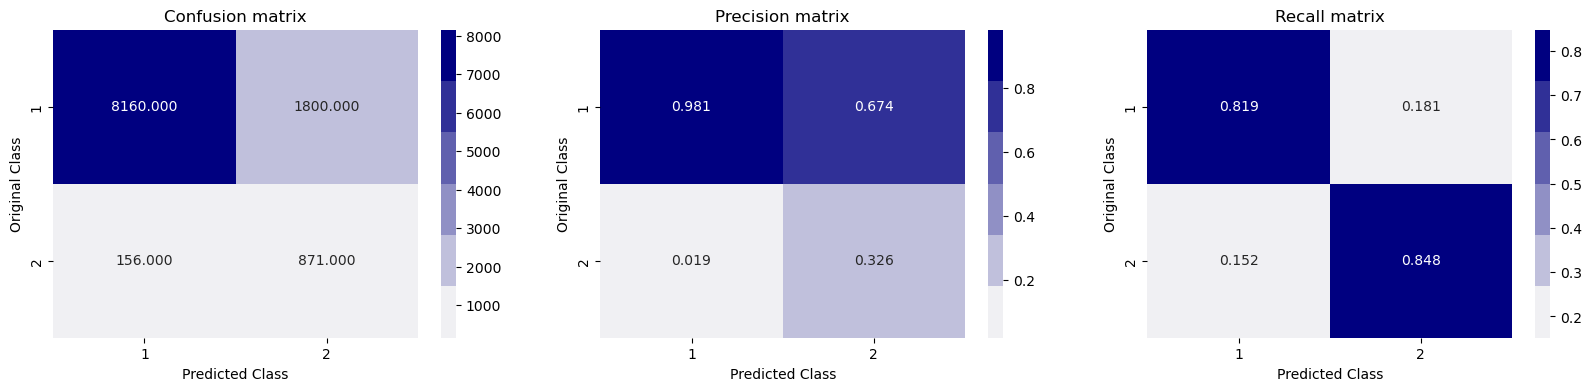

In [134]:
from sklearn.ensemble import RandomForestClassifier

RF=RandomForestClassifier(class_weight="balanced")
RFG=RF.fit(X_train_pca,y_train)

Y_train_pred=RFG.predict(X_train_pca) 
Y_test_pred=RFG.predict(X_test_pca)

analyze(y_train,y_train_pred,y_test,y_test_pred)

### Random Forest + PCA - HyperTuning

In [135]:
parameters={'max_depth': [4,5,9,12,15],'n_estimators': [100,200,500,700]}

RF=RandomForestClassifier(class_weight='balanced')

RFG=GridSearchCV(RF,parameters,cv=3,scoring='roc_auc',return_train_score=True,n_jobs=-1,verbose=6)
RFG.fit(X_train_pca,y_train)

results=pd.DataFrame.from_dict(RFG.cv_results_)
RF_best_max_depth=RFG.best_params_['max_depth']
RF_best_n_estimators=RFG.best_params_['n_estimators']
RF_best_score=RFG.best_score_

Fitting 3 folds for each of 20 candidates, totalling 60 fits


In [136]:
max_depth=[]
n_estimators=[]
gscv_train_auc=[]
gscv_CV_auc=[]

for i in range(len(results)):
    z=results['params'][i]
    max_depth.append(z['max_depth'])
    n_estimators.append(z['n_estimators'])
    gscv_train_auc.append(results['mean_train_score'][i])
    gscv_CV_auc.append(results['mean_test_score'][i])

In [137]:
print('Best Max Depth : ',RF_best_max_depth)
print('Best n_estimators : ',RF_best_n_estimators)
print('Best Score : ',RF_best_score)

Best Max Depth :  15
Best n_estimators :  700
Best Score :  0.89774842952481


### Random Forest + PCA on Hyperparameters

**********************************************************************************************************************


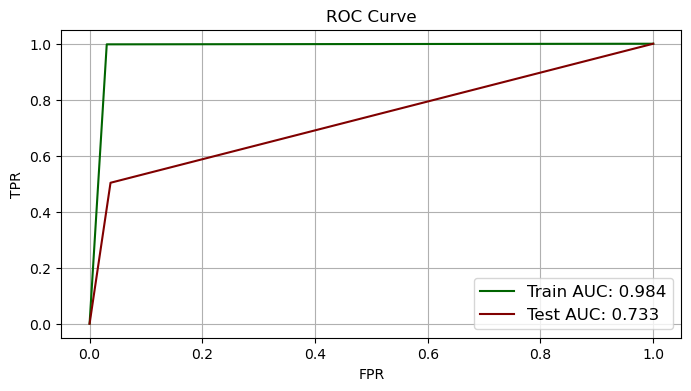

*********************************************************************************************************************

Train AUC :  0.9836827510670884
Test AUC :  0.7331296950215662
F1 Score :  0.9199053426777101

**********************************************************************************************************************
Accuracy : 0.92
Sensitivity / True Positive Rate / Recall : 0.503
Specificity / True Negative Rate :  0.963
Precision / Positive Predictive Value : 0.583
F1-score : 0.54


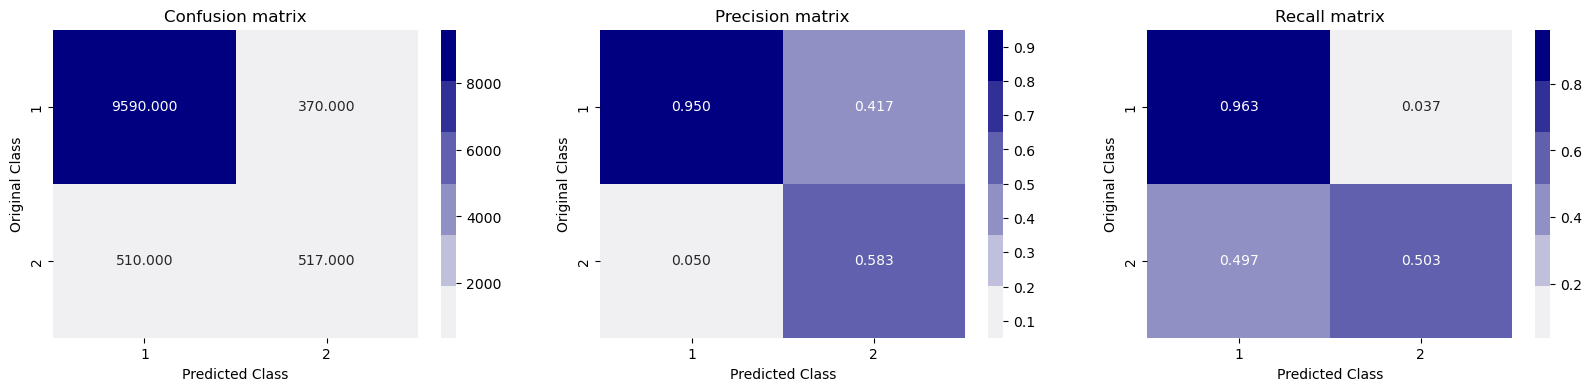

In [138]:
Best_DT=RandomForestClassifier(max_depth=RF_best_max_depth,n_estimators=RF_best_n_estimators, class_weight='balanced')

Best_DT.fit(X_train_pca,y_train)

y_train_pred_rf = Best_DT.predict(X_train_pca)
y_test_pred_rf = Best_DT.predict(X_test_pca)


analyze(y_train,y_train_pred_rf,y_test,y_test_pred_rf)

#### Observations
- Accuracy is 91.9%, which is significant improvement over Logistic regression model.
- Recall = 0.502, which has reduced since precision has improved.
- Precision = 0.574, which has improved at the cost of recall. With increase in precision, recall will decrease. We need to balance both of them.
- F1 Score = 0.536, which also has imrpoved.
- Random Forest with PCA produces better results in comparision to Logistic Regression with PCA. We need to try other algorithms to select the best model.
- the hyperparameters are :
    - max_depth = 15
    - n_estimators = 700

### Finding top features using Random Forest model

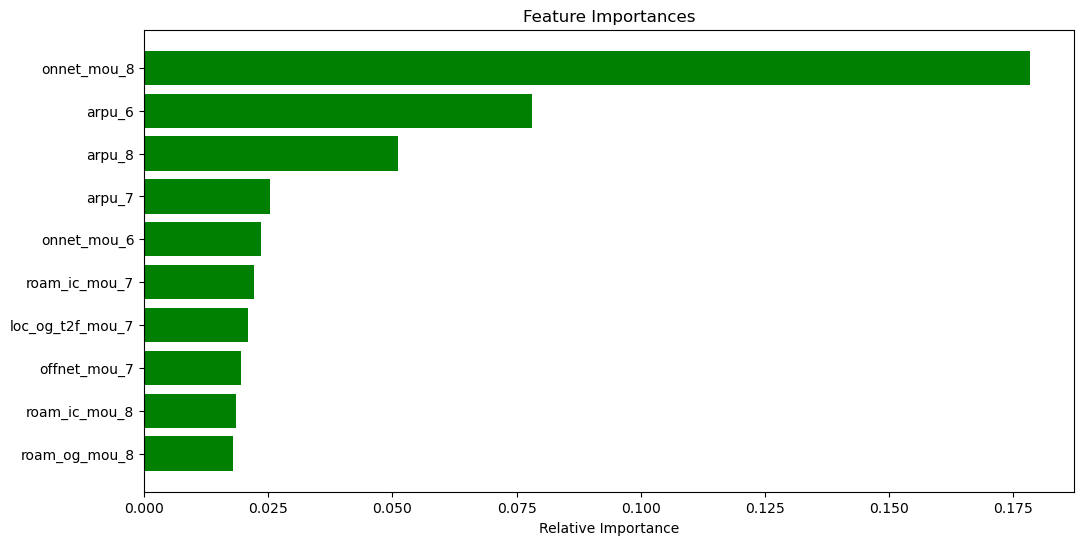

In [139]:
features = X_train_features.columns 
importances = Best_DT.feature_importances_ 
indices = (np.argsort(importances))[-10:] 
plt.figure(figsize=(12,6)) 
plt.title('Feature Importances') 
plt.barh(range(len(indices)), importances[indices], color='g') 
plt.yticks(range(len(indices)), [features[i] for i in indices]) 
plt.xlabel('Relative Importance') 
plt.show()

#### Observations
- The top 10 features are:
    - onnet_mou_8
    - arpu_6
    - arpu_8
    - arpu_7
    - onnet_mou_6
    - roam_ic_mou_7
    - offnet_mou_7
    - loc_og_t2f_mou_7
    - roam_ic_mou_8
    - roam_og_mou_8

### Model 4: XGBoost + PCA

**********************************************************************************************************************


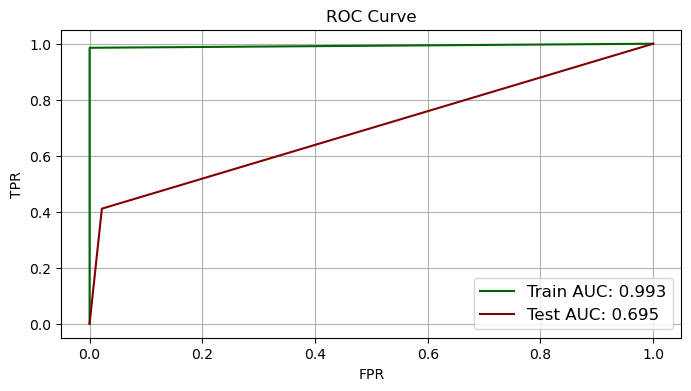

*********************************************************************************************************************

Train AUC :  0.9927599824484423
Test AUC :  0.6945592007758394
F1 Score :  0.9251843087284973

**********************************************************************************************************************
Accuracy : 0.925
Sensitivity / True Positive Rate / Recall : 0.411
Specificity / True Negative Rate :  0.978
Precision / Positive Predictive Value : 0.66
F1-score : 0.507


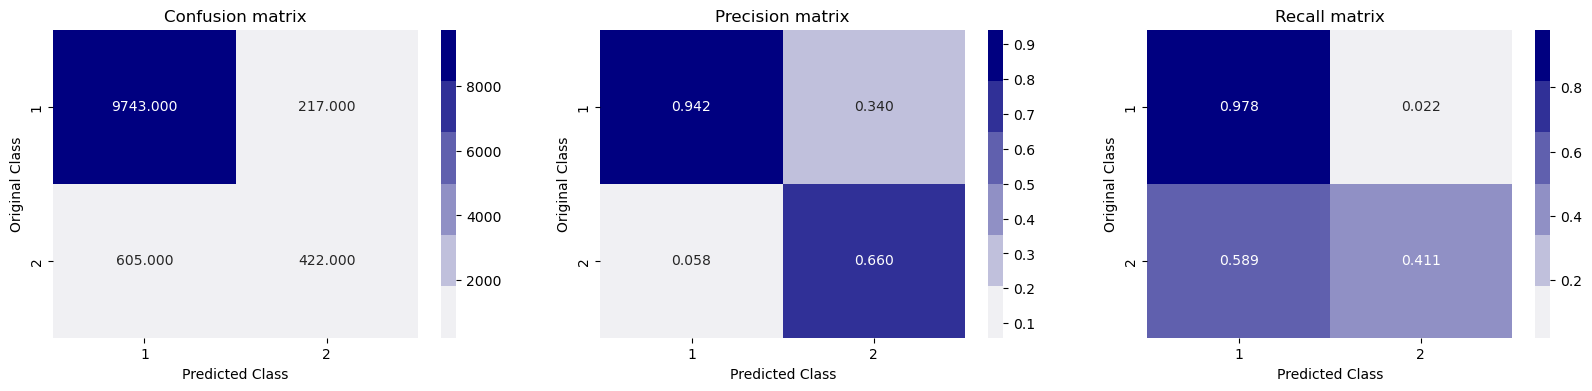

In [140]:
import xgboost as xgb

GBDT=xgb.XGBClassifier(class_weight='balanced')
GBDTG=GBDT.fit(X_train_pca,y_train)

y_train_pred_xgb=GBDTG.predict(X_train_pca)
y_test_pred_xgb=GBDTG.predict(X_test_pca)

analyze(y_train,y_train_pred_xgb,y_test,y_test_pred_xgb)

### XGBoost + PCA - Hypertuning

In [141]:
import xgboost as xgb

parameters={'n_estimators':range(100,600,200), 'max_depth':range(4,9,1),'min_samples_leaf': range(10,90,20),'learning_rate':[0.01,0.05]}


GBDT=xgb.XGBClassifier(class_weight='balanced')

GBDTG=GridSearchCV(GBDT,parameters,cv=3,scoring='roc_auc',return_train_score=True,n_jobs=-1,verbose=6)
GBDTG.fit(X_train_pca,y_train)

GBDT_results=pd.DataFrame.from_dict(GBDTG.cv_results_)
GBDT_best_max_depth=GBDTG.best_params_['max_depth']
GBDT_best_n_estimators=GBDTG.best_params_['n_estimators']
GBDT_best_score=GBDTG.best_score_

Fitting 3 folds for each of 120 candidates, totalling 360 fits


In [142]:
print('Best Max Depth : ',GBDT_best_max_depth)
print('Best n_estimators : ',GBDT_best_n_estimators)
print('Best Min Samples : ',GBDTG.best_params_['min_samples_leaf'])
print('Best Learning Rate : ',GBDTG.best_params_['learning_rate'])
print('Best Score : ',GBDT_best_score)

Best Max Depth :  8
Best n_estimators :  500
Best Min Samples :  10
Best Learning Rate :  0.05
Best Score :  0.9092651685869083


### XGBoost + PCA on hyperparameters

**********************************************************************************************************************


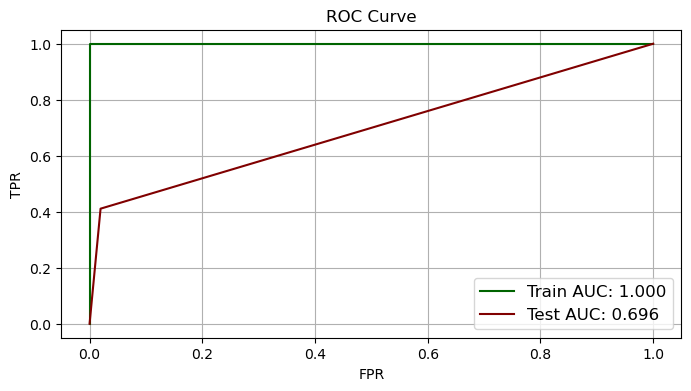

*********************************************************************************************************************

Train AUC :  1.0
Test AUC :  0.6957138192497351
F1 Score :  0.9272776918176027

**********************************************************************************************************************
Accuracy : 0.927
Sensitivity / True Positive Rate / Recall : 0.411
Specificity / True Negative Rate :  0.981
Precision / Positive Predictive Value : 0.685
F1-score : 0.514


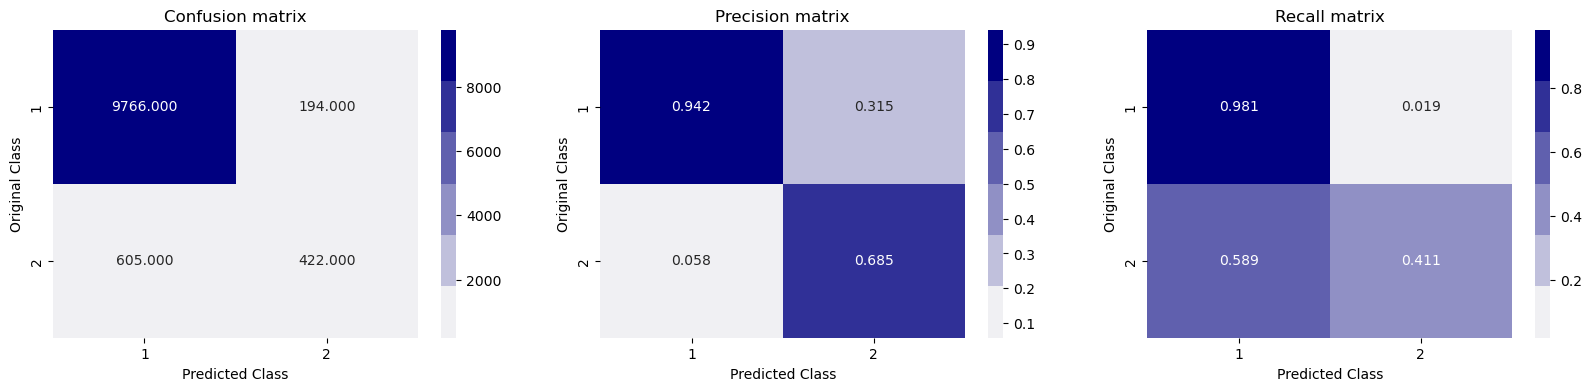

In [143]:
GBDT_DT=xgb.XGBClassifier(max_depth=GBDT_best_max_depth,n_estimators=GBDT_best_n_estimators,
                          min_samples_leaf=GBDTG.best_params_['min_samples_leaf'],
                          learning_rate=GBDTG.best_params_['learning_rate'],
                          class_weight='balanced')

GBDT_DT.fit(X_train_pca,y_train)

y_train_pred_xgbt = GBDT_DT.predict(X_train_pca)
y_test_pred_xgbt = GBDT_DT.predict(X_test_pca)

analyze(y_train,y_train_pred_xgbt,y_test,y_test_pred_xgbt)

#### Observations
- Accuracy is 92.8%, which is improvement over Random Forest model.
- Recall = 0.403, which has reduced since precision has improved.
- Precision = 0.697, which has improved at the cost of recall. With increase in precision, recall will decrease. We need to balance both of them.
- F1 Score = 0.511, which also has marginally decreased.
- XGBoost with PCA produces comparable results with Random Forest with PCA. We need to analyse the models to select the best model.
- the hyperparameters are :
    - max_depth = 8
    - n_estimators = 500
    - min_samples_leaf = 10
    - learning_rate = 0.05

### Comparing Models and Selecting Best Model

In [144]:
from prettytable import PrettyTable

table=PrettyTable()

table.title = '---------------------------------------- <b>Metrices on TEST DATA</b> ---------------------------------------'
table.field_names=["Model","Hyperparameters","Accuracy", "Recall", "Precision", "F1 Score"]
table.add_row(["Logistic Regression","0.01", "82.6 %","0.85", "0.332", "0.477"])
table.add_row(["Logistic Regression + PCA","0.01", "82.2 %","0.845", "0.325", "0.479"])
table.add_row(["Random Forest + PCA","max_depth : 15\n n_estimators : 700", "91.9 %","0.502", "0.574", "0.536"])
table.add_row(["XGBoost + PCA","max_depth : 8\n n_estimators : 500\n min_samples_leaf : 10\n learning_rate : 0.05", "92.8 %","0.403", "0.697", "0.511"])

table

+---------------------------------------------------------------------------------------------------------------+
| ---------------------------------------- <b>Metrices on TEST DATA</b> --------------------------------------- |
+--------------------------------+----------------------------+-----------+---------+------------+--------------+
|             Model              |      Hyperparameters       |  Accuracy |  Recall | Precision  |   F1 Score   |
+--------------------------------+----------------------------+-----------+---------+------------+--------------+
|      Logistic Regression       |            0.01            |   82.6 %  |   0.85  |   0.332    |    0.477     |
|   Logistic Regression + PCA    |            0.01            |   82.2 %  |  0.845  |   0.325    |    0.479     |
|      Random Forest + PCA       |       max_depth : 15       |   91.9 %  |  0.502  |   0.574    |    0.536     |
|                                |     n_estimators : 700     |           |         |            |              |
|         XGBoost + PCA          |       max_depth : 8        |   92.8 %  |  0.403  |   0.697    |    0.511     |
|                                |     n_estimators : 500     |           |         |            |              |
|                                |    min_samples_leaf : 10   |           |         |            |              |
|                                |    learning_rate : 0.05    |           |         |            |              |
+--------------------------------+----------------------------+-----------+---------+------------+--------------+

### Best Model
Based on all the 4 models, the accuracy of XGBoost+PCA and Random Forest + PCA is more than 90%. The accuracy is marginally better for XGBoost than Random Forest but other metrics like F1Score and Recall and Precision is better and more balanced in Random Forest than XGBoost. So we can choose Random Forest + PCA as best model for churn prediction.

## 6. Churn Prediction

### Predicting CHURN For TEST DF using BEST Model (Random Forest + PCA)

In [145]:
# Importing TEST DF for submission file
testDF = pd.read_csv('test.csv') 


In [146]:
# Churn Prediction using best model
y_churnDFTest_pred = Best_DT.predict(X_churnDFTest_pca)

In [147]:
y_churnDFTest_pred

array([0, 0, 0, ..., 1, 1, 0], dtype=int64)

In [148]:
# Converting to dataFrame
y_churnDFTest_pred_df = pd.DataFrame(y_churnDFTest_pred, columns=['churn_probability'])


In [149]:
y_churnDFTest_pred_df.head()

churn_probability
0                  0
1                  0
2                  0
3                  0
4                  0

In [150]:
# Checking the total number of churns predicted
y_churnDFTest_pred_df['churn_probability'].value_counts()

0    27075
1     2925
Name: churn_probability, dtype: int64

In [151]:
# join test dataset with prediction
y_churnDFTest_pred_final = pd.concat([testDF,y_churnDFTest_pred_df], axis = 1 )
y_churnDFTest_pred_final.head()

id  circle_id  loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou  \
0  69999        109             0.0             0.0             0.0   
1  70000        109             0.0             0.0             0.0   
2  70001        109             0.0             0.0             0.0   
3  70002        109             0.0             0.0             0.0   
4  70003        109             0.0             0.0             0.0   

  last_date_of_month_6 last_date_of_month_7 last_date_of_month_8   arpu_6  \
0            6/30/2014            7/31/2014            8/31/2014   91.882   
1            6/30/2014            7/31/2014            8/31/2014  414.168   
2            6/30/2014            7/31/2014            8/31/2014  329.844   
3            6/30/2014            7/31/2014            8/31/2014   43.550   
4            6/30/2014            7/31/2014            8/31/2014  306.854   

    arpu_7   arpu_8  onnet_mou_6  onnet_mou_7  onnet_mou_8  offnet_mou_6  \
0   65.330   64.445        31.78        20.23        23.11         60.16   
1  515.568  360.868        75.51        41.21        19.84        474.34   
2  434.884  746.239         7.54         7.86         8.40         16.98   
3  171.390   24.400         5.31         2.16         0.00         40.04   
4  406.289  413.329       450.93       609.03       700.68         60.94   

   offnet_mou_7  offnet_mou_8  roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  \
0         32.16         34.83           0.00           0.00           0.00   
1        621.84        394.94           0.00           0.00           0.00   
2         45.81         45.04          22.81         103.38          26.08   
3        205.01         24.01           0.00           0.00           0.00   
4         23.84         74.16           0.00           0.00           0.00   

   roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  loc_og_t2t_mou_6  \
0           0.00           0.00           0.00             24.88   
1           0.00           0.00           0.00             75.51   
2          24.53          53.68          54.44              0.00   
3           0.00           0.00           0.00              5.31   
4           0.00           0.00           0.00              0.45   

   loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2m_mou_6  loc_og_t2m_mou_7  \
0             20.23             21.06             18.13             10.89   
1             41.21             19.84            473.61            598.08   
2              0.00              0.00              0.00              0.00   
3              0.00              0.00              2.94             98.61   
4              0.78             14.56              2.39              2.66   

   loc_og_t2m_mou_8  loc_og_t2f_mou_6  loc_og_t2f_mou_7  loc_og_t2f_mou_8  \
0              8.36              0.00             13.58              0.00   
1            377.26              0.73              0.00              0.00   
2              0.00              0.00              0.00              0.00   
3             20.51              0.00              0.00              2.35   
4             10.94              0.00              0.00              0.00   

   loc_og_t2c_mou_6  loc_og_t2c_mou_7  loc_og_t2c_mou_8  loc_og_mou_6  \
0               0.0              0.00              0.03         43.01   
1               0.0              0.00              0.00        549.86   
2               0.0              0.00              0.00          0.00   
3               0.0              6.18              0.00          8.26   
4               0.0              0.00              0.00          2.84   

   loc_og_mou_7  loc_og_mou_8  std_og_t2t_mou_6  std_og_t2t_mou_7  \
0         44.71         29.43              6.90              0.00   
1        639.29        397.11              0.00              0.00   
2          0.00          0.00              0.00              0.00   
3         98.61         22.86              0.00              2.16   
4          3.44         25.51            450.48            608.24   

 

### Writing result CSV file - submission.csv

In [152]:
# Writing the predictions to CSV file
y_churnDFTest_pred_final[['id', 'churn_probability']].to_csv('submission.csv', index=False,quoting=3,sep=',')


## 7. Recommendations

- The most important features are in the decreasing order of importance:
    - onnet_mou_8
    - arpu_6
    - arpu_8
    - arpu_7
    - onnet_mou_6
    - roam_ic_mou_7
    - offnet_mou_7
    - loc_og_t2f_mou_7
    - roam_ic_mou_8
    - roam_og_mou_8
    
- From the above, the following are the strongest indicators of churn
    - Customers having tendency of churning spend less time on calls on same or other network. This indicates that the network connectivity is getting impacted and the customer is not able to spend much time on calls in same or other network. This may be due to bad network issues in the area.
    - The average revenue decreases for the customers who have tendency to churn. This indicates that the customer is having bad experiences with the network service Provider and the customer is hesitant in using their service, might be planning to move ut to better service provider.
    - The customer having tendency of churning also spends less time on outgoing or incoming calls while on roaming. This indicates that the customer might have moved to some region where the network is not good. And customer is regularly facing roaming issues.

#### Recommendations
- The telecom company should be focussing more on better plans, features and products which is customer specific such that the customer average revenue increases.
- The customer is also churning due to bad network issues. The company should try to improve the network so that the overall customer experience is good. This aslo includes roaming services as well.
- The company should also improve their connectivity with other networks to improve the offnet usage, which eventually will bring better user experience.
- The company should also plan to improve local network and try to bring in more people under same network such thet local calls under same network is increased. They can bring in referral plans to invite more customers into their network.